In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pymaid
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import seaborn as sns
import itertools
from collections import OrderedDict
from matplotlib import colors as mcolors


"""

CATMAID credentials in the form of pymaid.CatmaidInstance(server, authname, authpassword, authtoken)

"""


pymaid.set_loggers('WARNING')
pymaid.set_pbars(jupyter=False)

# Getting the triples

First, we need to retrieve all triples per target type. Since they were obtained by notebook-1, here we just read the already saved files

In [9]:
triples_ipc = pd.read_csv(r'/home/ben/Downloads/triples_ipc.csv')
triples_dms = pd.read_csv(r'/home/ben/Downloads/triples_dms.csv')
triples_dh = pd.read_csv(r'/home/ben/Downloads/triples_dh44.csv')
triples_se0p = pd.read_csv(r'/home/ben/Downloads/triples_se0ph.csv')
triples_se0ens = pd.read_csv(r'/home/ben/Downloads/triples_se0ens_new3.csv')

Next, we need to be able to work with a csv file of triples. The function **extract_csv()** takes a name of a file (.csv) and returns a nested list with two elements:
- list1: a list of targets
- list2: a list with inner lists corresponding to each target with both the sensory input neurons and the interneurons, in the order of appearance, such that for target neuron list1[i], list2[i] is a list of the incoming neurons participating in a parallel pathway to this target neuron. There are no repeated elements.

In [10]:
def extract_csv(fname):
    with open(fname) as csv_file:
        csv_f = csv.reader(csv_file, delimiter=',')
        line_count = 0
        tars = []
        for row in csv_f:
            if line_count == 0:
    #             print(f'Column names are {", ".join(row)}')
                line_count += 1
            else:  
                current = f'{row[2]}'
                if current not in tars:
                    tars.append(current)
    #             print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
                line_count += 1 

    sources = []
    for t in tars:
        with open(fname) as csv_file:
            csv_f = csv.reader(csv_file, delimiter=',')   
            line_=0
            ins = []
            for row in csv_f:
                if line_ ==0:
                    line_ += 1
                elif (f'{row[2]}')==t:
                    first = (f'{row[0]}')
                    second = (f'{row[1]}')
                    if first not in ins:
                        ins.append(first)
                    if second not in ins:
                        ins.append(second)
                    line_+=1
        sources.append(ins)

    both = [tars,sources]
    return both

ipcs = extract_csv('triples_ipc.csv')


In [11]:
dmss = extract_csv('triples_dms.csv')

In [12]:
dhs = extract_csv('triples_dh44.csv')

In [13]:
se0ps = extract_csv('triples_se0ph.csv')

In [14]:
se0enss = extract_csv('triples_se0ens_new3.csv')

In [15]:
se0enss

[['SE0 R3', 'SE0 L1', 'SE0 L2', 'SE0 L3', 'SE0 R1', 'SE0 R2'],
 [['AN-R-Sens-B1-AVa-22',
   'SEZ-IN-08-right',
   'SEZ-X-right',
   'AN-R-Sens-B1-AVa-27',
   'AN-R-Sens-B1-AVa-26',
   'AN-R-Sens-B1-AVa-16',
   'AN-R-Sens-B1-AVa-28',
   'AN-R-Sens-B1-AVa-15',
   'SEZ-IN-05-right',
   'AN-R-Sens-B1-AVa-25',
   'AN-R-Sens-B1-AVa-18',
   'AN-R-Sens-B1-AVa-29',
   'AN-R-Sens-B1-AVa-24'],
  ['AN-L-Sens-B1-AVa-36',
   'AX ; SEZ-IN-A03-left',
   'MN-L-Sens-B2-AVp-01',
   'SEZ-IN-A05-right - paired with #6885133',
   'SEZ-IN-03-left',
   'SEZ-IN-06-right',
   'SEZ-IN-A04-right',
   'AN-L-Sens-B1-ACa-09',
   'AX ; SEZ-IN-A03-right',
   'SOG into brain contralaterally right - paired with #3622234',
   'AN-L-Sens-B1-AVa-34',
   'BAmas12 midline 3 left',
   'AN-L-Sens-B1-AVa-17',
   'SEZ-X-left',
   'SEZ-IN-10-left',
   'Holder_left',
   'AN-L-Sens-B1-AVa-16',
   'AN-L-Sens-B1-ACa-04',
   'Pre PMN right',
   'AN-L-Sens-B1-ACa-11',
   'AN-L-Sens-B1-AVa-18',
   'AN-L-Sens-B1-AVa-33',
   'AN-L-Sens-B1

Similar to the previous function, **extract_csv_new()** takes a name of a .csv file, and the output is a nested list of two elements:
- list1: list of targets
- list2: nested list such that for list1[i], the list2[i] is another nested list containing pairs of [sens,inter] which are part of the same parallel pathway for the particular target neuron

In [16]:
def extract_csv_new(fname):
    with open(fname) as csv_file:
        csv_f = csv.reader(csv_file, delimiter=',')
        line_count = 0
        tars = []
        for row in csv_f:
            if line_count == 0:
    #             print(f'Column names are {", ".join(row)}')
                line_count += 1
            else:
                current = f'{row[2]}'
                if current not in tars:
                    tars.append(current)
    #             print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
                line_count += 1 
    

    sources = []
    for t in tars:
        with open(fname) as csv_file:
            csv_f = csv.reader(csv_file, delimiter=',')   
            line_=0
            all_ins = []
            for row in csv_f:
                ins=[]
                if line_ ==0:
                    line_ += 1
                elif (f'{row[2]}')==t:
                    first = (f'{row[0]}')
                    second = (f'{row[1]}')
                    ins=[first,second]
                    all_ins.append(ins)
                    line_+=1
                    
        sources.append(all_ins)

    both = [tars,sources]
    return both

# ipc_trips = extract_csv_new('triples_ipc.csv')


In [17]:
ipc_trips = extract_csv_new('triples_ipc.csv')

In [18]:
dms_trips = extract_csv_new('triples_dms.csv')

# Distance calculations

The function **cons_dist()** takes a list of source neurons, a target neuron and a name of a volume in CATMAID. The starting point of the volume is calculated, and the distance from this point to all the connectors of all the source neurons is calculated. The output is a list of the averages of the normalized distances for three (for dms and dh44) defined types: ACa12, ACa and interneuron- for ipc it also includes AVa in the third position. This function is used later with the outputs from extract_csv().

In [21]:
sou = ["hugin-PC left 4","AN-L-Sens-B1-ACa-02","AN-L-Sens-B1-AVa-19"]
tar = 'IPC 2 left'
volm = 'PS_ring_gland'

def cons_dist(sources,target,vol):
    n = pymaid.get_neuron(target)
#     n.reroot(n.soma, inplace=True)
    
    n_len = 1000*pymaid.calc_cable(n)

    m = pymaid.geodesic_matrix(n)
    rg = pymaid.get_volume(vol)
#     rg.color = (.9, .9, .9)
    rg_n = pymaid.in_volume(n,rg)
    rg_n = rg_n.copy()
    rg_n = pymaid.calc_cable(rg_n, return_skdata = True)
    rg_nodes = rg_n.nodes.treenode_id.tolist()
    first = rg_nodes[0]
    data = []
    
    sen_dist12 = []
    sen_dist = []
    int_dist = []
    sen_ava = []
    for s in sources:
        cn = pymaid.get_connectors_between(s,n,directional=True)
        cn_treenodes = cn.treenode2_id.values
        print(cn_treenodes)
        dist = m.loc[cn_treenodes, first].values
        # Normalizing the distance by dividing it with the length of the neuron
        reldist = [d/n_len for d in dist] 
        suma = sum(reldist)/len(reldist)
        if 'Sens' in s:
            if 'ACa-02' in s or 'ACa-01' in s:

                sen_dist12.append(suma)
            elif 'AVa' in s:
                sen_ava.append(suma)
            else:
                sen_dist.append(suma)
        else:
            int_dist.append(suma)

        # Keep track of data
#         data += [[s, n, d] for n, d in zip(cn_treenodes, reldist)]
    
    sen12 =0
    sen_ = 0
    av = 0
    print(sen_dist12)
    if len(sen_dist12)!=0:
        sen12 = sum(sen_dist12)/len(sen_dist12)
    if len(sen_dist)!=0:
        sen_ = sum(sen_dist)/len(sen_dist)
    if len(sen_ava)!=0:
        av = sum(sen_ava)/len(sen_ava)
    if len(int_dist)!=0:
        inter_ = sum(int_dist)/len(int_dist)
    print(int_dist)
    if 'IPC' in tar:
        return [round(sen12,6),round(sen_,6),round(av,7),round(inter_,6)]
    else:
        return [round(sen12,6),round(sen_,6),round(inter_,6)]

# cons_dist(sou,tar,volm)

In [22]:
cons_dist(sou,tar,volm)

[10460076 10460052 13721650]
[ 4519047 13744462 13743840]
[13744571 13744600]
[0.3576666275262228]
[0.3699764176541662]


[0.357667, 0, 0.4671457, 0.369976]

Similar to the previous function, **cons_dist_rel()** takes a list of sources, a target and a volume, however the sources should be in a nested list of [sens,inter] pairs. Instead of taking the average of the normalized distances to the volume starting point, this function, takes the difference dist_inter-dist_sens for each of the input pairs, and only then takes the average of the pairs per sensory type (ACa12, ACa). The output is a list of two (3 for ipc) elements: the average for type ACa12 and type ACa, and for ipc additionally for AVa.

In [23]:
sou = [ ['AN-L-Sens-B1-ACa-02', 'AN: DPMlp Lar_right'],
   ['AN-L-Sens-B1-ACa-02', 'hugin-PC left 1']]

tar = 'IPC 7 left'
volm = 'PS_ring_gland'

def cons_dist_rel(sources,target,vol):
    # Grab the target and make sure it's rooted to soma
    n = pymaid.get_neuron(target)
    n.reroot(n.soma, inplace=True)
    
    n_len = 1000*pymaid.calc_cable(n)
    m = pymaid.geodesic_matrix(n)

    rg = pymaid.get_volume(vol)
#     rg.color = (.9, .9, .9)
    rg_n = pymaid.in_volume(n,rg)
    rg_n = rg_n.copy()
    rg_n = pymaid.calc_cable(rg_n, return_skdata = True)
    rg_nodes = rg_n.nodes.treenode_id.tolist()
    first = rg_nodes[0]
#     print(first)
    data = []
    difs = []
    
    for s in sources:
        cn_s = pymaid.get_connectors_between(s[0],n,directional=True)
        cn_i = pymaid.get_connectors_between(s[1],n,directional=True)
        cn_s_nodes = cn_s.treenode2_id.values
        cn_i_nodes = cn_i.treenode2_id.values
        dist1 = m.loc[cn_s_nodes, first].values
        dist2 = m.loc[cn_i_nodes,first].values
        reldist1 = [d/n_len for d in dist1]
        reldist2 = [d/n_len for d in dist2]

        sen_d = sum(reldist1)/len(reldist1)
        inter_d = sum(reldist2)/len(reldist2)
        difs1= []
        difs2 = []
        
        dif_12  = None
        dif = None
        dif_ava = None
        
        if 'ACa-02' in s[0] or 'ACa-01' in s[0]:
            dif_12 = inter_d - sen_d
        elif 'AVa' in s[0]:
            dif_ava = inter_d - sen_d
        else:
            dif = inter_d-sen_d
        if dif_ava is None:
            difs.append([dif_12,dif])
        else:
            difs.append([dif_12,dif,dif_ava])

            
    #     other = [pymaid.dist_between(n,c,most_prox_node) for c in cn_treenodes]
    #     print(other)
        # Keep track of data
        data += [[s[0], n, d] for n, d in zip(cn_s_nodes, reldist1)]
        data += [[s[1], n, d] for n, d in zip(cn_i_nodes, reldist2)]

          
    data = pd.DataFrame(data, columns=['source', 'treenode_id', 'distance'])
    print(data)
    fin1 = [difs[i][0] for i in range(0,len(difs))]
    fin2 = [difs[i][1] for i in range(0,len(difs))]
    sub = [difs[i] for i in range(0,len(difs)) if len(difs[i])==3]
    samo3 = []
    if len(sub)!=0:
        fin3 =[sub[i][2] for i in range(0,len(sub))]
        samo3= [f for f in fin3 if f!=None]
    samo1= [f for f in fin1 if f!=None]
    samo2 = [f for f in fin2 if f!=None]
    
    avg1= None
    avg2 = None
    avg3 = None
    if len(samo1)!=0:
        avg1 = sum(samo1)/len(samo1)
    if len(samo2)!=0: 
        avg2 = sum(samo2)/len(samo2)
    if len(samo3)!=0: 
        avg3 = sum(samo3)/len(samo3)
# avg_dif1 = sum(difs_12)/len(difs)
#     print(data)
    if 'IPC' in tar:
        return [avg1,avg2,avg3]
    else:
        return [avg1,avg2]




The next function takes a list of sources in the form of the extract_new_csv output and a single target neuron, and returns a dataframe containing the distance of the sensory and the interneurons to the RG/CNS exit

In [24]:

def triple_dist_rel(sources,target,vol=None,boo = False):
    n = pymaid.get_neuron(target)
#     n.reroot(n.soma, inplace=True)

    n_len = 1000*pymaid.calc_cable(n)
    m = pymaid.geodesic_matrix(n)
    data = []
    if boo==False:
        rg = pymaid.get_volume(vol)
    #     rg.color = (.9, .9, .9)
        rg_n = pymaid.in_volume(n,rg)
        rg_n = rg_n.copy()
        rg_n = pymaid.calc_cable(rg_n, return_skdata = True)
        rg_nodes = rg_n.nodes.treenode_id.tolist()
        first = rg_nodes[0]
    
    for s in sources:
        if boo ==True:
            xname = list(pymaid.get_names(n).values())[0]
            if 'L' in xname:
                snode = n.nodes['treenode_id'].loc[n.nodes['z']==22000].values.tolist()
            elif 'R' in xname:
                snode = n.nodes['treenode_id'].loc[n.nodes['z']==12400].values.tolist()
    
            first = snode[0]
        cn_s = pymaid.get_connectors_between(s[0],n,directional=True)
        cn_i = pymaid.get_connectors_between(s[1],n,directional=True)
        cn_s_nodes = cn_s.treenode2_id.values
#         print(cn_s)
#         print(len(cn_s_nodes))
        cn_i_nodes = cn_i.treenode2_id.values
        dist1 = m.loc[cn_s_nodes, first].values
        dist2 = m.loc[cn_i_nodes,first].values
        reldist1 = [d/n_len for d in dist1]
        reldist2 = [d/n_len for d in dist2]

        sen_d = sum(reldist1)/len(reldist1)
        inter_d = sum(reldist2)/len(reldist2)

        n1 = str(len(cn_s_nodes))
        n2 = str(len(cn_i_nodes))
        d1 = sen_d
        d2 = inter_d
        data += [[s[0]+' ('+n1+')', s[1] +' ('+n2+')',target, d1,d2,d1-d2]]

        
    data = pd.DataFrame(data, columns=['source', 'interneuron','target','dist_source', 'dist_inter', 'diff (sens-inter)'])


    return data

#

In [25]:
def new_triple_dist_rel(sources,target,vol=None,boo = False):
    n = pymaid.get_neuron(target)
#     n.reroot(n.soma, inplace=True)

    n_len = 1000*pymaid.calc_cable(n)
    m = pymaid.geodesic_matrix(n)
    data = []
    if boo==False:
        rg = pymaid.get_volume(vol)
    #     rg.color = (.9, .9, .9)
        rg_n = pymaid.in_volume(n,rg)
        rg_n = rg_n.copy()
        rg_n = pymaid.calc_cable(rg_n, return_skdata = True)
        rg_nodes = rg_n.nodes.treenode_id.tolist()
        first = rg_nodes[0]
    
    for s in sources:
        if boo ==True:
            xname = list(pymaid.get_names(n).values())[0]
            if 'L' in xname:
                snode = n.nodes['treenode_id'].loc[n.nodes['z']==22000].values.tolist()
            elif 'R' in xname:
                snode = n.nodes['treenode_id'].loc[n.nodes['z']==12400].values.tolist()
    
            first = snode[0]
        cn_s = pymaid.get_connectors_between(s[0],n,directional=True)
        cn_i = pymaid.get_connectors_between(s[1],n,directional=True)
        cn_s_nodes = cn_s.treenode2_id.values
#         print(cn_s)
#         print(len(cn_s_nodes))
        cn_i_nodes = cn_i.treenode2_id.values
        dist1 = m.loc[cn_s_nodes, first].values
        dist2 = m.loc[cn_i_nodes,first].values
        reldist1 = [d/n_len for d in dist1]
        reldist2 = [d/n_len for d in dist2]
        print(reldist1)
        sen_d = sum(reldist1)/len(reldist1)
        inter_d = sum(reldist2)/len(reldist2)

        n1 = str(len(cn_s_nodes))
        n2 = str(len(cn_i_nodes))
        d1 = sen_d
        d2 = inter_d
        data += [[s[0]+' ('+n1+')', s[1] +' ('+n2+')',target,reldist1,reldist2,d1,d2]]

        
    data = pd.DataFrame(data, columns=['source','interneuron','target','all_dist_source', 'all_dist_inter','avg_dist_source','avg_dist_inter'])


    return data

#

The same as above BUT now I changed it to include also the diff (sens - inter) and also the number of synapses they make and the n_diff (sens-inter). I decided for the numbers and not the ranking indexes because the rank_idx is just the number of synapses/highest number of incoming synapses for this target, so I would be dividing by the same number anyway for the sensory and interneuron for the per triple method- and it only makes sense to compare connections for this method.

Also the sources now have their real names without the nr. of synapses in brackets

In [26]:
def new (df,t):
    nw_df=df.copy(deep=True)
    for n in df.columns[4:]:
        for m in df.index.values:
            v=df.loc[m].at[n]
            if int(v)<t:
                nw_df.at[m,n] = 0
    return nw_df


In [27]:
def syn_new_triple_dist(sources,target,vol=None,boo = False):
    n = pymaid.get_neuron(target)
#     n.reroot(n.soma, inplace=True)
   
    n_len = 1000*pymaid.calc_cable(n)
    m = pymaid.geodesic_matrix(n)
    data = []
    if boo==False:
        rg = pymaid.get_volume(vol)
    #     rg.color = (.9, .9, .9)
        rg_n = pymaid.in_volume(n,rg)
        rg_n = rg_n.copy()
        rg_n = pymaid.calc_cable(rg_n, return_skdata = True)
        rg_nodes = rg_n.nodes.treenode_id.tolist()
        first = rg_nodes[0]
    
    for s in sources:
        if boo ==True:
            xname = list(pymaid.get_names(n).values())[0]
            if 'L' in xname:
                snode = n.nodes['treenode_id'].loc[n.nodes['z']==22000].values.tolist()
            elif 'R' in xname:
                snode = n.nodes['treenode_id'].loc[n.nodes['z']==12400].values.tolist()
    
            first = snode[0]
        cn_s = pymaid.get_connectors_between(s[0],n,directional=True)
        cn_i = pymaid.get_connectors_between(s[1],n,directional=True)
        cn_s_nodes = cn_s.treenode2_id.values
#         print(cn_s)
#         print(len(cn_s_nodes))
        cn_i_nodes = cn_i.treenode2_id.values
        dist1 = m.loc[cn_s_nodes, first].values
        dist2 = m.loc[cn_i_nodes,first].values
        reldist1 = [d/n_len for d in dist1]
        reldist2 = [d/n_len for d in dist2]
#         print(reldist1)
        sen_d = sum(reldist1)/len(reldist1)
        inter_d = sum(reldist2)/len(reldist2)

        n1 = len(cn_s_nodes)
        n2 = len(cn_i_nodes)
        
        mcons = pymaid.get_partners(n,directions=['incoming'], min_size = 1)
        n_cons = new(mcons,2)
        t = mcons.total[0]
        r1 = round(n1/t,2)
        r2 = round(n2/t,2)
        d1 = sen_d
        d2 = inter_d
        rank_dif = n1-n2
        data += [[s[0], s[1],target,reldist1,reldist2,d1,d2,d1-d2,n1,n2,n1-n2,r1,r2]]

        
    data = pd.DataFrame(data, columns=['source','interneuron','target','all_dist_source', 'all_dist_inter',
                                       'avg_dist_source','avg_dist_inter','diff(s-i)','nr_s','nr_i','nr_diff(s-i)',
                                      'rank_s','rank_i'])


    return data

#

In [28]:

senlist1 =['ACa12', 'ACa','AVa']
senlist2 = ['ACa12', 'ACa', 'AVa', 'AN AVp', 'MN B2', 'MN B3']

In [29]:
def triple_rel(fname,exp,vol=None,boo=False):
    novo = extract_csv_new(fname)
    motors = novo[0]
    inputs = novo[1]
    dflist = []
    for i in range(0,len(motors)):
        dflist.append(triple_dist_rel(inputs[i],motors[i],vol,boo))
#         print(d)
    dataf = pd.concat(dflist,ignore_index=True)
    export_csv = dataf.to_csv (r'/home/ben/all-csvs/'+exp)

    return dataf



In [30]:
# extract_csv_new('triples_dms.csv')

Edited this function so there is an optional argument syn (def = False), which when True makes the dataframes with the synapse number by using the syn_new_triple_dist function

In [31]:
def new_triple_rel(fname,exp,vol=None,boo=False,syn=False):
    novo = extract_csv_new(fname)
    motors = novo[0]
    inputs = novo[1]
    dflist = []
    for i in range(0,len(motors)):
        if syn==False:
            dflist.append(new_triple_dist_rel(inputs[i],motors[i],vol,boo))
        else:
            dflist.append(syn_new_triple_dist(inputs[i],motors[i],vol,boo))
#         print(d)
    dataf = pd.concat(dflist,ignore_index=True)
    
    export_csv = dataf.to_csv (r'/home/ben/all-csvs/'+exp)

    return dataf



The function **seo_cons()** is analogous to cons_dist(), designed especially for Se0 inputs. The output is a list of average distances per 5 types: ACa12, ACa, AVa, AN AVp and MN AVp.

In [32]:
def seo_cons(sources,target):
    
    n = pymaid.get_neuron(target)
#     n.reroot(n.soma, inplace=True)
    
    n_len = 1000*pymaid.calc_cable(n)
    m = pymaid.geodesic_matrix(n)

    data = []
    xname = list(pymaid.get_names(n).values())[0]
    if 'L' in xname:
        snode = n.nodes['treenode_id'].loc[n.nodes['z']==22000].values.tolist()
    elif 'R' in xname:
        snode = n.nodes['treenode_id'].loc[n.nodes['z']==12400].values.tolist()
    
    first = snode[0]
    sen_dist12 = []
    sen_ava = []
    sen_avp = []
    sen_aca = []
    mn2 = []
    mn3=[]
    int_dist = []
    for s in sources:
        cn = pymaid.get_connectors_between(s,n,directional=True)
        cn_treenodes = cn.treenode2_id.values
        dist = m.loc[cn_treenodes, first].values
        reldist = [d/n_len for d in dist]
        suma = sum(reldist)/len(reldist)
        if 'Sens' in s:
            if 'ACa-02' in s or 'ACa-01' in s:
                sen_dist12.append(suma)
            elif 'AVa' in s:
                sen_ava.append(suma)
            elif 'AVp' in s:
                if 'MN' in s:
                    if 'B3' in s:
                        mn3.append(suma)
                    elif 'B2' in s:
                        mn2.append(suma)
                else:
                    sen_avp.append(suma)
            else:
                sen_aca.append(suma)
        else:
            int_dist.append(suma)
#         print(suma)
    #     other = [pymaid.dist_between(n,c,most_prox_node) for c in cn_treenodes]
    #     print(other)
        # Keep track of data
        data += [[s, n, d] for n, d in zip(cn_treenodes, reldist)]
    
    sen12 =0
    s_ava = 0
    s_avp = 0
    s_aca = 0
    s_mn2 = 0
    s_mn3 = 0
    data = pd.DataFrame(data, columns=['source', 'treenode_id', 'distance'])
    if len(sen_dist12)!=0:
        sen12 = sum(sen_dist12)/len(sen_dist12)
    if len(sen_ava)!=0:
        s_ava = sum(sen_ava)/len(sen_ava)
    if len(sen_avp)!=0:
        s_avp = sum(sen_avp)/len(sen_avp)
    if len(sen_aca)!=0:
        s_aca = sum(sen_aca)/len(sen_aca)
    if len(mn2)!=0:
        s_mn2 = sum(mn2)/len(mn2)
    if len(mn3)!=0:
        s_mn3 = sum(mn3)/len(mn3)
    inter_ = sum(int_dist)/len(int_dist)
#     fig = pymaid.plot3d([n,n.nodes[n.nodes.treenode_id ==first]],
#                     connectors=False,
#                     scatter_kws=dict(size=5))
    
    return [sen12, s_aca, s_ava, s_avp, s_mn2,s_mn3,inter_]
#     return fig

Analogous to **const_dist_rel()**, only with output for 5 types: ACa12, ACa, AVa, AN AVp and MN AVp.

In [35]:
def seo_cons_rel(sources,target):
    
    n = pymaid.get_neuron(target)
#     n.reroot(n.soma, inplace=True)
    
    n_len = 1000*pymaid.calc_cable(n)
    m = pymaid.geodesic_matrix(n)

    data = []
    xname = list(pymaid.get_names(n).values())[0]
    if 'L' in xname:
        snode = n.nodes['treenode_id'].loc[n.nodes['z']==22000].values.tolist()
    elif 'R' in xname:
        snode = n.nodes['treenode_id'].loc[n.nodes['z']==12400].values.tolist()
    
    first = snode[0]
    sen_dist12 = []
    sen_ava = []
    sen_avp = []
    sen_aca = []
    mn = []
    int_dist = []
    difs = []
        
    for s in sources:
        cn_s = pymaid.get_connectors_between(s[0],n,directional=True)
        cn_i = pymaid.get_connectors_between(s[1],n,directional=True)
        cn_s_nodes = cn_s.treenode2_id.values
        cn_i_nodes = cn_i.treenode2_id.values
        dist1 = m.loc[cn_s_nodes, first].values
        dist2 = m.loc[cn_i_nodes,first].values
        reldist1 = [d/n_len for d in dist1]
        reldist2 = [d/n_len for d in dist2]

        sen_d = sum(reldist1)/len(reldist1)
        inter_d = sum(reldist2)/len(reldist2)
        difs1= []
        difs2 = []
        dif_12  = None
        dif_aca = None
        dif_ava = None
        dif_avp = None
        dif_mn2 = None
        dif_mn3 = None
        if 'ACa-02' in s[0] or 'ACa-01' in s[0]:
            dif_12 = inter_d - sen_d
        
        elif 'AVa' in s[0]:
            dif_ava = inter_d - sen_d
        elif 'AVp' in s[0]:
            if 'MN' in s[0]:
                if 'B3' in s[0]:
                    dif_mn3 = inter_d - sen_d
                elif 'B2' in s[0]:

                    dif_mn2 = inter_d - sen_d
            else:
                dif_avp = inter_d - sen_d
        else:
            dif_aca = inter_d - sen_d

        difs.append([dif_12,dif_aca,dif_ava,dif_avp,dif_mn2,dif_mn3])

        # Keep track of data
        data += [[s[0], n, d] for n, d in zip(cn_s_nodes, reldist1)]
        data += [[s[1], n, d] for n, d in zip(cn_i_nodes, reldist2)]

    
    fin1 = [difs[i][0] for i in range(0,len(difs))]
    fin2 = [difs[i][1] for i in range(0,len(difs))]
    fin3 = [difs[i][2] for i in range(0,len(difs))]
    fin4 = [difs[i][3] for i in range(0,len(difs))]
    fin5 = [difs[i][4] for i in range(0,len(difs))]
    fin6 = [difs[i][5] for i in range(0,len(difs))]
#     print(fin1)
    all_samo = [[f for f in fin1 if f!=None],[f for f in fin2 if f!=None],[f for f in fin3 if f!=None],
                [f for f in fin4 if f!=None],[f for f in fin5 if f!=None],[f for f in fin6 if f!=None]]
 
    total = []
    for s in all_samo:
        avg = None

        if len(s)!=0:
            avg = sum(s)/len(s)
        total.append(avg)

    return total
#     return [avg1,avg2,avg3,avg4,avg5]

Finally, we can make a function to take as input only a name of a .csv file and a volume name, and compute the distances to the volume starting point. The function **final_dist()** takes a file name, extracts the sources and targets, and uses cons_dist to compute the distances. The output is a dataframe with the average distances for each type (rows) regarding each target neuron (columns).

In [36]:
def final_dist(fname,vol):    
    novo = extract_csv(fname)
    mot = novo[0]
    ins = novo[1]
    if 'ipc' in  fname:
         df= pd.DataFrame([[cons_dist(ins[i],mot[i],vol)[0] for i in range(0,len(mot))],
                      [cons_dist(ins[i],mot[i],vol)[1] for i in range(0,len(mot))],
                     [cons_dist(ins[i],mot[i],vol)[2] for i in range(0,len(mot))],
                    [cons_dist(ins[i],mot[i],vol)[3] for i in range(0,len(mot))]],
        index = ["ACa12","ACa","AVa","Interneuron"], columns = mot)
    else:
        df= pd.DataFrame([[cons_dist(ins[i],mot[i],vol)[0] for i in range(0,len(mot))],
                          [cons_dist(ins[i],mot[i],vol)[1] for i in range(0,len(mot))],
                         [cons_dist(ins[i],mot[i],vol)[2] for i in range(0,len(mot))]],
        index = ["ACa12","ACa","Interneuron"], columns = mot)
    # plot_connectors(mot,lista,col)
    return df

volm = 'PS_ring_gland'



Analogous to the previous function, only for the relative distances (the difference inter-sens).

In [37]:
def final_rel(fname,vol):
    novo = extract_csv_new(fname)
    mots = novo[0]
    inputs = novo[1]
    if 'ipc' in fname:
        df= pd.DataFrame([[cons_dist_rel(inputs[i],mots[i],vol)[0] for i in range(0,len(mots))],[cons_dist_rel(inputs[i],mots[i],vol)[1] for i in range(0,len(mots))],[cons_dist_rel(inputs[i],mots[i],vol)[2] for i in range(0,len(mots))]],
        index = ["Diff ACa12","Diff ACa","Diff AVa"], columns = mots)
    else:
        df= pd.DataFrame([[cons_dist_rel(inputs[i],mots[i],vol)[0] for i in range(0,len(mots))],[cons_dist_rel(inputs[i],mots[i],vol)[1] for i in range(0,len(mots))]],
        index = ["Diff ACa12","Diff ACa"], columns = mots)
    # plot_connectors(mot,lista,col)
    return df



In [38]:
# f1 = final_rel('triples_ipc.csv',volm)

In [39]:
# f2 = final_rel('triples_dms.csv',volm)

Same as the function final_dist, only for Se0.

In [40]:
def seo_final(fname):
    novo = extract_csv(fname)
    mots = novo[0]
    inputs = novo[1]

    df= pd.DataFrame([[seo_cons(inputs[i],mots[i])[0] for i in range(0,len(mots))],
                      [seo_cons(inputs[i],mots[i])[1] for i in range(0,len(mots))],
                      [seo_cons(inputs[i],mots[i])[2] for i in range(0,len(mots))],
                      [seo_cons(inputs[i],mots[i])[3] for i in range(0,len(mots))],
                      [seo_cons(inputs[i],mots[i])[4] for i in range(0,len(mots))],
                      [seo_cons(inputs[i],mots[i])[5] for i in range(0,len(mots))],
                     [seo_cons(inputs[i],mots[i])[6] for i in range(0,len(mots))]],
    index = ["ACa12","ACa","AVa","AN AVp","MN-B2 AVp","MN-B3 AVp","Inter"], columns = mots)
    # plot_connectors(mot,lista,col)
    return df

# f = seo_final('triples_se0ph.csv')

Same as final_rel, only for Se0.

In [41]:
def seo_final_rel(fname):
    novo = extract_csv_new(fname)
    mots = novo[0]
    inputs = novo[1]

    df= pd.DataFrame([[seo_cons_rel(inputs[i],mots[i])[0] for i in range(0,len(mots))],
                      [seo_cons_rel(inputs[i],mots[i])[1] for i in range(0,len(mots))],
                      [seo_cons_rel(inputs[i],mots[i])[2] for i in range(0,len(mots))],
                      [seo_cons_rel(inputs[i],mots[i])[3] for i in range(0,len(mots))],
                      [seo_cons_rel(inputs[i],mots[i])[4] for i in range(0,len(mots))],
                     [seo_cons_rel(inputs[i],mots[i])[5] for i in range(0,len(mots))]],
    index = ["Diff-ACa12","Diff-ACa","Diff-AVa","Diff-AN AVp","Diff-MN B2-AVp","Diff-MN B3-AVp"], columns = mots)
    # plot_connectors(mot,lista,col)
    return df

# f4 = seo_final_rel('triples_se0ph.csv')
# f5 = seo_final_rel('triples_se0ens_new2.csv')

In [42]:
# f4


Makes a dataframe containing the normalized distances of the connectors to a volume, or the predefined point for Se0s; A single source neuron can repeat because it may have multiple connectors AND connect to multiple different targets (in this case it will appear in separate 'groups' of connectors).

In [43]:
sou = ["AN-L-Sens-B1-ACa-02","hugin-PC left 1","AN-L-Sens-B1-AVa-19","hugin-PC left 4"]
tar = 'IPC 2 left'
volm = 'PS_ring_gland'
sou1 = ["AN-L-Sens-B1-ACa-02","hugin-PC left 1"]
tar1 = 'IPC 1 left'
sou2 = ["AN-L-Sens-B1-ACa-02","hugin-PC left 1"]
tar2 = 'IPC 7 left'

def stat_cons_dist(sources,target,vol=None):
    n = pymaid.get_neuron(target)
#     n.reroot(n.soma, inplace=True)
    
    n_len = 1000*pymaid.calc_cable(n)
    m = pymaid.geodesic_matrix(n)
    if vol:
        rg = pymaid.get_volume(vol)
        rg_n = pymaid.in_volume(n,rg)
        rg_n = rg_n.copy()
        rg_n = pymaid.calc_cable(rg_n, return_skdata = True)
        rg_nodes = rg_n.nodes.treenode_id.tolist()
        first = rg_nodes[0]
    else:
        xname = list(pymaid.get_names(n).values())[0]
        if 'L' in xname:
            snode = n.nodes['treenode_id'].loc[n.nodes['z']==22000].values.tolist()
        elif 'R' in xname:
            snode = n.nodes['treenode_id'].loc[n.nodes['z']==12400].values.tolist()
    
        first = snode[0]
    data = []
    
    sen_dist12 = []
    sen_dist = []
    int_dist = []
    for s in sources:
        cn = pymaid.get_connectors_between(s,n,directional=True)
        cn_treenodes = cn.treenode2_id.values
        dist = m.loc[cn_treenodes, first].values
        reldist = [round(d/n_len,7) for d in dist]

        # Keep track of data
        data += [[s, n, d] for n, d in zip(cn_treenodes, reldist)]
    

    data = pd.DataFrame(data, columns=['source', 'treenode_id', 'distance'])
    return data


Creating a dataframe to store all the information available in the csv files in a dataframe as described above

In [44]:
def get_df(fname):
    d = extract_csv(fname)
    dmot = d[0]
    dins = d[1]
    if 'se0' in fname:
        ds = [stat_cons_dist(dins[i],dmot[i]) for i in range(0,len(dmot))]
    else:
        ds = [stat_cons_dist(dins[i],dmot[i],volm) for i in range(0,len(dmot))]
    all_d = pd.concat(ds,axis=0, join='outer', join_axes=None, ignore_index=True)
    return all_d

In [45]:
# all_dh = get_df('triples_dh44.csv')
# all_ipc = get_df('triples_ipc.csv')
# all_dms = get_df('triples_dms.csv')

In [46]:
# all_se0 = get_df('triples_se0ens_new3.csv')
# all_se02 = get_df('triples_se0ph.csv')

The next function takes as input the dataframe from the get_df() function, and takes the distance column to cluster the data either in 3 (Sens-12, Sens-other, Interneuron) or 5 (ACa12, ACa, AVa, AN AVp, MN AVp, Interneuron) groups. 

The output is a list of lists containing all the distance values for each neuron belonging to that group.

In [106]:
def stat_list(dataf,nr):
    sources = dataf['source'].values.tolist()
    distances = dataf['distance'].values.tolist()
    df_12 = []
    df_ava = []
    df_other = []
    df_inter = []
    sen_dist12 = []
    sen_ava = []
    mn2 = []
    mn3= []
    sen_avp = []
    sen_aca = []
    

    if nr==3:
        for i in range(0,len(dataf)):

            if 'Sens' in sources[i]:
                if 'ACa-02' in sources[i] or 'ACa-01' in sources[i]:
                    df_12.append(distances[i])

                else:
                    df_other.append(distances[i])
            else:
                df_inter.append(distances[i])
        return [df_12,df_other,df_inter]
    
        
    elif nr==7:
        for i in range(0,len(dataf)):
            if 'Sens' in sources[i]:
                if 'ACa-02' in sources[i] or 'ACa-01' in sources[i]:
                    sen_dist12.append(distances[i])
                elif 'AVa' in sources[i]:
                    sen_ava.append(distances[i])
                elif 'AVp' in sources[i]:
                    if 'MN' in sources[i]:
                        if 'B3' in sources[i]:
                            mn3.append(distances[i])
                        elif 'B2' in sources[i]:
                            mn2.append(distances[i])
                    else:
                        sen_avp.append(distances[i])
                else:
                    sen_aca.append(distances[i])
            else:
                df_inter.append(distances[i])
        return [sen_dist12,sen_aca,sen_ava,sen_avp,mn2,mn3,df_inter]
    else:
        print("Please enter 3 or 7 as the input number")
        return None


The next function takes a dataframe with all the values, and a boolean (default: False), such that the boolean should be set to True to include AVa, AN-AVp, MN-AVp B2 and MN-AVp B3 categories. It returns the input dataframe with an additional column for type.

In [48]:
def df_type(datf,boo = False):
    rlista = []
    newdatf = datf.copy()
    if boo==False:
        for s in datf['source']:
            if 'Sens' in s:
                if 'ACa-02' in s or 'ACa-01' in s:
                    rlista.append('ACa12')
        #             all_dms['type']='ACa12'
                elif 'AVa' in s:
                    rlista.append('AVa')
                else:
                    rlista.append('ACa')
        #             all_dms['type']='ACa'
            else:
                rlista.append('Inter')
    else:
        for s in datf['source']:
            if 'Sens' in s:
                if 'ACa-02' in s or 'ACa-01' in s:
                    rlista.append('ACa12')
                elif 'AVa' in s:
                    rlista.append('AVa')
                elif 'AVp' in s:
                    if 'MN' in s:
                        if 'B3' in s:
                            rlista.append('MN B3')
                        elif 'B2' in s:
                            rlista.append("MN B2")
                    else:
                        rlista.append('AN AVp')
                else:
                    rlista.append('ACa')
            else:
                rlista.append('Inter')
    pandaslist = pd.Series(rlista,index = datf.index)

    newdatf['type']=pandaslist
    return newdatf

# dms1 = df_type(all_dms)

The next dataframes are x_triples + type.

The next cell gets the dataframes from the saved csv files so there is no need to run the ipc_triples again; Note: it has this extra unnamed column for the indexes

In [49]:
csv_dms= pd.read_csv(r'/home/ben/all-csvs/dms_triple_dif.csv')
csv_ipc= pd.read_csv(r'/home/ben/all-csvs/ipc_triple_dif.csv')
csv_dh= pd.read_csv(r'/home/ben/all-csvs/dh44_triple_dif.csv')
csv_se0p= pd.read_csv(r'/home/ben/all-csvs/se0ph_triple_dif.csv')
csv_se0e= pd.read_csv(r'/home/ben/all-csvs/new_se0ens_triple_dif.csv')

In [50]:
newcsv_dms= pd.read_csv(r'/home/ben/all-csvs/new_dms_triple_dif_elena.csv')
newcsv_ipc= pd.read_csv(r'/home/ben/all-csvs/new_ipc_triple_dif_elena.csv')
newcsv_dh= pd.read_csv(r'/home/ben/all-csvs/new_dh44_triple_dif_elena.csv')
newcsv_se0p= pd.read_csv(r'/home/ben/all-csvs/new_se0ph_triple_dif_elena.csv')
newcsv_se0e= pd.read_csv(r'/home/ben/all-csvs/new_se0ens_triple3_dif.csv')

Adding a type column to the csv dataframe; NOTE: dhtrip0 have the averages as a dist_inter whereas the dhtrip1 have the averages as avg_dist bla and they also include all the values

In [51]:
dhtrip0 = df_type(csv_dh)
dmstrip0 = df_type(csv_dms)
ipctrip0= df_type(csv_ipc)
se0ptrip0 = df_type(csv_se0p,True)
se0enstrip0 = df_type(csv_se0e,True)

In [52]:
dhtrip1 = df_type(newcsv_dh)
dmstrip1 = df_type(newcsv_dms)
ipctrip1= df_type(newcsv_ipc)
se0ptrip1 = df_type(newcsv_se0p,True)
se0enstrip1 = df_type(newcsv_se0e,True)

In [53]:
ipctrip1.loc[ipctrip1['target'] == 'IPC 7 left']

Unnamed: 0                   source              interneuron      target  \
6           6  AN-L-Sens-B1-ACa-02 (4)  AN: DPMlp Lar_right (7)  IPC 7 left   
7           7  AN-L-Sens-B1-ACa-02 (4)      hugin-PC left 1 (2)  IPC 7 left   
8           8  AN-L-Sens-B1-ACa-02 (4)      hugin-PC left 3 (2)  IPC 7 left   

                                     all_dist_source  \
6  [0.35485011861760063, 0.3730372060102196, 0.36...   
7  [0.35485011861760063, 0.3730372060102196, 0.36...   
8  [0.35485011861760063, 0.3730372060102196, 0.36...   

                                      all_dist_inter  avg_dist_source  \
6  [0.37641395019909574, 0.4014868252712676, 0.39...         0.365024   
7         [0.40308486087455486, 0.42497669809494076]         0.365024   
8          [0.37477826164644185, 0.3631361229812137]         0.365024   

   avg_dist_inter   type  
6        0.390975  ACa12  
7        0.414031  ACa12  
8        0.368957  ACa12

In [54]:
dhtrip1.avg_dist_inter.values.tolist()==dhtrip0.dist_inter.values.tolist()

True

# Statistical tests - Descriptive

The next functions were used to see if there is a difference between the distance values among various pairs of neurons (left and right targets, among interneurons themselves etc). 

Most of them were not reported in the final version of the thesis, but they were used just as an indication for how to interpret the results from the interneuron/sensory comparison later

Checking if there is a difference between left and right targets in terms of their source distances (you can change it to interneuron also inside really easy); This function is meant to be used with dhtrip1 not 0! Also note: it is taking the averages not all the values

In [56]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
def lr_mann(tripdf,mns = True):
    
    targets = list(set(tripdf['target'].values.tolist()))
    if mns ==True:
        dh_df1 = tripdf.loc[tripdf['target'].str.contains('left')]
        dh_df2 = tripdf.loc[tripdf['target'].str.contains('right')]
    else:
        dh_df1 = tripdf.loc[tripdf['target'].str.contains('L')]
        dh_df2 = tripdf.loc[tripdf['target'].str.contains('R')]

    s1 = dh_df1.avg_dist_source.values.tolist()
    fin1 = list(set(s1))
    avg1 = round(sum(fin1)/len(fin1),5)

    s2 = dh_df2.avg_dist_source.values.tolist()
    fin2 = list(set(s2))
    avg2 = round(sum(fin2)/len(fin2),5)

    tar = [dh_df1.target.values.tolist()[0],dh_df2.target.values.tolist()[0]]
    # compare samples
    stat, p = mannwhitneyu(fin1, fin2)
#     stat, p = ttest_ind(fin1, fin2)
    print('Left mean: '+str(avg1))
    print('Right mean: '+str(avg2))
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

In [57]:
lr_mann(ipctrip1)

Left mean: 0.37155
Right mean: 0.32732
Statistics=38.000, p=0.010
Different distribution (reject H0)


In [118]:
lr_mann(dmstrip1)

Left mean: 0.3648
Right mean: 0.44701
Statistics=8.000, p=0.052
Same distribution (fail to reject H0)


In [119]:
lr_mann(dhtrip1)

Left mean: 0.44954
Right mean: 0.42877
Statistics=13.000, p=0.171
Same distribution (fail to reject H0)


In [120]:
lr_mann(se0ptrip1,False)

Left mean: 0.1355
Right mean: 0.18753
Statistics=18.000, p=0.028
Different distribution (reject H0)


In [121]:
lr_mann(se0enstrip1,False)

Left mean: 0.16417
Right mean: 0.26641
Statistics=13.000, p=0.000
Different distribution (reject H0)


Code to see how is the distribution of interneuron values across different targets (also you can use it for sides if you say 'left'/'L' or 'right'/'R'; I used it just to memorize the results but not for another function yet!
Also this one I made so you can put in the sensory type but you can just remove it and remove the second .loc blabla

In [58]:
from scipy.stats import shapiro

def tar_stats(tripdf,sp_tar,tp):
    ax = None
    dh_df = tripdf.loc[tripdf['target'].str.contains(sp_tar)].loc[tripdf['type']==tp]

    s = dh_df.avg_dist_inter.values.tolist()
#     dh_df.all_dist_source = dh_df.all_dist_source.apply(literal_eval)
    fin = list(set(s))
    tar = dh_df.target.values.tolist()[0]
    n_name = tar[:4].replace(' ','')
    if tar[-1]=='4':
        n_name='SE0ph'
    q = pd.Series(fin).quantile([0.25,0.5,0.75])
    print(q[0.25])
    stat, p = shapiro(fin)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print(n_name+'-'+sp_tar+' '+'Sample looks Gaussian (fail to reject H0)')
    else:
        print(n_name+'-'+sp_tar+' '+'Sample does not look Gaussian (reject H0)')
            

    return len(fin)

In [59]:
# tar_stats(ipctrip1,'IPC 2 left','AVa')

In [60]:
dhtrip1['all_dist_inter'].values.tolist()[0]

'[0.4073352999652375, 0.4623420119062487, 0.3867104079892244, 0.4609726665752567, 0.4739953285549033, 0.47743239501580426, 0.4321271179577399, 0.3785047854996587, 0.43609995630025716]'

Comparison between EACH PAIR of sensory or interneurons to see if you can do the all and not avg in the analysis

In [61]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import bartlett
from ast import literal_eval


def pair_sen(tripdf,targ, sn=True,stype = None):
    tripdf_r = tripdf.copy()
    if sn == True:
        dh_df = tripdf_r.loc[tripdf_r['target'] == targ].loc[tripdf_r['type']==stype]
    else:
        dh_df = tripdf_r.loc[tripdf_r['target'] == targ]

    sources = list(set(dh_df.source.values.tolist()))
    inters = list(set(dh_df.interneuron.values.tolist()))
    dh_df.all_dist_source = dh_df.all_dist_source.apply(literal_eval)
    dh_df.all_dist_inter = dh_df.all_dist_inter.apply(literal_eval)

#     dh_df = tripdf.copy()
    if sn == True:
        pairs = [list(n) for n in itertools.combinations(sources,2)]
    else:
        pairs = [list(n) for n in itertools.combinations(inters,2)]

    all_ = []
    alpha = 0.05
#     print(sources)
    nr_pairs = len(pairs)
    nr_difs = 0
#     print(nr_pairs)
    for pair in pairs:
        if sn == True:
            p1 = dh_df['all_dist_source'].loc[dh_df['source']==pair[0]].values.tolist()
            p2 = dh_df['all_dist_source'].loc[dh_df['source']==pair[1]].values.tolist()
            pair1 = list(itertools.chain.from_iterable(p1))
            pair2 = list(itertools.chain.from_iterable(p2))


        else:
            p1 = dh_df['all_dist_inter'].loc[dh_df['interneuron']==pair[0]].values.tolist()
            p2 = dh_df['all_dist_inter'].loc[dh_df['interneuron']==pair[1]].values.tolist()
            pair1 = list(itertools.chain.from_iterable(p1))
            pair2 = list(itertools.chain.from_iterable(p2))
        
#         print(pair1)
#         print(pair2)
        avg1 = sum(pair1)/len(pair2)
        avg2 = sum(pair1)/len(pair2)

#         stat, p = mannwhitneyu(pair[0],pair[1])
        if len(pair1)>=3 and len(pair2)>=3:

            shap1, t1 = shapiro(pair1)
            shap2, t2 = shapiro(pair2)
            if t1 > alpha and t2 > alpha:
                lev_, lp = bartlett(pair1,pair2)
                if lp > alpha:
                    stat, p = ttest_ind(pair1, pair2)
                else:
                    stat , p = mannwhitneyu(pair1,pair2)
    #                 print('aha')
            else:
                stat, p = mannwhitneyu(pair1, pair2)
        else:
                stat, p = mannwhitneyu(pair1, pair2)
        
        all_.append(p)
        # interpret
        if p > alpha:
              pass
        else:
            print('Different distribution (reject H0)')
            nr_difs+=1
    
    if nr_pairs!=0:
        return str(round(nr_difs/nr_pairs*100,2))+'\%'
    else:
        print(sources)
        return 'None'


In [62]:
totlist = []
for tar in ipcs[0]:
    newl = []
    for s in senlist1:
        print(tar)
        res = pair_sen(ipctrip1,tar,True,s)
        newl.append(res)
    totlist.append(newl)
    
datf = pd.DataFrame(totlist,columns = senlist1,index=ipcs[0])
new_datf = datf.transpose()
new_datf.to_csv(r'/home/ben/all-csvs/new-csvs/pair-sen-ipc.csv')

IPC 2 left
IPC 2 left
[]
IPC 2 left
['AN-L-Sens-B1-AVa-19 (2)']
IPC 7 left
['AN-L-Sens-B1-ACa-02 (4)']
IPC 7 left
[]
IPC 7 left
[]
IPC 3 right
Different distribution (reject H0)
IPC 3 right
[]
IPC 3 right
[]
IPC 4 left
IPC 4 left
[]
IPC 4 left
[]
IPC 1 left
IPC 1 left
[]
IPC 1 left
[]
IPC 3 left
IPC 3 left
[]
IPC 3 left
[]
IPC 4 right
IPC 4 right
[]
IPC 4 right
[]
IPC 5 left
Different distribution (reject H0)
IPC 5 left
[]
IPC 5 left
[]
IPC 1 right
IPC 1 right
[]
IPC 1 right
[]
IPC 6 right
['AN-L-Sens-B1-ACa-01 (6)']
IPC 6 right
[]
IPC 6 right
['AN-R-Sens-B1-AVa-19 (4)']
IPC 2 right
[]
IPC 2 right
[]
IPC 2 right
['AN-R-Sens-B1-AVa-19 (2)']
IPC 6 left
['AN-R-Sens-B1-ACa-02 (3)']
IPC 6 left
['AN-L-Sens-B1-ACa-10 (2)']
IPC 6 left
[]


In [128]:
totlist = []
for tar in dmss[0]:
    newl = []
    for s in senlist1:
        print(tar)
        res = pair_sen(dmstrip1,tar,True,s)
        newl.append(res)
    totlist.append(newl)
    
datf = pd.DataFrame(totlist,columns = senlist1,index=dmss[0])
new_datf = datf.transpose()
new_datf.to_csv(r'/home/ben/all-csvs/new-csvs/pair-sen-dms.csv')        

DMS 1 left
DMS 1 left
DMS 1 left
[]
DMS 1 right
['AN-L-Sens-B1-ACa-02 (8)']
DMS 1 right
[]
DMS 1 right
[]
DMS 2 left
Different distribution (reject H0)
DMS 2 left
['AN-L-Sens-B1-ACa-10 (3)']
DMS 2 left
[]
DMS 2 right
['AN-L-Sens-B1-ACa-02 (2)']
DMS 2 right
Different distribution (reject H0)
DMS 2 right
[]


In [129]:
totlist = []
for tar in dhs[0]:
    newl = []
    for s in senlist1:
        print(tar)
        res = pair_sen(dhtrip1,tar,True,s)
        newl.append(res)
    totlist.append(newl)
    
datf = pd.DataFrame(totlist,columns = senlist1,index=dhs[0])
new_datf = datf.transpose()
new_datf.to_csv(r'/home/ben/all-csvs/new-csvs/pair-sen-dh44.csv')

DH44 1 left
[]
DH44 1 left
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
DH44 1 left
[]
DH44 3 left
[]
DH44 3 left
Different distribution (reject H0)
DH44 3 left
[]
DH44 2 left
[]
DH44 2 left
DH44 2 left
[]
DH44 2 right
[]
DH44 2 right
DH44 2 right
[]
DH44 1 right
[]
DH44 1 right
['AN-R-Sens-B1-ACa-03 (4)']
DH44 1 right
[]
DH44 3 right
[]
DH44 3 right
['AN-R-Sens-B1-ACa-03 (8)']
DH44 3 right
[]


In [130]:
totlist = []
for tar in se0ps[0]:
    newl = []
    for s in senlist2:
        print(tar)
        res = pair_sen(se0ptrip1,tar,True,s)
        newl.append(res)
    totlist.append(newl)
    
datf = pd.DataFrame(totlist,columns = senlist2,index = se0ps[0])
new_datf = datf.transpose()
new_datf.to_csv(r'/home/ben/all-csvs/new-csvs/pair-sen-se0ph.csv')
        

SE0 R4
[]
SE0 R4
[]
SE0 R4
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
SE0 R4
Different distribution (reject H0)
SE0 R4
[]
SE0 R4
SE0 L4
[]
SE0 L4
[]
SE0 L4
Different distribution (reject H0)
SE0 L4
SE0 L4
['MN-L-Sens-B2-AVp-01 (4)']
SE0 L4
Different distribution (reject H0)
Different distribution (reject H0)


In [131]:
totlist = []
for tar in se0enss[0]:
    newl = []
    for s in senlist2:
        print(tar)
        res = pair_sen(se0enstrip1,tar,True,s)
        newl.append(res)
    totlist.append(newl)
    
datf = pd.DataFrame(totlist,columns = senlist2,index = se0enss[0])
new_datf = datf.transpose()
new_datf.to_csv(r'/home/ben/all-csvs/new-csvs/pair-sen-se0ens.csv')        

SE0 R3
[]
SE0 R3
[]
SE0 R3
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
SE0 R3
[]
SE0 R3
[]
SE0 R3
[]
SE0 L1
[]
SE0 L1
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
SE0 L1
Different distribution (reject H0)
Different distribution (reject H0)
Different

Now for the interneurons

In [132]:
newl = []
for tar in ipcs[0]:
    res = pair_sen(ipctrip1,tar,False)
    newl.append(res)

datf = pd.DataFrame(newl,index = ipcs[0],columns = ['\% of diff. pairs'])
new_datf = datf.transpose()
new_datf.to_csv(r'/home/ben/all-csvs/new-csvs/pair-inter-ipc.csv')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
['AN-L-Sens-B1-ACa-01 (4)', 'AN-R-Sens-B1-ACa-02 (2)']
Different distribution (reject H0)
Different distribution (reject H0)
['AN-L-Sens-B1-ACa-01 (2)', 'AN-R-Sens-B1-ACa-02 (4)']
['AN-R-Sens-B1-AVa-19 (2)']
Different distribution (reject H0)


In [133]:
newl = []
for tar in dmss[0]:
    res = pair_sen(dmstrip1,tar,False)
    newl.append(res)

datf2 = pd.DataFrame(newl,index = dmss[0],columns = ['\% of diff. pairs'])
new_datf2 = datf2.transpose()
new_datf2.to_csv(r'/home/ben/all-csvs/new-csvs/pair-inter-dms.csv')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
['AN-L-Sens-B1-ACa-02 (8)']
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)


In [134]:
newl = []
for tar in dhs[0]:
    res = pair_sen(dhtrip1,tar,False)
    newl.append(res)

datf3 = pd.DataFrame(newl,index = dhs[0],columns = ['\% of diff. pairs'])
new_datf3 = datf3.transpose()
new_datf3.to_csv(r'/home/ben/all-csvs/new-csvs/pair-inter-dh44.csv')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
['AN-R-Sens-B1-ACa-03 (8)']


In [135]:
newl = []
for tar in se0ps[0]:
    res = pair_sen(se0ptrip1,tar,False)
    newl.append(res)

datf4 = pd.DataFrame(newl,index = se0ps[0],columns = ['\% of diff. pairs'])
new_datf4 = datf4.transpose()
new_datf4.to_csv(r'/home/ben/all-csvs/new-csvs/pair-inter-se0ph.csv')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distributi

In [136]:
newl = []
for tar in se0enss[0]:
    res = pair_sen(se0enstrip1,tar,False)
    newl.append(res)

datf4 = pd.DataFrame(newl,index = se0enss[0],columns = ['\% of diff. pairs'])
new_datf4 = datf4.transpose()
new_datf4.to_csv(r'/home/ben/all-csvs/new-csvs/pair-inter-se0ens.csv')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distribution (reject H0)
Different distributi

Code to see if there is a difference in the distance distribution between pairs of target neurons; The second argument specifies left or right side in string (so for the se0s you can just write L/R); The default for the final argument is True = the sensory input is considered; if changed to False- the interneuron.

In [137]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import bartlett


def single_mann_test(tripdf,side, sn=True):
    
    dh_df = tripdf.loc[tripdf['target'].str.contains(side)]
#     dh_df = tripdf.copy()
    targets = list(set(dh_df['target'].values.tolist()))
    print(targets)
    tarpairs = [list(n) for n in itertools.combinations(targets,2)]
    all_ = []
    for t in targets:

        n_df = dh_df.loc[dh_df['target']==t]
        if sn == True:

            s = n_df.avg_dist_source.values.tolist()
        else:
            s = n_df.avg_dist_inter.values.tolist()
        fin = list(set(s))
        avg = round(sum(fin)/len(fin),5)
        all_.append(fin)
    pairs = [list(n) for n in itertools.combinations(all_,2)]
#     ps = list(itertools.chain.from_iterable(pairs))
        # compare samples
    print(len(pairs))
    alpha = 0.05
    for pair in pairs:
        avg1 = sum(pair[0])/len(pair[0])
        avg2 = sum(pair[1])/len(pair[1])

#         stat, p = mannwhitneyu(pair[0],pair[1])
        if len(pair[0])>=3 and len(pair[1])>=3:

            shap1, t1 = shapiro(pair[0])
            shap2, t2 = shapiro(pair[1])
            if t1 > alpha and t2 > alpha:
                lev_, lp = bartlett(pair[0],pair[1])
                if lp > alpha:
                    stat, p = ttest_ind(pair[0], pair[1])
                else:
                    stat , p = mannwhitneyu(pair[0],pair[1])
    #                 print('aha')
            else:
                stat, p = mannwhitneyu(pair[0], pair[1])
        else:
                stat, p = mannwhitneyu(pair[0], pair[1])
        print(tarpairs[pairs.index(pair)])
        print('Mean 1: '+str(avg1))
        print('Mean 2: '+str(avg2))
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        if p > alpha:
            print('Same distribution (fail to reject H0)')
        else:
            print('Different distribution (reject H0)')
        print()

In [138]:
single_mann_test(ipctrip1,'right',True)

['IPC 4 right', 'IPC 3 right', 'IPC 2 right', 'IPC 6 right', 'IPC 1 right']
10
['IPC 4 right', 'IPC 3 right']
Mean 1: 0.25045233769110536
Mean 2: 0.3118262963119194
Statistics=0.000, p=0.074
Same distribution (fail to reject H0)

['IPC 4 right', 'IPC 2 right']
Mean 1: 0.25045233769110536
Mean 2: 0.5207268080994668
Statistics=0.000, p=0.270
Same distribution (fail to reject H0)

['IPC 4 right', 'IPC 6 right']
Mean 1: 0.25045233769110536
Mean 2: 0.3594185537957052
Statistics=0.000, p=0.123
Same distribution (fail to reject H0)

['IPC 4 right', 'IPC 1 right']
Mean 1: 0.25045233769110536
Mean 2: 0.29860690446159266
Statistics=0.000, p=0.123
Same distribution (fail to reject H0)

['IPC 3 right', 'IPC 2 right']
Mean 1: 0.3118262963119194
Mean 2: 0.5207268080994668
Statistics=0.000, p=0.186
Same distribution (fail to reject H0)

['IPC 3 right', 'IPC 6 right']
Mean 1: 0.3118262963119194
Mean 2: 0.3594185537957052
Statistics=3.000, p=0.386
Same distribution (fail to reject H0)

['IPC 3 right', 

In [139]:
single_mann_test(dhtrip1,'',True)

['DH44 2 left', 'DH44 1 left', 'DH44 1 right', 'DH44 2 right', 'DH44 3 left', 'DH44 3 right']
15
['DH44 2 left', 'DH44 1 left']
Mean 1: 0.3696885831193871
Mean 2: 0.4846956397014393
Statistics=0.000, p=0.053
Same distribution (fail to reject H0)

['DH44 2 left', 'DH44 1 right']
Mean 1: 0.3696885831193871
Mean 2: 0.4717053691416918
Statistics=0.000, p=0.270
Same distribution (fail to reject H0)

['DH44 2 left', 'DH44 2 right']
Mean 1: 0.3696885831193871
Mean 2: 0.41526027928719733
Statistics=0.000, p=0.074
Same distribution (fail to reject H0)

['DH44 2 left', 'DH44 3 left']
Mean 1: 0.3696885831193871
Mean 2: 0.4590739994019637
Statistics=0.000, p=0.123
Same distribution (fail to reject H0)

['DH44 2 left', 'DH44 3 right']
Mean 1: 0.3696885831193871
Mean 2: 0.4263591358481222
Statistics=0.000, p=0.270
Same distribution (fail to reject H0)

['DH44 1 left', 'DH44 1 right']
Mean 1: 0.4846956397014393
Mean 2: 0.4717053691416918
Statistics=1.000, p=0.362
Same distribution (fail to reject H0)

In [140]:
single_mann_test(se0ptrip1,'',True)

['SE0 R4', 'SE0 L4']
1
['SE0 R4', 'SE0 L4']
Mean 1: 0.18752984171804357
Mean 2: 0.13550370206501103
Statistics=2.742, p=0.014
Different distribution (reject H0)



In [141]:
single_mann_test(se0enstrip1,'L',True)

['SE0 L1', 'SE0 L2', 'SE0 L3']
3
['SE0 L1', 'SE0 L2']
Mean 1: 0.1710693205054443
Mean 2: 0.1819785106454051
Statistics=-0.593, p=0.562
Same distribution (fail to reject H0)

['SE0 L1', 'SE0 L3']
Mean 1: 0.1710693205054443
Mean 2: 0.15042165036105162
Statistics=64.000, p=0.153
Same distribution (fail to reject H0)

['SE0 L2', 'SE0 L3']
Mean 1: 0.1819785106454051
Mean 2: 0.15042165036105162
Statistics=15.000, p=0.047
Different distribution (reject H0)



Code to see if there is a difference of the distance of the SAME interneuron ACROSS targets; using t test

In [142]:
import itertools
from ast import literal_eval

def sen_comp(tripdf,sp_in):
    
    dh_df = tripdf.loc[tripdf['source'].str.contains(sp_in)]
    dh_df.all_dist_source = dh_df.all_dist_source.apply(literal_eval)
    tarset = list(set(dh_df.target.values.tolist()))
    tarpairs = [list(n) for n in itertools.combinations(tarset,2)]

    all_ints = [dh_df['all_dist_source'].loc[dh_df['target']==tar].values.tolist()[0] 
                for tar in tarset]
  
    pairs = [list(n) for n in itertools.combinations(all_ints,2)]   
    for pair in pairs:
        avg1 = sum(pair[0])/len(pair[0])
        avg2 = sum(pair[1])/len(pair[1])

#         stat, p = mannwhitneyu(pair[0],pair[1])
        stat, p = ttest_ind(pair[0], pair[1])
        print(tarpairs[pairs.index(pair)])
        print('Mean 1: '+str(avg1))
        print('Mean 2: '+str(avg2))
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Same distribution (fail to reject H0)')
        else:
            print('Different distribution (reject H0)')
        print()

In [143]:
ipc_sens = [n for n in list(set(list(itertools.chain.from_iterable(ipcs[1])))) if 'Sens' in n]

dms_sens = [n for n in list(set(list(itertools.chain.from_iterable(dmss[1])))) if 'Sens' in n]

dh_sens = [n for n in list(set(list(itertools.chain.from_iterable(dhs[1])))) if 'Sens' in n]

se0p_sens = [n for n in list(set(list(itertools.chain.from_iterable(se0ps[1])))) if 'Sens' in n]

se0ens_sens = [n for n in list(set(list(itertools.chain.from_iterable(se0enss[1])))) if 'Sens' in n]

In [144]:
print(len(se0ens_sens))

39


In [145]:
for neur in se0ens_sens:
    print(neur)
    print()
    sen_comp(se0enstrip1,neur)
    print()

AN-L-Sens-B1-ACa-08

['SE0 L1', 'SE0 L3']
Mean 1: 0.17539104838732336
Mean 2: 0.19607868870694556
Statistics=-0.431, p=0.696
Same distribution (fail to reject H0)


AN-R-Sens-B1-AVa-25


AN-L-Sens-B1-AVa-36


AN-L-Sens-B1-AVa-33


AN-L-Sens-B1-ACa-04



/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy




AN-R-Sens-B1-ACa-05


AN-R-Sens-B1-AVa-26

['SE0 R2', 'SE0 R3']
Mean 1: 0.26439633502608617
Mean 2: 0.2382720873608724
Statistics=2.495, p=0.130
Same distribution (fail to reject H0)


AN-R-Sens-B1-AVa-27

['SE0 L3', 'SE0 R3']
Mean 1: 0.17711526335338845
Mean 2: 0.2517066008038681
Statistics=-4.349, p=0.022
Different distribution (reject H0)


AN-R-Sens-B1-AVa-33


AN-L-Sens-B1-AVa-19

['SE0 L2', 'SE0 L3']
Mean 1: 0.19373043708223286
Mean 2: 0.15018647484794123
Statistics=4.504, p=0.046
Different distribution (reject H0)


AN-L-Sens-B1-AVa-20


AN-L-Sens-B1-AVa-35


AN-L-Sens-B1-ACa-11


AN-L-Sens-B1-AVa-25


AN-L-Sens-B1-ACa-01


AN-R-Sens-B1-AVa-24

['SE0 R2', 'SE0 R3']
Mean 1: 0.19386188811635666
Mean 2: 0.20992578670615333
Statistics=-0.207, p=0.842
Same distribution (fail to reject H0)


AN-R-Sens-B1-ACa-08


AN-L-Sens-B1-AVa-28


AN-L-Sens-B1-AVa-16

['SE0 L1', 'SE0 L2']
Mean 1: 0.15260487972862954
Mean 2: 0.18712099526041617
Statistics=-2.352, p=0.037
Different distribution (re

In [146]:
import itertools
def inter_comp(tripdf,sp_in):
    
    dh_df = tripdf.loc[tripdf['interneuron'].str.contains(sp_in)]
    dh_df.all_dist_inter = dh_df.all_dist_inter.apply(literal_eval)
    tarset = list(set(dh_df.target.values.tolist()))
    tarpairs = [list(n) for n in itertools.combinations(tarset,2)]
    print(len(tarset))

    all_ints = [dh_df['all_dist_inter'].loc[dh_df['target']==tar].values.tolist()[0] 
                for tar in tarset]
  
    pairs = [list(n) for n in itertools.combinations(all_ints,2)]   
    for pair in pairs:
        avg1 = sum(pair[0])/len(pair[0])
        avg2 = sum(pair[1])/len(pair[1])

#         stat, p = mannwhitneyu(pair[0],pair[1])
        stat, p = ttest_ind(pair[0], pair[1])
        print(tarpairs[pairs.index(pair)])
        print('Mean 1: '+str(avg1))
        print('Mean 2: '+str(avg2))
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Same distribution (fail to reject H0)')
        else:
            print('Different distribution (reject H0)')
        print()

The next cells contain all the input interneurons per target type (with no repetition).

In [147]:
ipc_ins = [n for n in list(set(list(itertools.chain.from_iterable(ipcs[1])))) if 'Sens' not in n]

In [148]:
dms_ins = [n for n in list(set(list(itertools.chain.from_iterable(dmss[1])))) if 'Sens' not in n]

In [149]:
dh_ins = [n for n in list(set(list(itertools.chain.from_iterable(dhs[1])))) if 'Sens' not in n]

In [150]:
se0p_ins = [n for n in list(set(list(itertools.chain.from_iterable(se0ps[1])))) if 'Sens' not in n]

In [151]:
se0ens_ins = [n for n in list(set(list(itertools.chain.from_iterable(se0enss[1])))) if 'Sens' not in n]

In [152]:
for neur in ipc_ins:
    print(neur)
    print()
    inter_comp(ipctrip1,neur)
    print()

contra-vine 2 left

1

hugin-PC left 4

3
['IPC 3 left', 'IPC 5 left']
Mean 1: 0.3771761015385824
Mean 2: 0.3934838215544412
Statistics=-0.316, p=0.773
Same distribution (fail to reject H0)

['IPC 3 left', 'IPC 2 left']
Mean 1: 0.3771761015385824
Mean 2: 0.3699764176541662
Statistics=0.219, p=0.837
Same distribution (fail to reject H0)

['IPC 5 left', 'IPC 2 left']
Mean 1: 0.3934838215544412
Mean 2: 0.3699764176541662
Statistics=0.761, p=0.502
Same distribution (fail to reject H0)


hugin-PC left 1

5
['IPC 6 left', 'IPC 4 left']
Mean 1: 0.3203509750608634
Mean 2: 0.4425015341927425
Statistics=-7.698, p=0.000
Different distribution (reject H0)

['IPC 6 left', 'IPC 2 left']
Mean 1: 0.3203509750608634
Mean 2: 0.3795590527085806
Statistics=-2.896, p=0.018
Different distribution (reject H0)

['IPC 6 left', 'IPC 1 left']
Mean 1: 0.3203509750608634
Mean 2: 0.38037880029822624
Statistics=-3.671, p=0.003
Different distribution (reject H0)

['IPC 6 left', 'IPC 7 left']
Mean 1: 0.320350975060863

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy




Mean 1: 0.39971545927880986
Mean 2: 0.37757536037301176
Statistics=0.436, p=0.681
Same distribution (fail to reject H0)

['IPC 3 left', 'IPC 5 left']
Mean 1: 0.39971545927880986
Mean 2: 0.41487888950170326
Statistics=-0.283, p=0.796
Same distribution (fail to reject H0)

['IPC 3 left', 'IPC 4 left']
Mean 1: 0.39971545927880986
Mean 2: 0.4563417139052273
Statistics=-2.056, p=0.079
Same distribution (fail to reject H0)

['IPC 1 left', 'IPC 5 left']
Mean 1: 0.37757536037301176
Mean 2: 0.41487888950170326
Statistics=-0.787, p=0.476
Same distribution (fail to reject H0)

['IPC 1 left', 'IPC 4 left']
Mean 1: 0.37757536037301176
Mean 2: 0.4563417139052273
Statistics=-3.113, p=0.014
Different distribution (reject H0)

['IPC 5 left', 'IPC 4 left']
Mean 1: 0.41487888950170326
Mean 2: 0.4563417139052273
Statistics=-5.556, p=0.001
Different distribution (reject H0)


contra-vine right

1

SEZ-IN-13-right

1

hugin-PC right 2

2
['IPC 6 right', 'IPC 2 right']
Mean 1: 0.3522238274090479
Mean 2: 0.4

In [153]:
for neur in dms_ins:
    print(neur)
    print()
    inter_comp(dmstrip1,neur)
    print()

Grumpy_right

1

Moggy_left

1

hugin-PC left 4

1

hugin-PC left 2

1

T1r asc contra 02

1

Pre PMN right

0

Sweetness Right 130521_Cand1_OSN2_IN5 Bilateral

2
['DMS 2 left', 'DMS 1 left']
Mean 1: 0.5200421512535586
Mean 2: 0.4323572891055684
Statistics=6.275, p=0.000
Different distribution (reject H0)


Pre PMN left

0

AN: DPMlp Lar_right

2
['DMS 2 left', 'DMS 1 left']
Mean 1: 0.3381126422172708
Mean 2: 0.30958648905980596
Statistics=0.842, p=0.447
Same distribution (fail to reject H0)


hugin-PC left 3

1

SOG into brain contralaterally right - paired with #3622234

2
['DMS 2 left', 'DMS 1 left']
Mean 1: 0.36988979952267137
Mean 2: 0.3259095824203447
Statistics=0.836, p=0.435
Same distribution (fail to reject H0)




/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [154]:
for neur in dh_ins:
    print(neur)
    print()
    inter_comp(dhtrip1,neur)
    print()

T2l asc contra 01

3
['DH44 2 right', 'DH44 1 right']
Mean 1: 0.34346581226173767
Mean 2: 0.48404354818806733
Statistics=-5.209, p=0.001
Different distribution (reject H0)

['DH44 2 right', 'DH44 3 right']
Mean 1: 0.34346581226173767
Mean 2: 0.417968352130295
Statistics=-2.905, p=0.013
Different distribution (reject H0)

['DH44 1 right', 'DH44 3 right']
Mean 1: 0.48404354818806733
Mean 2: 0.417968352130295
Statistics=1.994, p=0.086
Same distribution (fail to reject H0)


SOG into Brain contralaterally left - paired with #3420915

1

T1r asc contra 02



/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



1

T2l asc medial soma 02

2
['DH44 1 left', 'DH44 3 left']
Mean 1: 0.3886230864711288
Mean 2: 0.4539954099927037
Statistics=-2.596, p=0.036
Different distribution (reject H0)


T1l asc contra 02

1

T2r asc contra 01

3
['DH44 1 left', 'DH44 3 left']
Mean 1: 0.4676334821193445
Mean 2: 0.45467424488801733
Statistics=0.700, p=0.500
Same distribution (fail to reject H0)

['DH44 1 left', 'DH44 2 left']
Mean 1: 0.4676334821193445
Mean 2: 0.3693990230192772
Statistics=3.525, p=0.006
Different distribution (reject H0)

['DH44 3 left', 'DH44 2 left']
Mean 1: 0.45467424488801733
Mean 2: 0.3693990230192772
Statistics=4.225, p=0.001
Different distribution (reject H0)


T3r asc contra 01

3
['DH44 1 left', 'DH44 3 left']
Mean 1: 0.4589010010778707
Mean 2: 0.4270844304505926
Statistics=2.140, p=0.122
Same distribution (fail to reject H0)

['DH44 1 left', 'DH44 2 left']
Mean 1: 0.4589010010778707
Mean 2: 0.37265229748726336
Statistics=3.979, p=0.028
Different distribution (reject H0)

['DH44 3 left

In [155]:
for neur in se0p_ins:
    print(neur)
    print()
    inter_comp(se0ptrip1,neur)
    print()

Dopey_right

1

SEZ-IN-09-left

1

AX ; SEZ-IN-A03-right



/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



1

SEZ-IN-15-right

1

SEZ-IN-A06-right

1

AX ; SEZ-IN-A03-left

1

SEZ-IN-07-right

1

Old Fashioned Telephone Left

1

SEZ-IN-12-left

1

SEZ-IN-08-right

1

PC-IN-left

1

Dopey_left

1

SEZ-IN-A07-left

1

SEZ-IN-06-right

1

SEZ-IN-32-right

1

SEZ-IN-05-right

1

SEZ-IN-11-right

1

SEZ-IN-18-left

1

SEZ-IN-A07-right

1

SEZ-IN-01-right

1

SEZ-IN-04-right

1



In [156]:
for neur in se0ens_ins:
    print(neur)
    print()
    inter_comp(se0enstrip1,neur)
    print()

Holder_left

1

AX ; SEZ-IN-A03-right

3
['SE0 L1', 'SE0 R1']
Mean 1: 0.22871515871094705
Mean 2: 0.22861733144175955
Statistics=0.008, p=0.994
Same distribution (fail to reject H0)

['SE0 L1', 'SE0 L3']
Mean 1: 0.22871515871094705
Mean 2: 0.2031017360017757
Statistics=2.018, p=0.181
Same distribution (fail to reject H0)

['SE0 R1', 'SE0 L3']
Mean 1: 0.22861733144175955
Mean 2: 0.2031017360017757
Statistics=2.810, p=0.067
Same distribution (fail to reject H0)


hugin-PC right 1

1

SEZ-IN-10-left



/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



3
['SE0 L1', 'SE0 L2']
Mean 1: 0.21626765981154797
Mean 2: 0.2087678998235282
Statistics=0.286, p=0.785
Same distribution (fail to reject H0)

['SE0 L1', 'SE0 L3']
Mean 1: 0.21626765981154797
Mean 2: 0.19241443242301995
Statistics=1.033, p=0.326
Same distribution (fail to reject H0)

['SE0 L2', 'SE0 L3']
Mean 1: 0.2087678998235282
Mean 2: 0.19241443242301995
Statistics=0.542, p=0.602
Same distribution (fail to reject H0)


AX ; SEZ-IN-A03-left

4
['SE0 L1', 'SE0 L2']
Mean 1: 0.19001271982603118
Mean 2: 0.16792334086163566
Statistics=1.677, p=0.128
Same distribution (fail to reject H0)

['SE0 L1', 'SE0 R1']
Mean 1: 0.19001271982603118
Mean 2: 0.29270602249621985
Statistics=-5.186, p=0.002
Different distribution (reject H0)

['SE0 L1', 'SE0 L3']
Mean 1: 0.19001271982603118
Mean 2: 0.14802355334206643
Statistics=2.485, p=0.032
Different distribution (reject H0)

['SE0 L2', 'SE0 R1']
Mean 1: 0.16792334086163566
Mean 2: 0.29270602249621985
Statistics=-12.212, p=0.000
Different distribution 

Getting the dispersion information for later

In [157]:
csv_dms = pd.read_csv(r'/home/ben/all-csvs/disp_dms_triple2.csv')
csv_dh = pd.read_csv(r'/home/ben/all-csvs/disp_dh44_triple2.csv')
csv_ipc = pd.read_csv(r'/home/ben/all-csvs/disp_ipc_triple2.csv')
csv_se0p = pd.read_csv(r'/home/ben/all-csvs/disp_se0p_triple2.csv')
csv_se0ens = pd.read_csv(r'/home/ben/all-csvs/disp_new_se0ens_triple.csv')

In [158]:
csv_edms = pd.read_csv(r'/home/ben/all-csvs/eu_disp_dms_triple.csv')
csv_eipc = pd.read_csv(r'/home/ben/all-csvs/eu_disp_ipc_triple.csv')
csv_edh = pd.read_csv(r'/home/ben/all-csvs/eu_disp_dh44_triple.csv')
csv_ese0p = pd.read_csv(r'/home/ben/all-csvs/eu_disp_se0p_triple.csv')
csv_ese0ens = pd.read_csv(r'/home/ben/all-csvs/eu_disp_se0ens_triple.csv')

The next function calculates whether there is a significant difference between the sensory and the interneuron distances, for a specified sensory type

In [159]:
ipctrip1

Unnamed: 0                   source  \
0            0  AN-L-Sens-B1-AVa-19 (2)   
1            1  AN-L-Sens-B1-ACa-02 (3)   
2            2  AN-L-Sens-B1-ACa-02 (3)   
3            3  AN-R-Sens-B1-ACa-01 (2)   
4            4  AN-R-Sens-B1-ACa-02 (5)   
5            5  AN-R-Sens-B1-ACa-02 (5)   
6            6  AN-L-Sens-B1-ACa-02 (4)   
7            7  AN-L-Sens-B1-ACa-02 (4)   
8            8  AN-L-Sens-B1-ACa-02 (4)   
9            9  AN-L-Sens-B1-ACa-02 (6)   
10          10  AN-L-Sens-B1-ACa-02 (6)   
11          11  AN-R-Sens-B1-ACa-01 (2)   
12          12  AN-R-Sens-B1-ACa-01 (2)   
13          13  AN-R-Sens-B1-ACa-02 (3)   
14          14  AN-L-Sens-B1-ACa-02 (3)   
15          15  AN-L-Sens-B1-ACa-02 (3)   
16          16  AN-L-Sens-B1-ACa-02 (3)   
17          17  AN-L-Sens-B1-ACa-01 (3)   
18          18  AN-L-Sens-B1-ACa-01 (3)   
19          19  AN-L-Sens-B1-ACa-02 (2)   
20          20  AN-L-Sens-B1-ACa-02 (2)   
21          21  AN-L-Sens-B1-ACa-02 (2)   
22          22  AN-L-Sens-B1-ACa-01 (6)   
23          23  AN-L-Sens-B1-ACa-01 (6)   
24          24  AN-R-Sens-B1-ACa-02 (4)   
25          25  AN-R-Sens-B1-ACa-02 (4)   
26          26  AN-L-Sens-B1-ACa-01 (4)   
27          27  AN-L-Sens-B1-ACa-01 (4)   
28          28  AN-R-Sens-B1-ACa-01 (4)   
29          29  AN-R-Sens-B1-ACa-02 (5)   
30          30  AN-L-Sens-B1-ACa-01 (4)   
31          31  AN-R-Sens-B1-ACa-02 (2)   
32          32  AN-L-Sens-B1-ACa-01 (8)   
33          33  AN-L-Sens-B1-ACa-01 (8)   
34          34  AN-L-Sens-B1-ACa-01 (8)   
35          35  AN-R-Sens-B1-ACa-02 (4)   
36          36  AN-L-Sens-B1-ACa-01 (2)   
37          37  AN-R-Sens-B1-ACa-02 (4)   
38          38  AN-L-Sens-B1-ACa-01 (6)   
39          39  AN-R-Sens-B1-AVa-19 (4)   
40          40  AN-R-Sens-B1-AVa-19 (2)   
41          41  AN-L-Sens-B1-ACa-10 (2)   
42          42  AN-L-Sens-B1-ACa-10 (2)   
43          43  AN-R-Sens-B1-ACa-02 (3)   

                                          interneuron       target  \
0                                 hugin-PC left 4 (3)   IPC 2 left   
1                             AN: DPMlp Lar_right (9)   IPC 2 left   
2                                 hugin-PC left 1 (2)   IPC 2 left   
3                                 hugin-PC left 4 (3)   IPC 2 left   
4                             AN: DPMlp Lar_right (9)   IPC 2 left   
5   SOG into brain contralaterally right - paired ...   IPC 2 left   
6                             AN: DPMlp Lar_right (7)   IPC 7 left   
7                                 hugin-PC left 1 (2)   IPC 7 left   
8                                 hugin-PC left 3 (2)   IPC 7 left   
9                              contra-vine 2 left (2)  IPC 3 right   
10                                SEZ-IN-13-right (2)  IPC 3 right   
11                             AN: DPMlp Lar_left (9)  IPC 3 right   
12                               hugin-PC right 3 (3)  IPC 3 right   
13                             AN: DPMlp Lar_left (9)  IPC 3 right   
14                            AN: DPMlp Lar_right (9)   IPC 4 left   
15                                hugin-PC left 1 (4)   IPC 4 left   
16                                hugin-PC left 3 (3)   IPC 4 left   
17                              T1r asc contra 02 (6)   IPC 4 left   
18                              contra-vine right (2)   IPC 4 left   
19                            AN: DPMlp Lar_right (5)   IPC 1 left   
20                                hugin-PC left 1 (7)   IPC 1 left   
21                                hugin-PC left 3 (4)   IPC 1 left   
22                              T1r asc contra 02 (4)   IPC 1 left   
23  SOG into brain contralaterally right - paired ...   IPC 1 left   
24                            AN: DPMlp Lar_right (5)   IPC 1 left   
25  SOG into brain contralaterally right - paired ...   IPC 1 left   
26                              T1r asc contra 02 (3)   IPC 3 left   
27                                hugin-PC left 4 (3)   IPC 3 left   
28                                hugi

In [160]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from ast import literal_eval
import math
import itertools
def single_sen(csv_df,s_type):
    ax = None
    count = 0
    vals_ = []
    dh_df = csv_df.loc[csv_df['type']==s_type]
    if dh_df.empty==True:
        return 'No type'
    else:
        dh_df.all_dist_inter = dh_df.all_dist_inter.apply(literal_eval)
        a = dh_df.all_dist_inter.values.tolist()
        new_a= list(set(tuple(i) for i in a))
        interlist = list(itertools.chain.from_iterable(new_a))

        dh_df.all_dist_source = dh_df.all_dist_source.apply(literal_eval)
        b = dh_df.all_dist_source.values.tolist()
        new_b = list(set(tuple(i) for i in b))
        slist = list(itertools.chain.from_iterable(new_b))
        avg1 = round(sum(slist)/len(slist),5)
        avg2 = round(sum(interlist)/len(interlist),5)
    
        stat, p = mannwhitneyu(slist, interlist)
#         stat, p = ttest_ind(slist, interlist)
        print('Sens mean: '+str(avg1))
        print('Inter mean: '+str(avg2))
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Same distribution (fail to reject H0)')
        else:
            print('Different distribution (reject H0)')
    

In [161]:
single_sen(ipctrip1,'AVa')

Sens mean: 0.45865
Inter mean: 0.38029
Statistics=5.000, p=0.001
Different distribution (reject H0)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [162]:
dmstrip1

Unnamed: 0                   source  \
0            0  AN-L-Sens-B1-ACa-02 (2)   
1            1  AN-L-Sens-B1-ACa-02 (2)   
2            2  AN-L-Sens-B1-ACa-02 (2)   
3            3  AN-L-Sens-B1-ACa-01 (5)   
4            4  AN-L-Sens-B1-ACa-01 (5)   
5            5  AN-L-Sens-B1-ACa-01 (5)   
6            6  AN-L-Sens-B1-ACa-01 (5)   
7            7  AN-L-Sens-B1-ACa-10 (4)   
8            8  AN-L-Sens-B1-ACa-10 (4)   
9            9  AN-R-Sens-B1-ACa-01 (6)   
10          10  AN-R-Sens-B1-ACa-01 (6)   
11          11  AN-L-Sens-B1-ACa-11 (3)   
12          12  AN-R-Sens-B1-ACa-02 (2)   
13          13  AN-R-Sens-B1-ACa-02 (2)   
14          14  AN-R-Sens-B1-ACa-02 (2)   
15          15  AN-R-Sens-B1-ACa-02 (2)   
16          16  AN-L-Sens-B1-ACa-02 (8)   
17          17  AN-L-Sens-B1-ACa-02 (6)   
18          18  AN-L-Sens-B1-ACa-02 (6)   
19          19  AN-L-Sens-B1-ACa-02 (6)   
20          20  AN-L-Sens-B1-ACa-01 (7)   
21          21  AN-L-Sens-B1-ACa-01 (7)   
22          22  AN-L-Sens-B1-ACa-01 (7)   
23          23  AN-L-Sens-B1-ACa-01 (7)   
24          24  AN-L-Sens-B1-ACa-10 (3)   
25          25  AN-R-Sens-B1-ACa-02 (4)   
26          26  AN-R-Sens-B1-ACa-02 (4)   
27          27  AN-R-Sens-B1-ACa-02 (4)   
28          28  AN-L-Sens-B1-ACa-02 (2)   
29          29  AN-R-Sens-B1-ACa-09 (4)   
30          30  AN-R-Sens-B1-ACa-09 (4)   
31          31  AN-R-Sens-B1-ACa-08 (3)   
32          32  AN-R-Sens-B1-ACa-08 (3)   

                                          interneuron       target  \
0   Sweetness Right 130521_Cand1_OSN2_IN5 Bilatera...   DMS 1 left   
1                             AN: DPMlp Lar_right (4)   DMS 1 left   
2                                 Pre PMN R right (5)   DMS 1 left   
3   Sweetness Right 130521_Cand1_OSN2_IN5 Bilatera...   DMS 1 left   
4   SOG into brain contralaterally right - paired ...   DMS 1 left   
5                                 Pre PMN R right (5)   DMS 1 left   
6                                 hugin-PC left 4 (3)   DMS 1 left   
7                                 Pre PMN R right (5)   DMS 1 left   
8                                 hugin-PC left 2 (3)   DMS 1 left   
9                                 Pre PMN R right (5)   DMS 1 left   
10                                hugin-PC left 4 (3)   DMS 1 left   
11                                Pre PMN R right (5)   DMS 1 left   
12  Sweetness Right 130521_Cand1_OSN2_IN5 Bilatera...   DMS 1 left   
13  SOG into brain contralaterally right - paired ...   DMS 1 left   
14                            AN: DPMlp Lar_right (4)   DMS 1 left   
15                                Pre PMN R right (5)   DMS 1 left   
16                                      Pre PMN L (4)  DMS 1 right   
17  Sweetness Right 130521_Cand1_OSN2_IN5 Bilatera...   DMS 2 left   
18                            AN: DPMlp Lar_right (2)   DMS 2 left   
19                                hugin-PC left 3 (2)   DMS 2 left   
20  Sweetness Right 130521_Cand1_OSN2_IN5 Bilatera...   DMS 2 left   
21  SOG into brain contralaterally right - paired ...   DMS 2 left   
22                                     Moggy_left (2)   DMS 2 left   
23                              T1r asc contra 02 (2)   DMS 2 left   
24                                hugin-PC left 3 (2)   DMS 2 left   
25  Sweetness Right 130521_Cand1_OSN2_IN5 Bilatera...   DMS 2 left   
26  SOG into brain contralaterally right - paired ...   DMS 2 left   
27                            AN: DPMlp Lar_right (2)   DMS 2 left   
28                                      Pre PMN L (2)  DMS 2 right   
29                                   Grumpy_right (3)  DMS 2 right   
30                                      Pre PMN L (2)  DMS 2 right   
31                                   Grumpy_right (3)  DMS 2 right   
32                                      Pre PMN L (2)  DMS 2 right   

                                      all_dist_source  \
0            [0.2578712581127639, 0.3866077954251611]   
1            [0.2578712581127639, 0.3866077954

# Statistical tests- Interneuron vs. Sensory comparison

Comparing the distance values of interneurons and sensories with the three methods: per triple, per target and total avg

To test the significance of the difference between the distance to RG/CNS exit of sensory and interneurons, a t-test was performed, or a Mann-Whitney if the assumptions did not hold.

# 1) Per target

In [88]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import levene
from ast import literal_eval
import math
import itertools

def sin_mann_test(tripdf,tar,tp):
    
#     targets = list(set(tripdf['target'].values.tolist()))
    dh_df0 = tripdf.loc[tripdf['target']==tar]
    dh_df = dh_df0.loc[dh_df0['type']==tp]

    if dh_df.empty==True:
        print('No input of this type')
        return [0]
    else:
        
        interlist = dh_df.all_dist_inter = dh_df.all_dist_inter.apply(literal_eval)
        slist = dh_df.all_dist_source = dh_df.all_dist_source.apply(literal_eval)

#         diflist = dh_df['diff (sens-inter)'].values.tolist()
        
        pairs = [n for n in zip(slist,interlist)]
        dval = {}
        alpha = 0.05
        for pair in pairs:
#         print(pairs)
        
            avg1 = round(sum(pair[0])/len(pair[0]),7)
            avg2 = round(sum(pair[1])/len(pair[1]),7)
            dif = round(avg2-avg1,4)

            if len(pair[0])>=3 and len(pair[1])>=3:
                shap1, t1 = shapiro(pair[0])
                shap2, t2 = shapiro(pair[1])
                if t1 > alpha and t2 > alpha:
                    lev_, lp = bartlett(pair[0], pair[1])
                    if lp > alpha:
                        stat, p = ttest_ind(pair[0], pair[1])
                    else:
                        stat , p = mannwhitneyu(pair[0], pair[1])
                else:
                    stat , p = mannwhitneyu(pair[0], pair[1])

            else:
                alpha = 0.05
                stat, p = mannwhitneyu(pair[0],pair[1])
                

            sig = False
            if p > alpha:
                pass
#                 print('Same distribution (fail to reject H0)')
            else:
                sig = True
#                 print('Different distribution (reject H0)')
            dval[dif] = sig
#             print()

#         # interpret
#         sig = False
#        
#             sig = True
        
#         print(dval)
        return dval

In [89]:
for neur in ipcs[0]:
    print (neur)
    print(sin_mann_test(ipctrip1,neur,'ACa12'))

IPC 2 left
{-0.0043: False, 0.0219: False, -0.02: False, -0.0129: False, -0.0364: False}
IPC 7 left
{0.026: True, 0.049: False, 0.0039: False}
IPC 3 right
{0.1013: True, 0.1079: True, 0.0114: False, 0.0456: False, 0.0169: False}
IPC 4 left
{0.0281: True, 0.0552: True, 0.0991: True, 0.0107: False, 0.0546: False}
IPC 1 left
{0.008: False, 0.0394: False, 0.0261: False, 0.0316: False, -0.012: False, -0.0003: False, -0.0152: False}
IPC 3 left
{0.0561: False, 0.0336: False, 0.0223: False, -0.0282: False}
IPC 4 right
{0.0124: False, 0.0269: False}
IPC 5 left
{0.0141: False, -0.0813: True, -0.0073: False, -0.0305: True}
IPC 1 right
{0.0169: False, 0.0413: False}
IPC 6 right
{-0.0082: False}
IPC 2 right
No input of this type
[0]
IPC 6 left


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



{0.0032: False}


In [90]:
sin_mann_test(dmstrip1,'DMS 1 right','ACa12')

{0.1047: True}

In [91]:
sin_mann_test(ipctrip1,'IPC 2 left','AVa')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



{-0.0972: False}

In [92]:
# for neur in ipcs[0]:
#     print (neur)
#     print(mann_test(ipctrip1,neur,'AVa'))

In [93]:
for el in ipcs[0]:
    if type(sin_mann_test(ipctrip1,el,'AVa'))!=list:
        print(list(sin_mann_test(ipctrip1,el,'AVa').keys()))

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



[-0.0972]
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
[-0.0711]
[-0.1174]
No input of this type


In [94]:
senlist1 =['ACa12', 'ACa','AVa']
senlist2 = ['ACa12', 'ACa', 'AVa', 'AN AVp', 'MN B2', 'MN B3']
def check_sin_tar_table(tlist,tdf):
    lista = []
    dval = {}
    sum_dval = {}
    nlista = []
    if 'SE' not in tlist[0]:

        for s in senlist1:
            
            lista0 = []
            nlista0 = []
            for el in tlist:
                res = sin_mann_test(tdf,el,s)
                if type(res)!=list:
                    dval.update(res)
                    lista0.append(list(res.keys()))
                    avg_ = sum(list(res.keys()))/len(list(res.keys()))
                    sigs = [dval[k] for k in list(res.keys())]
                    sig = all(sigs)
                    sum_dval[avg_] = sig
                    nlista0.append(avg_)
                    
                else:
                    lista0.append([0])
                

                    
            lista.append(lista0)

        data = pd.DataFrame(lista,columns=tlist,index=senlist1)
    else:
       
        for s in senlist2:
            
            lista0 = []

            for el in tlist:
                res = sin_mann_test(tdf,el,s)
                if type(res)!=list:
                    dval.update(res)
                    lista0.append(list(res.keys()))
                
                else:
                    lista0.append([0])
                
                all_sigs = []
                for l in lista0:
                    if len(l)>1:
                        avg_ = 0
                        if len(l)>1:
                            avg_ = sum(l)/len(l)
                            dlist = [dval[v] for v in l]
                            sigs = all(dlist)
                            sum_dval[avg_] = sigs
                            
#                             print(sigs)
                        all_sigs.append(sigs)
                    else:
                        pass
                    
                    
            lista.append(lista0)
        data = pd.DataFrame(lista, columns=tlist, index = senlist2 )

    return data

In [95]:
c = check_sin_tar_table(ipcs[0],ipctrip1)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type


The next function makes a table containing the INTER - SENS difference in distance for each target neuron (columns) for each sensory type (rows)

In [96]:
senlist1 =['ACa12', 'ACa','AVa']
senlist2 = ['ACa12', 'ACa', 'AVa', 'AN AVp', 'MN B2', 'MN B3']
def sin_tar_table(tlist,tdf):
    lista = []
    dval = {}
    sum_dval = {}
    nlista = []
    if 'SE' not in tlist[0]:

        for s in senlist1:
            
            lista0 = []
            nlista0 = []
            for el in tlist:
                res = sin_mann_test(tdf,el,s)
                if type(res)!=list:
                    dval.update(res)
                    lista0.append(list(res.keys()))
                    avg_ = round(sum(list(res.keys()))/len(list(res.keys())),4)
                    sigs = [dval[k] for k in list(res.keys())]
                    sig = all(sigs)
#                     print(avg_)
                    sum_dval[avg_] = sig
                    nlista0.append(avg_)
                else:
                    nlista0.append(0)
                
                    
            nlista.append(nlista0)

        data = pd.DataFrame(nlista,columns=tlist,index=senlist1)
    else:
       
        for s in senlist2:
            
            lista0 = []
            nlista0 = []
            for el in tlist:
                res = sin_mann_test(tdf,el,s)
                if type(res)!=list:
                    dval.update(res)
                    lista0.append(list(res.keys()))
                    avg_ = round(sum(list(res.keys()))/len(list(res.keys())),4)
#                     print(avg)
                    sigs = [dval[k] for k in list(res.keys())]
                    sig = all(sigs)
                    sum_dval[avg_] = sig
                    nlista0.append(avg_)
                else:
                    nlista0.append(0)
                    
                    
            nlista.append(nlista0)
        data = pd.DataFrame(nlista, columns=tlist, index = senlist2 )
    trans = data.transpose()
    
    if 'SE' not in tlist[0]:
        vals = [[n for n in trans[s].values.tolist() if n!=0] for s in senlist1]
    else:
        vals = [[n for n in trans[s].values.tolist() if n!=0] for s in senlist2]
    
    dlist2 = [[sum_dval[v] for v in vals[i]] for i in range(0,len(vals))]
    sigs2 = [all(val) for val in dlist2]
    avgs = []
    for v in vals:
        if len(v)!=0:
            avg = round(sum(v)/len(v),4)
        else:
            avg = 0
        avgs.append(avg)
#     avgs = [sum(v)/len(v) for v in vals if len(v)!=0]
    newd = {key:value for (key,value) in zip(avgs,sigs2)}
#     print(newd)
    sum_dval.update(newd)
    data['avg'] = avgs

    
    return [data,sum_dval]  

In [97]:
a = sin_tar_table(ipcs[0],ipctrip1)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type


In [98]:
a[1]

{-0.1174: True,
 -0.0972: False,
 -0.0952: False,
 -0.0711: True,
 -0.0502: False,
 -0.0262: False,
 -0.0103: False,
 -0.0082: False,
 0.0032: False,
 0.0111: False,
 0.0156: False,
 0.0197: False,
 0.0209: False,
 0.0263: False,
 0.0291: False,
 0.0495: False,
 0.0566: False}

In [99]:
a[0]

IPC 2 left  IPC 7 left  IPC 3 right  IPC 4 left  IPC 1 left  \
ACa12     -0.0103      0.0263       0.0566      0.0495      0.0111   
ACa        0.0000      0.0000       0.0000      0.0000      0.0000   
AVa       -0.0972      0.0000       0.0000      0.0000      0.0000   

       IPC 3 left  IPC 4 right  IPC 5 left  IPC 1 right  IPC 6 right  \
ACa12      0.0209       0.0197     -0.0262       0.0291      -0.0082   
ACa        0.0000       0.0000      0.0000       0.0000       0.0000   
AVa        0.0000       0.0000      0.0000       0.0000      -0.0711   

       IPC 2 right  IPC 6 left     avg  
ACa12       0.0000      0.0032  0.0156  
ACa         0.0000     -0.0502 -0.0502  
AVa        -0.1174      0.0000 -0.0952

The color() function is used to show the significant results in bold

In [100]:
def color(val):
    if val!=0:
        if a[1][val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
    
a[0] = a[0].replace(to_replace = "\.0+$",value = "", regex = True)
a[0].to_csv (r'/home/ben/all-csvs/new-csvs/ipc-new-triple.csv',float_format='%.4f')
a[0].style.applymap(color)


In [101]:
b = sin_tar_table(dmss[0],dmstrip1)
def color(val):
    if val!=0:
        if b[1][val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
b[0].to_csv (r'/home/ben/all-csvs/new-csvs/dms-new-triple.csv',float_format='%.4f')
b[0].style.applymap(color)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



No input of this type
No input of this type
No input of this type
No input of this type
No input of this type


In [102]:
c = sin_tar_table(dhs[0],dhtrip1)
def color(val):
    if val!=0:
        if c[1][val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
c[0].to_csv (r'/home/ben/all-csvs/new-csvs/dh-new-triple.csv',float_format='%.4f')
c[0].style.applymap(color)

No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type


In [103]:
d = sin_tar_table(se0ps[0],se0ptrip1)
def color(val):
    if val!=0:
        if d[1][val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
d[0].to_csv (r'/home/ben/all-csvs/new-csvs/se0p-new-triple.csv',float_format='%.4f')
d[0].style.applymap(color)

No input of this type
No input of this type
No input of this type
No input of this type


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



No input of this type


In [104]:
e = sin_tar_table(se0enss[0],se0enstrip1)
def color(val):
    if val!=0:
        if e[1][val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
e[0].to_csv (r'/home/ben/all-csvs/new-csvs/se0e-new-triple.csv',float_format='%.4f')
e[0].style.applymap(color)

No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type


# 2) Per target

PER TARGET avg

In [198]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import bartlett
from scipy.stats import shapiro

from ast import literal_eval
import math
import itertools

def mann_test(tripdf,tar,tp):
    
#     targets = list(set(tripdf['target'].values.tolist()))
    dh_df0 = tripdf.loc[tripdf['target']==tar]
    dh_df = dh_df0.loc[dh_df0['type']==tp]

    if dh_df.empty==True:
        print('No input of this type')
        return [0]
    else:
#         print(dh_df)
#         dh_df.all_dist_inter = dh_df.all_dist_inter.apply(literal_eval)
        interlist = list(set(dh_df.avg_dist_inter.values.tolist()))
#         new_a= list(set(tuple(i) for i in a))
#         interlist = list(itertools.chain.from_iterable(new_a))

#         dh_df.all_dist_source = dh_df.all_dist_source.apply(literal_eval)
#         b = dh_df.all_dist_source.values.tolist()
#         print(len(b))
#         new_b = list(set(tuple(i) for i in b))
#         print(len(new_b))
        slist = list(set(dh_df.avg_dist_source.values.tolist()))
        avg1 = round(sum(slist)/len(slist),4)
        avg2 = round(sum(interlist)/len(interlist),4)
        alpha = 0.05
        if len(slist)>=3 and len(interlist)>=3:
            
            shap1, t1 = shapiro(slist)
            shap2, t2 = shapiro(interlist)
            if t1 > alpha and t2 > alpha:
                lev_, lp = bartlett(slist,interlist)
                if lp > alpha:
                    stat, p = ttest_ind(slist, interlist)
                    print('aha')

                else:
                    stat , p = mannwhitneyu(slist,interlist)
            else:
                stat, p = mannwhitneyu(slist, interlist)
        else:
            alpha = 0.05
            stat, p = mannwhitneyu(slist, interlist)
#         print(avg1)
#         print(avg2)
    #     tar = [dh_df1.target.values.tolist()[0],dh_df2.target.values.tolist()[0]]

            # compare samples
    #     stat, p = mannwhitneyu(fin1, fin2)
#         print(tp)
#         print()
#         print(tar)
#         print()
#         print('Sens mean: '+str(avg1))
#         print('Inter mean: '+str(avg2))
#         print('Statistics=%.3f, p=%.3f' % (stat, p))
# 
        # interpret
        sig = False
        alpha = 0.05
        if p > alpha:
            pass
            
#             print('Same distribution (fail to reject H0)')
        else:
#             print('Different distribution (reject H0)')
            sig = True
            print(p)
        
        return [round(avg2-avg1,4),sig]      

In [199]:
dmss[0]

['DMS 1 left', 'DMS 1 right', 'DMS 2 left', 'DMS 2 right']

Razlichno e za interneurons ka menash sens OTI ne gi zima site interneurons in mann_test! tuku samo tii sho pravat triples so taj sensory type

In [200]:
mann_test(ipctrip1,'IPC 3 right','ACa12')

0.02591496360895484


[0.0696, True]

In [201]:
mann_test(dhtrip1,'DH44 1 left','ACa12')

No input of this type


[0]

In [202]:
for neur in se0ps[0]:
    print (neur)
    print(mann_test(se0ptrip1,neur,'MN B3'))

SE0 R4
0.04136551115755121
[-0.0229, True]
SE0 L4
aha
0.015479830028291328
[-0.0307, True]


In [203]:
for neur in se0ps[0]:
    print (neur)
    print(mann_test(se0ptrip1,neur,'MN B2'))

SE0 R4
No input of this type
[0]
SE0 L4
[-0.0137, False]


In [204]:
senlist1 =['ACa12', 'ACa','AVa']
senlist2 = ['ACa12', 'ACa', 'AVa', 'AN AVp', 'MN B2', 'MN B3']

In [205]:
def tar_table(tlist,tdf):
    lista = []
    dval = {}
    if 'SE' not in tlist[0]:

        for s in senlist1:
            
            lista0 = []

            for el in tlist:
                res = mann_test(tdf,el,s)
                if len(res)>1:
                    dval[res[0]] = res[1]
                lista0.append(res[0])
            lista.append(lista0)
        data = pd.DataFrame(lista,columns=tlist,index=senlist1)
    else:
        for s in senlist2:
            lista0 = []
            for el in tlist:
                res = mann_test(tdf,el,s)
                if len(res)>1:
                    dval[res[0]] = res[1]
                lista0.append(res[0])
            lista.append(lista0)
        data = pd.DataFrame(lista, columns=tlist, index = senlist2 )
    
    trans = data.transpose()
    
    if 'SE' not in tlist[0]:
        vals = [[n for n in trans[s].values.tolist() if n!=0] for s in senlist1]
    else:
        vals = [[n for n in trans[s].values.tolist() if n!=0] for s in senlist2]
    
    print(vals)
    dlist = [[dval[v] for v in vals[i]] for i in range(0,len(vals))]
    sigs = [all(val) for val in dlist]
    print(vals)
    avgs = []
    for v in vals:
        if len(v)!=0:
            avg = round(sum(v)/len(v),4)
        else:
            avg = 0
        avgs.append(avg)
#     avgs = [sum(v)/len(v) for v in vals if len(v)!=0]
    newd = {key:value for (key,value) in zip(avgs,sigs)}
    print(newd)
    dval.update(newd)
    data['avg'] = avgs
    
    return [data,dval]        

In [206]:
table_ipc = tar_table(ipcs[0],ipctrip1)[0]

aha
0.02591496360895484
aha
aha
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
[[-0.0131, 0.0263, 0.0696, 0.0438, 0.0162, 0.0168, 0.0196, 0.0006, 0.0291, -0.0082, 0.0032], [-0.0502], [-0.0971, -0.0712, -0.1174]]
[[-0.0131, 0.0263, 0.0696, 0.0438, 0.0162, 0.0168, 0.0196, 0.0006, 0.0291, -0.0082, 0.0032], [-0.0502], [-0.0971, -0.0712, -0.1174]]
{0.0185: False, -0.0502: False, -0.0952: False}


In [207]:
table_ipc

IPC 2 left  IPC 7 left  IPC 3 right  IPC 4 left  IPC 1 left  \
ACa12     -0.0131      0.0263       0.0696      0.0438      0.0162   
ACa        0.0000      0.0000       0.0000      0.0000      0.0000   
AVa       -0.0971      0.0000       0.0000      0.0000      0.0000   

       IPC 3 left  IPC 4 right  IPC 5 left  IPC 1 right  IPC 6 right  \
ACa12      0.0168       0.0196      0.0006       0.0291      -0.0082   
ACa        0.0000       0.0000      0.0000       0.0000       0.0000   
AVa        0.0000       0.0000      0.0000       0.0000      -0.0712   

       IPC 2 right  IPC 6 left     avg  
ACa12       0.0000      0.0032  0.0185  
ACa         0.0000     -0.0502 -0.0502  
AVa        -0.1174      0.0000 -0.0952

In [208]:
dval_ipc = tar_table(ipcs[0],ipctrip1)[1]

aha
0.02591496360895484
aha
aha
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
[[-0.0131, 0.0263, 0.0696, 0.0438, 0.0162, 0.0168, 0.0196, 0.0006, 0.0291, -0.0082, 0.0032], [-0.0502], [-0.0971, -0.0712, -0.1174]]
[[-0.0131, 0.0263, 0.0696, 0.0438, 0.0162, 0.0168, 0.0196, 0.0006, 0.0291, -0.0082, 0.0032], [-0.0502], [-0.0971, -0.0712, -0.1174]]
{0.0185: False, -0.0502: False, -0.0952: False}


Calculating the per target averages

In [209]:
ipc_vals = [n for n in table_ipc.transpose()['ACa12'].values.tolist() if n!=0]
avg_tp = sum(ipc_vals)/len(ipc_vals)
round(avg_tp,7)

0.0185333

In [210]:
ipc_vals = [n for n in table_ipc.transpose()['AVa'].values.tolist() if n!=0]+[n for n in table_ipc.transpose()['ACa'].values.tolist() if n!=0]
avg_tp = sum(ipc_vals)/len(ipc_vals)
round(avg_tp,7)

-0.0802167

In [211]:
def color(val):
    if val!=0:
        if dval_ipc[val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
    
# table_ipc.to_csv(r'/home/ben/all-csvs/new-csvs/ipc-new-target.csv',float_format='%.4f')

table_ipc.style.applymap(color)

In [212]:
t_dms = tar_table(dmss[0],dmstrip1)

No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
[[0.0446, 0.1047, 0.0659, 0.1262], [-0.0253, -0.1597, 0.0315], []]
[[0.0446, 0.1047, 0.0659, 0.1262], [-0.0253, -0.1597, 0.0315], []]
{0.0854: False, -0.0512: False, 0: True}


In [213]:
table_dms = t_dms[0]
dval_dms = t_dms[1]

In [214]:
def color(val):
    if val!=0:
        if dval_dms[val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
table_dms.to_csv(r'/home/ben/all-csvs/new-csvs/dms-new-target.csv',float_format='%.4f')

table_dms.style.applymap(color)

In [215]:
t_dh = tar_table(dhs[0],dhtrip1)

No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
aha
0.021663144252783924
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
[[], [-0.0481, -0.0187, -0.0044, -0.077, -0.0304, -0.0084], []]
[[], [-0.0481, -0.0187, -0.0044, -0.077, -0.0304, -0.0084], []]
{0: True, -0.0312: False}


In [216]:
table_dh = t_dh[0]
dval_dh = t_dh[1]

In [217]:
def color(val):
    if val!=0:
        if dval_dh[val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
    
table_dh.to_csv(r'/home/ben/all-csvs/new-csvs/dh44-new-target.csv',float_format='%.4f')

table_dh.style.applymap(color)

In [218]:
t_se0p = tar_table(se0ps[0],se0ptrip1)

No input of this type
No input of this type
No input of this type
No input of this type
aha
0.0293494536462301
No input of this type
0.04136551115755121
aha
0.015479830028291328
[[], [], [0.0563, 0.0344], [0.0001, -0.0034], [-0.0137], [-0.0229, -0.0307]]
[[], [], [0.0563, 0.0344], [0.0001, -0.0034], [-0.0137], [-0.0229, -0.0307]]
{0: True, 0.0454: False, -0.0016: False, -0.0137: False, -0.0268: True}


In [219]:
table_se0p = t_se0p[0]
dval_se0p = t_se0p[1]

In [220]:
def color(val):
    if val!=0:
        if dval_se0p[val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''

table_se0p.to_csv(r'/home/ben/all-csvs/new-csvs/se0ph-new-target.csv',float_format='%.4f')

table_se0p.style.applymap(color)

In [243]:
t_se0ens = tar_table(se0enss[0],se0enstrip1)

table_se0ens = t_se0ens[0]
dval_se0ens = t_se0ens[1]

def color(val):
    if val!=0:
        if dval_se0ens[val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
table_se0ens.to_csv(r'/home/ben/all-csvs/new-csvs/se0ens-new-target.csv',float_format='%.4f')

table_se0ens.style.applymap(color)

No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
aha
No input of this type
aha
No input of this type
aha
aha
0.038587440429289965
aha
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
[[0.0233], [0.0272, -0.0135, -0.0253], [0.0256, 0.0329, 0.0054, 0.0182, 0.0256, 0.0374], [], [-0.0421, -0.0269, -0.0145, -0.0441], []]
[False, False, False, True, False, True]
{0.0233: False, -0.0039: False, 0.0242: False, 0: True, -0.0319: False}


In [219]:
for el in ipcs[0]:
    print(el)
    mann_test(ipctrip1,el,'ACa')
    print()

IPC 2 left
No input of this type

IPC 7 left
No input of this type

IPC 3 right
No input of this type

IPC 4 left
No input of this type

IPC 1 left
No input of this type

IPC 3 left
No input of this type

IPC 4 right
No input of this type

IPC 5 left
No input of this type

IPC 1 right
No input of this type

IPC 6 right
No input of this type

IPC 2 right
No input of this type

IPC 6 left



Per target- taking ALL connections

In [157]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from ast import literal_eval
import math
import itertools

def all_mann_test(tripdf,tar,tp):
    
#     targets = list(set(tripdf['target'].values.tolist()))
    dh_df0 = tripdf.loc[tripdf['target']==tar]
    dh_df = dh_df0.loc[dh_df0['type']==tp]

    if dh_df.empty==True:
        print('No input of this type')
        return [0]
    else:
#         print(dh_df)
        dh_df.all_dist_inter = dh_df.all_dist_inter.apply(literal_eval)
        a = dh_df.all_dist_inter.tolist()
#         interlist = list(set(dh_df.avg_dist_inter.values.tolist()))
        new_a = list(set(tuple(i) for i in a))
        interlist = list(itertools.chain.from_iterable(new_a))

        dh_df.all_dist_source = dh_df.all_dist_source.apply(literal_eval)
        b = dh_df.all_dist_source.values.tolist()
#         print(len(b))
        new_b = list(set(tuple(i) for i in b))
        slist = list(itertools.chain.from_iterable(new_b))
#         print(len(new_b))
#         slist = list(set(dh_df.avg_dist_source.values.tolist()))
        avg1 = round(sum(slist)/len(slist),7)
        avg2 = round(sum(interlist)/len(interlist),7)
        alpha = 0.05
        if len(slist)>=3 and len(interlist)>=3:
            
            shap1, t1 = shapiro(slist)
            shap2, t2 = shapiro(interlist)
            if t1 > alpha and t2 > alpha:
                lev_, lp = bartlett(slist,interlist)
                if lp > alpha:
                    stat, p = ttest_ind(slist, interlist)
                    print('aha')

                else:
                    stat , p = mannwhitneyu(slist,interlist)
            else:
                stat, p = mannwhitneyu(slist, interlist)
        else:
            alpha = 0.05
            stat, p = mannwhitneyu(slist, interlist)
#         print(avg1)
#         print(avg2)
    #     tar = [dh_df1.target.values.tolist()[0],dh_df2.target.values.tolist()[0]]

            # compare samples
    #     stat, p = mannwhitneyu(fin1, fin2)
#         print(tp)
#         print()
#         print(tar)
#         print()
#         print('Sens mean: '+str(avg1))
#         print('Inter mean: '+str(avg2))
#         print('Statistics=%.3f, p=%.3f' % (stat, p))
# 
        # interpret
        sig = False
        alpha = 0.05
        if p > alpha:
            pass
#             print('Same distribution (fail to reject H0)')
        else:
#             print('Different distribution (reject H0)')
            sig = True
        
        return [round(avg2-avg1,7),sig]      

In [158]:
def all_tar_table(tlist,tdf):
    lista = []
    dval = {}
    if 'SE' not in tlist[0]:

        for s in senlist1:
            
            lista0 = []

            for el in tlist:
                res = all_mann_test(tdf,el,s)
                if len(res)>1:
                    dval[res[0]] = res[1]
                lista0.append(res[0])
            lista.append(lista0)
        data = pd.DataFrame(lista,columns=tlist,index=senlist1)
    else:
        for s in senlist2:
            lista0 = []
            for el in tlist:
                res = all_mann_test(tdf,el,s)
                if len(res)>1:
                    dval[res[0]] = res[1]
                lista0.append(res[0])
            lista.append(lista0)
        data = pd.DataFrame(lista, columns=tlist, index = senlist2 )
    
    trans = data.transpose()
    
    if 'SE' not in tlist[0]:
        vals = [[n for n in trans[s].values.tolist() if n!=0] for s in senlist1]
    else:
        vals = [[n for n in trans[s].values.tolist() if n!=0] for s in senlist2]
    
    print(vals)
    dlist = [[dval[v] for v in vals[i]] for i in range(0,len(vals))]
    sigs = [all(val) for val in dlist]
    avgs = []
    for v in vals:
        if len(v)!=0:
            avg = sum(v)/len(v)
        else:
            avg = 0
        avgs.append(avg)
#     avgs = [sum(v)/len(v) for v in vals if len(v)!=0]
    newd = {key:value for (key,value) in zip(avgs,sigs)}
    print(newd)
    dval.update(newd)
    data['avg'] = avgs
    
    return [data,dval]        

In [159]:
a_table_ipc = all_tar_table(ipcs[0],ipctrip1)[0]

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



aha
aha
No input of this type
aha
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
[[-0.0116119, 0.0261399, 0.0404639, 0.0296411, 0.0184763, 0.0044103, 0.0172278, -0.0220135, 0.0331947, -0.0081891, 0.0032087], [-0.0747129], [-0.0971693, -0.0711369, -0.1174115]]
{0.01190438181818182: False, -0.0747129: True, -0.09523923333333334: False}


In [160]:
a_table_ipc

IPC 2 left  IPC 7 left  IPC 3 right  IPC 4 left  IPC 1 left  \
ACa12   -0.011612     0.02614     0.040464    0.029641    0.018476   
ACa      0.000000     0.00000     0.000000    0.000000    0.000000   
AVa     -0.097169     0.00000     0.000000    0.000000    0.000000   

       IPC 3 left  IPC 4 right  IPC 5 left  IPC 1 right  IPC 6 right  \
ACa12     0.00441     0.017228   -0.022013     0.033195    -0.008189   
ACa       0.00000     0.000000    0.000000     0.000000     0.000000   
AVa       0.00000     0.000000    0.000000     0.000000    -0.071137   

       IPC 2 right  IPC 6 left       avg  
ACa12     0.000000    0.003209  0.011904  
ACa       0.000000   -0.074713 -0.074713  
AVa      -0.117412    0.000000 -0.095239

In [162]:
dval_ipc = all_tar_table(ipcs[0],ipctrip1)[1]

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



aha
aha
No input of this type
aha
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
[[-0.0116119, 0.0261399, 0.0404639, 0.0296411, 0.0184763, 0.0044103, 0.0172278, -0.0220135, 0.0331947, -0.0081891, 0.0032087], [-0.0747129], [-0.0971693, -0.0711369, -0.1174115]]
{0.01190438181818182: False, -0.0747129: True, -0.09523923333333334: False}


In [163]:
def color(val):
    if val!=0:
        if dval_ipc[val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
a_table_ipc.style.applymap(color)

In [164]:
at_dms = all_tar_table(dmss[0],dmstrip1)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
[[0.0528873, 0.1046968, 0.0586696, 0.1261921], [-0.0233642, -0.1597626, 0.0310575], []]
{0.08561145: False, -0.05068976666666667: False, 0: True}


In [165]:
a_table_dms = at_dms[0]
dval_dms = at_dms[1]

In [166]:
def color(val):
    if val!=0:
        if dval_dms[val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
a_table_dms.style.applymap(color)

In [167]:
at_dh = all_tar_table(dhs[0],dhtrip1)

No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
aha
aha
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
[[], [-0.046013, -0.0179777, -0.0058169, -0.0738749, -0.0218754, -0.0083907], []]
{0: True, -0.02899143333333333: False}


In [168]:
a_table_dh = at_dh[0]
dval_dh = at_dh[1]

In [169]:
def color(val):
    if val!=0:
        if dval_dh[val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
a_table_dh.style.applymap(color)

In [170]:
at_se0p = all_tar_table(se0ps[0],se0ptrip1)

No input of this type
No input of this type
No input of this type
No input of this type
aha


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



aha
No input of this type
[[], [], [0.0777268, 0.0429156], [-0.0019801, -6.9e-06], [-0.0136758], [-0.0229867, -0.0268857]]
{0: True, 0.0603212: True, -0.0009934999999999998: False, -0.0136758: False, -0.0249362: True}


In [171]:
a_table_se0p = at_se0p[0]
dval_se0p = at_se0p[1]

In [172]:
def color(val):
    if val!=0:
        if dval_se0p[val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
a_table_se0p.style.applymap(color)

In [173]:
at_se0ens = all_tar_table(se0enss[0],se0enstrip1)

a_table_se0ens = at_se0ens[0]
dval_se0ens = at_se0ens[1]

def color(val):
    if val!=0:
        if dval_se0ens[val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
a_table_se0ens.style.applymap(color)

No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



No input of this type
aha
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
aha
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
[[0.0245712], [0.0160965, -0.0316537, -0.0347127], [0.018654, 0.0266901, 0.0046538, 0.0145578, 0.0212363, 0.0322668], [], [-0.0428448, -0.023881, -0.0166236, -0.0440804], []]
{0.0245712: False, -0.016756633333333333: False, 0.019676466666666666: False, 0: True, -0.03185745: False}


# 3) Total average

TOTAL AVG- significance tests considering the average distances and not from ALL connectors

In [63]:
from ast import literal_eval
from scipy.stats import bartlett
from scipy.stats import shapiro

from scipy.stats import levene
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

def total_avg_0(df,tp):
    dh_df = df.loc[df['type']==tp]
    if dh_df.empty==False:
#         dh_df.all_dist_inter = dh_df.all_dist_inter.apply(literal_eval)
        a = dh_df.avg_dist_inter.values.tolist()
#         new_a= list(set(tuple(i) for i in a))
        interlist = list(set(a))
#         dh_df.all_dist_source = dh_df.all_dist_source.apply(literal_eval)
        b = dh_df.avg_dist_source.values.tolist()
#         new_b = list(set(tuple(i) for i in b))
        slist = list(set(b))
    #     print(slist)
        alpha = 0.05
        avg1 = round(sum(slist)/len(slist),4)
        avg2 = round(sum(interlist)/len(interlist),4)
        dif = round(avg2-avg1,4)
        if len(slist)>=3 and len(interlist)>=3:
            
            shap1, t1 = shapiro(slist)
            shap2, t2 = shapiro(interlist)
            if t1 > alpha and t2 > alpha:
                lev_, lp = bartlett(slist,interlist)
                if lp > alpha:
                    stat, p = ttest_ind(slist, interlist)
                    norm = 'T'
                    print('aha')
                else:
                    stat , p = mannwhitneyu(slist,interlist)
                    norm = 'MW'
#                 print('aha')
            else:
                stat, p = mannwhitneyu(slist, interlist)
                norm = 'MW'

        else:
            alpha = 0.05
            stat, p = mannwhitneyu(slist, interlist)
            norm = 'MW'

        #             stat, p = ttest_ind(pair[0], pair[1])

        #             print('Sens mean: '+str(avg1))
        #             print('Inter mean: '+str(avg2))
        #             print('Statistics=%.3f, p=%.3f' % (stat, p))
        #             print()
        sig = False
        if p > alpha:
            newp = 'p $>$ 0.05'

            print('Same distribution (fail to reject H0)')
        else:
            sig = True
            print(p)
            print('Different distribution (reject H0)')
            if p < 0.001:
                newp = 'p $<$ 0.001'
            elif p < 0.01:
                newp = 'p $<$ 0.01'
            else:
                newp = 'p $<$ 0.05'

        return [[norm,round(stat,4),avg1,avg2,dif,newp],[False,False,False,False,False,sig]]
    else:
        return [['None','None','None','None','None','None'],[False,False,False,False,False,False]]

In [64]:
from ast import literal_eval
from scipy.stats import bartlett
from scipy.stats import shapiro

from scipy.stats import levene
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

def total_avg_stat(df,tp):
    dh_df = df.loc[df['type']==tp]
    if dh_df.empty==False:
#         dh_df.all_dist_inter = dh_df.all_dist_inter.apply(literal_eval)
        a = dh_df.avg_dist_inter.values.tolist()
#         new_a= list(set(tuple(i) for i in a))
        interlist = list(set(a))
#         dh_df.all_dist_source = dh_df.all_dist_source.apply(literal_eval)
        b = dh_df.avg_dist_source.values.tolist()
#         new_b = list(set(tuple(i) for i in b))
        slist = list(set(b))
    #     print(slist)
        alpha = 0.05
        avg1 = round(sum(slist)/len(slist),7)
        avg2 = round(sum(interlist)/len(interlist),7)
        dif = round(avg2-avg1,7)
        if len(slist)>=3 and len(interlist)>=3:
            
            shap1, t1 = shapiro(slist)
            shap2, t2 = shapiro(interlist)
            if t1 > alpha and t2 > alpha:
                lev_, lp = bartlett(slist,interlist)
                if lp > alpha:
                    stat, p = ttest_ind(slist, interlist)
                    norm = 'T'
                    print('aha')
                else:
                    stat , p = mannwhitneyu(slist,interlist)
                    norm = 'MW'
#                 print('aha')
            else:
                stat, p = mannwhitneyu(slist, interlist)
                norm = 'MW'
        else:
            alpha = 0.05
            stat, p = mannwhitneyu(slist, interlist)
            norm = 'MW'
        #             stat, p = ttest_ind(pair[0], pair[1])

        #             print('Sens mean: '+str(avg1))
        #             print('Inter mean: '+str(avg2))
        #             print('Statistics=%.3f, p=%.3f' % (stat, p))
        #             print()
        sig = False
        if p > alpha:
            pass
            print('Same distribution (fail to reject H0)')
            newp = 'p > 0.05'
        else:
            sig = True
            print(p)
            print('Different distribution (reject H0)')
            if p < 0.001:
                newp = 'p < 0.001'
            elif p < 0.01:
                newp = 'p < 0.01'
            else:
                newp = 'p < 0.05'
        
#         newd = {newp:sig}
        return [round(dif,4),norm,round(stat,4),newp,sig]
    else:
        return [None]*5

In [65]:
senlist1 =['ACa12', 'ACa','AVa']
senlist2 = ['ACa12', 'ACa', 'AVa', 'AN AVp', 'MN B2', 'MN B3']

In [66]:
ipclist = []
ks = []
vals = []
ipcdict = {}
for s in senlist1:
    res = total_avg_stat(ipctrip1,s)
    ipclist.append(res[0:4])
    for i in range(0,4):
        ks.append(res[i])
        if i==3:
            vals.append(res[4])
        else:
            vals.append(False)

    
    
ipcdict = {key: value for (key,value) in zip(ks,vals)}
print(ipcdict)
ipc_stat = pd.DataFrame(ipclist, index = senlist1, columns = ['diff (i-s)','test','stat','p'])
ipc_stat

aha
0.010651322588675745
Different distribution (reject H0)
Same distribution (fail to reject H0)
aha
0.0404771373276512
Different distribution (reject H0)
{0.038: False, 'T': False, -2.6495: False, 'p < 0.05': True, -0.0502: False, 'MW': False, 0.0: False, 'p > 0.05': False, -0.0952: False, 2.9865: False}


diff (i-s) test    stat         p
ACa12      0.0380    T -2.6495  p < 0.05
ACa       -0.0502   MW  0.0000  p > 0.05
AVa       -0.0952    T  2.9865  p < 0.05

In [67]:
def color(val):
    if val!=0:
        if ipcdict[val]==True:
            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
    

ipc_stat.style.applymap(color)
ipc_stat.to_csv(r'/home/ben/all-csvs/new-csvs/ipc-new-total.csv',float_format='%.4f')

In [68]:
dmslist = []
ks = []
vals = []
dmsdict = {}
for s in senlist1[:-1]:
    res = total_avg_stat(dmstrip1,s)
    dmslist.append(res[0:4])
    for i in range(0,4):
        ks.append(res[i])
        if i==3:
            vals.append(res[4])
        else:
            vals.append(False)
            
dmsdict = {key: value for (key,value) in zip(ks,vals)}
dms_stat = pd.DataFrame(dmslist, index = senlist1[:-1], columns = ['diff (i-s)','test','stat','p'])
print(dmsdict)
dms_stat

0.02639935349031735
Different distribution (reject H0)
aha
Same distribution (fail to reject H0)
{0.0651: False, 'MW': False, 29.0: False, 'p < 0.05': True, -0.0295: False, 'T': False, 0.607: False, 'p > 0.05': False}


diff (i-s) test    stat         p
ACa12      0.0651   MW  29.000  p < 0.05
ACa       -0.0295    T   0.607  p > 0.05

In [69]:
def color(val):
    if val!=0:
        if dmsdict[val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
    

dms_stat.style.applymap(color)

In [70]:
dhlist = []
ks = []
vals = []
dhdict = {}
s = 'ACa'
res = total_avg_stat(dhtrip1,s)
dhlist.append(res[0:4])
for i in range(0,4):
    ks.append(res[i])
    if i==3:
        vals.append(res[4])
    else:
        vals.append(False)
            
dhdict = {key: value for (key,value) in zip(ks,vals)}
dh_stat = pd.DataFrame(dhlist, index = [s], columns = ['diff (i-s)','test','stat','p'])
print(dhdict)
dh_stat

aha
Same distribution (fail to reject H0)
{-0.0274: False, 'T': False, 1.6768: False, 'p > 0.05': False}


diff (i-s) test    stat         p
ACa     -0.0274    T  1.6768  p > 0.05

In [71]:
dhlist = []
ks = []
vals = []
dhdict = {}
for s in senlist1:
    res = total_avg_stat(dhtrip1,s)
    dhlist.append(res[0:4])
    for i in range(0,4):
        ks.append(res[i])
        if i==3:
            vals.append(res[4])
        else:
            vals.append(False)
            
dhdict = {key: value for (key,value) in zip(ks,vals)}
dh_stat = pd.DataFrame(dhlist, index = senlist1, columns = ['diff (i-s)','test','stat','p'])
print(dhdict)
dh_stat

aha
Same distribution (fail to reject H0)
{None: None, -0.0274: False, 'T': False, 1.6768: False, 'p > 0.05': False}


diff (i-s)  test    stat         p
ACa12         NaN  None     NaN      None
ACa       -0.0274     T  1.6768  p > 0.05
AVa           NaN  None     NaN      None

In [73]:
se0plist = []
ks = []
vals = []
se0pdict = {}
for s in senlist2:
    res = total_avg_stat(se0ptrip1,s)
    se0plist.append(res[0:4])
    for i in range(0,4):
        ks.append(res[i])
        if i==3:
            vals.append(res[4])
        else:
            vals.append(False)
            
se0pdict = {key: value for (key,value) in zip(ks,vals)}
se0p_stat = pd.DataFrame(se0plist, index = senlist2, columns = ['diff (i-s)','test','stat','p'])
print(se0pdict)
se0p_stat

aha
Same distribution (fail to reject H0)
aha
Same distribution (fail to reject H0)
Same distribution (fail to reject H0)
aha
Same distribution (fail to reject H0)
{None: None, 0.0331: False, 'T': False, -1.4736: False, 'p > 0.05': False, 0.0066: False, -0.2579: False, -0.0137: False, 'MW': False, 0.0: False, -0.0176: False, 0.8319: False}


diff (i-s)  test    stat         p
ACa12          NaN  None     NaN      None
ACa            NaN  None     NaN      None
AVa         0.0331     T -1.4736  p > 0.05
AN AVp      0.0066     T -0.2579  p > 0.05
MN B2      -0.0137    MW  0.0000  p > 0.05
MN B3      -0.0176     T  0.8319  p > 0.05

In [74]:
se0elist = []
ks = []
vals = []
se0edict = {}
for s in senlist2[0:3]+['MN B2']:
    res = total_avg_stat(se0enstrip1,s)
    se0elist.append(res[0:4])
    for i in range(0,4):
        ks.append(res[i])
        if i==3:
            vals.append(res[4])
        else:
            vals.append(False)
            
se0edict = {key: value for (key,value) in zip(ks,vals)}
se0e_stat = pd.DataFrame(se0elist, index = senlist2[0:3]+['MN B2'], columns = ['diff (i-s)','test','stat','p'])
print(se0edict)
se0e_stat

Same distribution (fail to reject H0)
aha
Same distribution (fail to reject H0)
Same distribution (fail to reject H0)
0.03962713927013793
Different distribution (reject H0)
{0.0232: False, 'MW': False, 0.0: False, 'p > 0.05': False, -0.0107: False, 'T': False, 0.4225: False, 0.01: False, 741.0: False, -0.0557: False, 10.0: False, 'p < 0.05': True}


diff (i-s) test      stat         p
ACa12      0.0232   MW    0.0000  p > 0.05
ACa       -0.0107    T    0.4225  p > 0.05
AVa        0.0100   MW  741.0000  p > 0.05
MN B2     -0.0557   MW   10.0000  p < 0.05

In [75]:
def color(val):
    if val!=0:
        if se0edict[val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
    

se0e_stat.style.applymap(color)

TOTAL AVG- considering ALL distance values from ALL connections, and not just the average per neuron

In [78]:
from ast import literal_eval
from scipy.stats import levene
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

def total_avg(df,tp):
    dh_df = df.loc[df['type']==tp]
    if dh_df.empty==False:
        dh_df.all_dist_inter = dh_df.all_dist_inter.apply(literal_eval)
        a = dh_df.all_dist_inter.values.tolist()
        new_a= list(set(tuple(i) for i in a))
        interlist = list(itertools.chain.from_iterable(new_a))
        dh_df.all_dist_source = dh_df.all_dist_source.apply(literal_eval)
        b = dh_df.all_dist_source.values.tolist()
        new_b = list(set(tuple(i) for i in b))
        slist = list(itertools.chain.from_iterable(new_b))
    #     print(slist)
        alpha = 0.05
        avg1 = round(sum(slist)/len(slist),7)
        avg2 = round(sum(interlist)/len(interlist),7)
        dif = round(avg2-avg1,7)
        if len(slist)>=3 and len(interlist)>=3:
            
            shap1, t1 = shapiro(slist)
            shap2, t2 = shapiro(interlist)

            if t1 > alpha and t2 > alpha:
                lev_, lp = bartlett(slist,interlist)
                if lp > alpha:
                    stat, p = ttest_ind(slist, interlist)

                    print('aha')
                else:
                    stat , p = mannwhitneyu(slist,interlist)
#                 print('aha')
            else:
                stat, p = mannwhitneyu(slist, interlist)
        else:
            alpha = 0.05
            stat, p = mannwhitneyu(slist, interlist)
        #             stat, p = ttest_ind(pair[0], pair[1])

        #             print('Sens mean: '+str(avg1))
        #             print('Inter mean: '+str(avg2))
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        sig = False
        if p > alpha:
            pass
            print('Same distribution (fail to reject H0)')
        else:
            sig = True
            print('Different distribution (reject H0)')

        return [[avg1,avg2,dif],[False,False,sig]]
    else:
        return [[0,0,0],[None,None,None]]

In [79]:
senlist1 =['ACa12', 'ACa','AVa']
senlist2 = ['ACa12', 'ACa', 'AVa', 'AN AVp', 'MN B2', 'MN B3']

These are all for the total AVG

In [80]:
pd_list = []
d_pd = {}
for s in senlist1:
    print(s)
    total = total_avg_0(ipctrip1,s)
    pd_list.append(total[0])
    
    for n in range(0,6):
        d_pd[total[0][n]]=total[1][n]

    print()


ACa12
aha
0.010651322588675745
Different distribution (reject H0)

ACa
Same distribution (fail to reject H0)

AVa
aha
0.0404771373276512
Different distribution (reject H0)



In [81]:
def color_2(val):
    if val!=0:
        if d_pd[val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''


In [82]:
tab_ipc = pd.DataFrame(pd_list,columns=['test','stat','avg_sen','avg_inter','diff','p'],index=senlist1)
tab_ipc.to_csv(r'/home/ben/all-csvs/new-csvs/ipc-new-total.csv',float_format='%.4f')
tab_ipc.style.applymap(color_2)

In [83]:
pd_list = []
d_pd = {}
for s in senlist1:
    print(s)
    total = total_avg_0(dmstrip1,s)
    pd_list.append(total[0])
    
    for n in [0,1,2]:
        d_pd[total[0][n]]=total[1][n]

    print()
    
tab_dms = pd.DataFrame(pd_list,columns=['test','stat','avg_sen','avg_inter','diff','p'],index=senlist1)
tab_dms.to_csv(r'/home/ben/all-csvs/new-csvs/dms-new-total.csv',float_format='%.4f')

# tab_dms.style.applymap(color_2)

ACa12
0.02639935349031735
Different distribution (reject H0)

ACa
aha
Same distribution (fail to reject H0)

AVa



In [84]:
pd_list = []
d_pd = {}
for s in senlist1:
    print(s)
    total = total_avg_0(dhtrip1,s)
    pd_list.append(total[0])
    
    for n in [0,1,2]:
        d_pd[total[0][n]]=total[1][n]

    print()
    
tab_dh = pd.DataFrame(pd_list,columns=['test','stat','avg_sen','avg_inter','diff','p'],index=senlist1)
tab_dh.to_csv(r'/home/ben/all-csvs/new-csvs/dh44-new-total.csv',float_format='%.4f')

# tab_dh.style.applymap(color_2)

ACa12

ACa
aha
Same distribution (fail to reject H0)

AVa



In [85]:
pd_list = []
d_pd = {}
for s in senlist2:
    print(s)
    total = total_avg_0(se0ptrip1,s)
    pd_list.append(total[0])
    
    for n in [0,1,2]:
        d_pd[total[0][n]]=total[1][n]

    print()
    
tab_se0p = pd.DataFrame(pd_list,columns=['test','stat','avg_sen','avg_inter','diff','p'],index=senlist2)
tab_se0p.to_csv(r'/home/ben/all-csvs/new-csvs/se0ph-new-total.csv',float_format='%.4f')

ACa12

ACa

AVa
aha
Same distribution (fail to reject H0)

AN AVp
aha
Same distribution (fail to reject H0)

MN B2
Same distribution (fail to reject H0)

MN B3
aha
Same distribution (fail to reject H0)



In [86]:
pd_list = []
d_pd = {}
for s in senlist2:
    print(s)
    total = total_avg_0(se0enstrip1,s)
    pd_list.append(total[0])
    
    for n in [0,1,2]:
        d_pd[total[0][n]]=total[1][n]

    print()
    
tab_se0e = pd.DataFrame(pd_list,columns=['test','stat','avg_sen','avg_inter','diff','p'],index=senlist2)
tab_se0e.to_csv(r'/home/ben/all-csvs/new-csvs/se0ens-new-total.csv',float_format='%.4f')

ACa12
Same distribution (fail to reject H0)

ACa
aha
Same distribution (fail to reject H0)

AVa
Same distribution (fail to reject H0)

AN AVp

MN B2
0.03962713927013793
Different distribution (reject H0)

MN B3



# Pie charts and barplots

In [241]:
import scipy.stats as ss
import seaborn as sns
from collections import OrderedDict
cmaps = OrderedDict()
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
boi = list(colors.keys())
# cpalette = sns.palplot(sns.color_palette("hls", 8))
current_palette = sns.color_palette('colorblind',8)
current_palette

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)]

Significance tests per triple where you just input a tripdf and it adds a significance value column + a pvalue column

In [221]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import levene
from ast import literal_eval
from scipy.stats import shapiro
from scipy.stats import bartlett


import math
import itertools

def sig_triple_test(tripdf):
    
    targets = list(set(tripdf['target'].values.tolist()))
    dh_df = tripdf.copy()
    dh_df.all_dist_inter = dh_df.all_dist_inter.apply(literal_eval)
    dh_df.all_dist_source = dh_df.all_dist_source.apply(literal_eval)
    interlist = dh_df.all_dist_inter.values.tolist()
    slist = dh_df.all_dist_source.values.tolist()
    print(len(slist)==len(interlist))
#         diflist = dh_df['diff (sens-inter)'].values.tolist()

    pairs = [n for n in zip(slist,interlist)]
    # Initializing the column
    siglist = []
    plist = []
    tlist = []
    statlist = []
#     dval = {}
    alpha = 0.05
#     print(len(pairs))
    for pair in pairs:
#         print(pairs)

        avg1 = round(sum(pair[0])/len(pair[0]),7)
        avg2 = round(sum(pair[1])/len(pair[1]),7)
        dif = round(avg2-avg1,7)

        if len(pair[0])>=3 and len(pair[1])>=3:
            shap1, t1 = shapiro(pair[0])
            shap2, t2 = shapiro(pair[1])
            if t1 > alpha and t2 > alpha:
                lev_, lp = bartlett(pair[0], pair[1])

                if lp > alpha:
                    stat, p = ttest_ind(pair[0], pair[1])
                    tlist.append('T')
                else:
                    stat , p = mannwhitneyu(pair[0], pair[1])
                    tlist.append('MW')

            else:
                stat , p = mannwhitneyu(pair[0], pair[1])
                tlist.append('MW')


        else:
            alpha = 0.05
            stat, p = mannwhitneyu(pair[0],pair[1])
            tlist.append('MW')

#             stat, p = ttest_ind(pair[0], pair[1])

#             print('Sens mean: '+str(avg1))
#             print('Inter mean: '+str(avg2))
#             print('Statistics=%.3f, p=%.3f' % (stat, p))
#             print()
        sig = False
        if p > alpha:
            pass
#                 print('Same distribution (fail to reject H0)')
        else:
            sig = True
#                 print('Different distribution (reject H0)')
        siglist.append(sig)
        plist.append(p)
        statlist.append(stat)
#     print(len(siglist))
    dh_df['significant'] = siglist
    dh_df['p_val'] = plist
    dh_df['test'] = tlist
    dh_df['stat'] = statlist
    
    dh_df.to_csv(r'/home/ben/all-csvs/dist-sig-triple-'+targets[0]+'.csv')
    
    return dh_df


In [200]:
ipc_sig = sig_triple_test(ipctrip1)

True


In [201]:
dms_sig = sig_triple_test(dmstrip1)

True


In [202]:
dh_sig = sig_triple_test(dhtrip1)

True


In [203]:
se0p_sig = sig_triple_test(se0ptrip1)

True


In [204]:
se0e_sig = sig_triple_test(se0enstrip1)

True


Merging ipctrip1 and ipctrip0 because ipctrip1 doesn't have the diff column

In [243]:
pr_ipc = pd.merge(ipctrip1,ipctrip0)
pr_dms = pd.merge(dmstrip1,dmstrip0)
pr_dh = pd.merge(dhtrip1,dhtrip0)
pr_se0p = pd.merge(se0ptrip1,se0ptrip0)
pr_se0e = pd.merge(se0enstrip1,se0enstrip0)

In [244]:
pr_ipc.columns

Index(['Unnamed: 0', 'source', 'interneuron', 'target', 'all_dist_source',
       'all_dist_inter', 'avg_dist_source', 'avg_dist_inter', 'type',
       'dist_source', 'dist_inter', 'diff (sens-inter)'],
      dtype='object')

In [246]:
pse0e = sig_triple_test(pr_se0e)

True


Function to put the sensory neurons into 4 categories depending on their distance value compared to the interneuron; nothing to do with significance btw!

In [249]:
from fractions import Fraction
import collections
import matplotlib.ticker as ticker

def sen_ratio(tripdf,tp):
    
    dh_df = tripdf.loc[tripdf['type']==tp]
    
    if dh_df.empty==True:
        print('No input of this type')
        n_all = 0
        return [n_all]
    else:
        tar = dh_df['target'].values.tolist()[0][:6]
        sources = list(set([n[0:19] for n in dh_df.source.values.tolist()]))
        n_all = len(sources)

        if n_all <=1:
            fig, axs = plt.subplots(2,9, figsize=(10, 3))
        elif n_all<=9:
            fig, axs = plt.subplots(2,9, figsize=(10, 3))
        else:
            fig, axs = plt.subplots(4,9, figsize=(10, 6))

#         fig.subplots_adjust(hspace = .2, wspace=.008)

        axs = axs.ravel()

        cat_d = {1:[],2:[],3:[],4:[]}
        d = {}
        for s in sources:
            sub = dh_df.loc[dh_df['source'].str.contains(s)]
            difs = sub['diff (sens-inter)'].values.tolist()
#             sigs = sub['significant'].values.tolist()
#             zipped = [el for el in zip(difs,sigs)]
            pos = [n for n in difs if n>0]
            d[s]=len(pos)/len(difs)
            
        sorted_x = sorted(d.items(), key=lambda kv: kv[1])
        sorted_dict = collections.OrderedDict(sorted_x)
#         print(sorted_dict.keys())
#         print(sources)
        news = list(sorted_dict.keys())
    
#         print (news)
        if len(news)>9:
            mynews = list()
            for col in range(len(news)//9):
                for rws in range(col,len(news)+col,len(news)//9):
                    mynews.append(news[rws])          
            del(news)
            news = mynews
            
        for s in news:
            
            sub = dh_df.loc[dh_df['source'].str.contains(s)]
            difs = sub['diff (sens-inter)'].values.tolist()
#             sigs = sub['significant'].values.tolist()
#             zipped = [el for el in zip(difs,sigs)]
            pos = [n for n in difs if n>0]
#             print(str(len(sig_true))+', '+str(len(sigs)))
#             if False not in sigs:
#                 print(s+'-all true')
            pielist = []
            if len(pos)==0:
                pielist = [0,100]
                cat_d[4].append(s)
            elif len(pos) == len(difs):
                pielist = [100,0]
                cat_d[1].append(s)
                
            elif len(pos) >= len(difs)/2:
                senl = len(pos)/len(difs)*100
                pielist = [senl,100 - senl]
                cat_d[2].append(s)
            elif len(pos) < len(difs)/2:
                senl = len(pos)/len(difs)*100
                pielist = [senl,100 - senl]
                cat_d[3].append(s)
                
            axs[news.index(s)].pie(pielist,labels = [str(round(pielist[0],1))+'%',' '],colors = ['tab:blue','tab:orange'],
            shadow=False, startangle = 90,textprops={'position':(-0.5,1.05),'fontsize': 8},radius = 0.9)

            axs[news.index(s)].axis('off')

        
        left = 0 
        catlist = [len(cat_d[k]) for k in reversed(list(cat_d.keys()))]
        colors = ['whitesmoke','gainsboro','lightsteelblue','tab:blue']
        text = ['0%','<50%','>=50%','100%']

        if n_all > 9:
            
            gs = axs[35].get_gridspec()
            patches = []
            # remove the underlying axes
            for ax in axs[27:36]:
                ax.remove()
            axbig = fig.add_subplot(gs[27:36])
            for i, d in enumerate(catlist):
                patches.append(axbig.barh(0, d, color=colors[i%len(colors)], left=left))
                left += d
                
            axbig.set_xlabel('nr. of sensories')
            axbig.set_xlim(0,n_all)

            axbig.get_yaxis().set_visible(False)
            axbig.set_xticks(range(0,n_all+1,3))

            for j in range(len(patches)):
                for i, patch in enumerate(patches[j].get_children()):
                    bl = patch.get_xy()
                    x = 0.5*patch.get_width() + bl[0]
                    y = 0.5*patch.get_height() + bl[1]
                    if patch.get_width()!=0:
                        axbig.text(x,y, text[j], ha='center')
 
#             axbig.set_yticks('off')
            print(n_all)
            gs.set_height_ratios([1,1,1,0.3])
            gs.update(hspace=0.1)
#             plt.show()
        else:
            
            gs = axs[9+n_all-1].get_gridspec()

            # remove the underlying axes                
            for ax in axs[9:9+n_all]:
                ax.remove()
            axbig = fig.add_subplot(gs[9:9+n_all])
            
            patches = []
            left = 0
            for i, d in enumerate(catlist):
                patches.append(axbig.barh(0, d, color=colors[i%len(colors)], left=left))
                left += d
            for j in range(len(patches)):
                for i, patch in enumerate(patches[j].get_children()):
                    bl = patch.get_xy()
                    x = 0.5*patch.get_width() + bl[0]
                    y = 0.5*patch.get_height() + bl[1]
                    if patch.get_width()!=0:
                        axbig.text(x,y, text[j], ha='center')
            axbig.set_xlabel('nr. of sensories')
            axbig.set_xlim(0,n_all)
            axbig.get_yaxis().set_visible(False)
            axbig.set_xticks(range(n_all+1,3))
            axbig.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
            gs.set_height_ratios([1.3,0.2])
            gs.update(hspace=-0.5)

#             axbig.set_yticks('off')
        fig.suptitle(tp)
        
        
        if n_all > 9:
            for n in range(n_all,36):
                axs[n].axis('off')
        else:
             for n in range(n_all,18):
                axs[n].axis('off')
#         axs.axis('off')
        plt.savefig('name-full-'+tar+'-'+tp+'.png',bbox_inches='tight',dpi=1000)
# 
        newcat_d = {key:round(len(cat_d[key])/n_all*100,2) for key in cat_d.keys()}
#         newcat_d = {key:len(cat_d[key]) for key in cat_d.keys()}
        finlist = list(newcat_d.values())+[n_all]
        return finlist

In [250]:
mns = [pr_ipc,pr_dms,pr_dh]
# mns = [ipctrip1,dmstrip1,dhtrip1]

seos = [pr_se0p,pr_se0e]

In [252]:
def pie_bars(datf,slist):
    for s in slist:
        sen_ratio(datf,s)

No input of this type
No input of this type
No input of this type


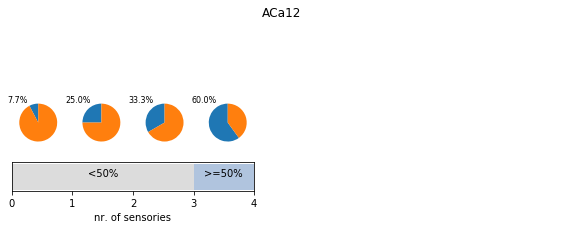

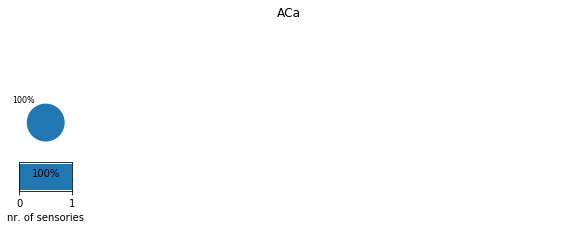

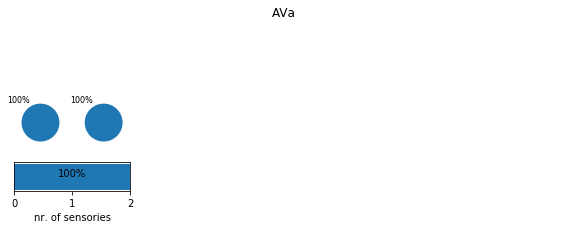

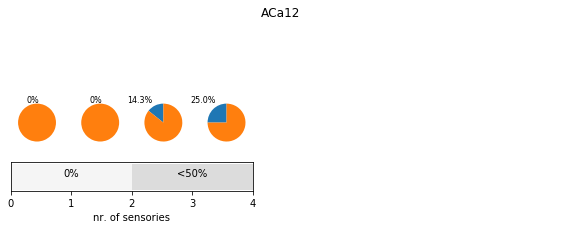

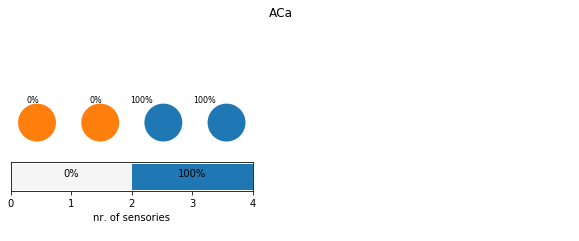

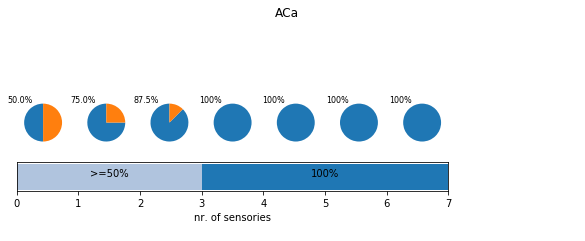

In [253]:
for mn in mns:
    pie_bars(mn,senlist1)

No input of this type
No input of this type
27
No input of this type
No input of this type


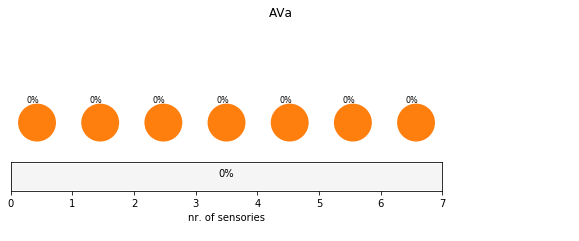

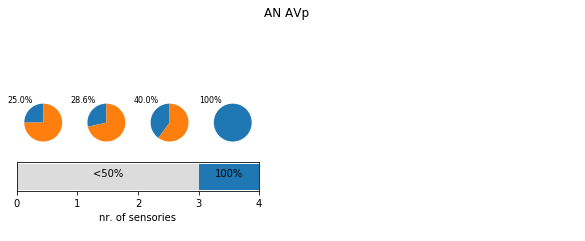

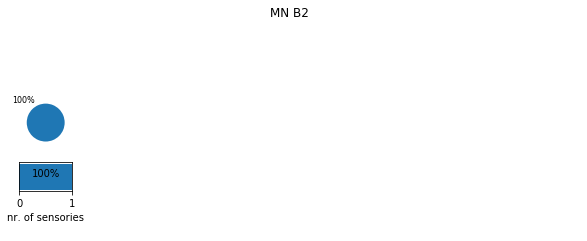

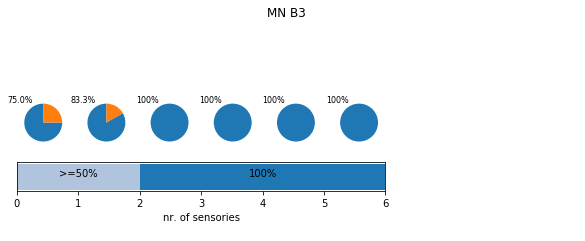

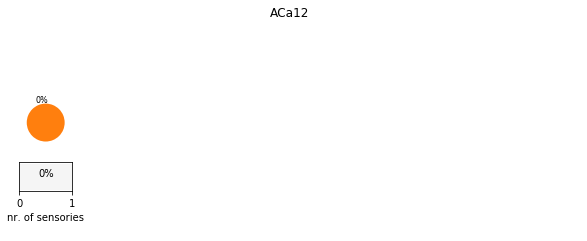

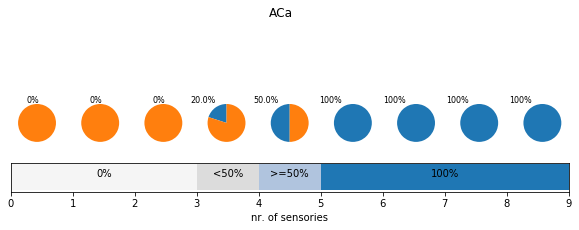

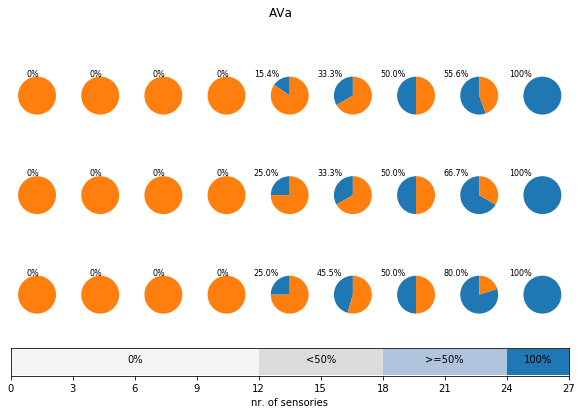

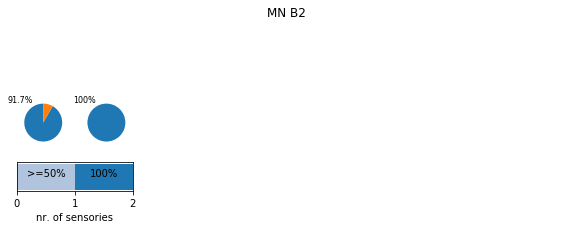

In [254]:
for s in seos:
    pie_bars(s,senlist2)

No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type


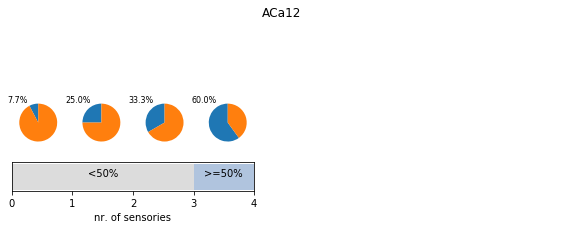

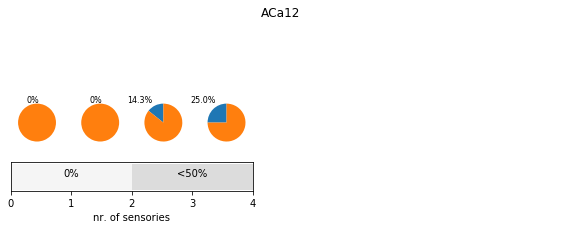

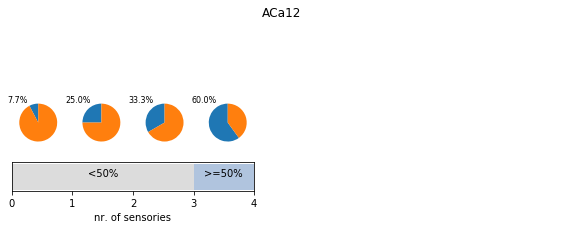

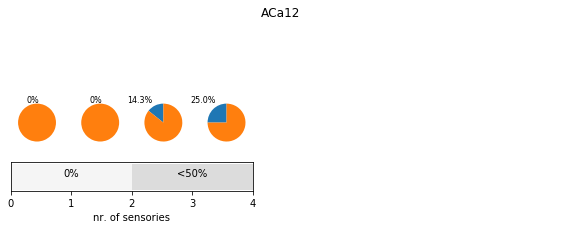

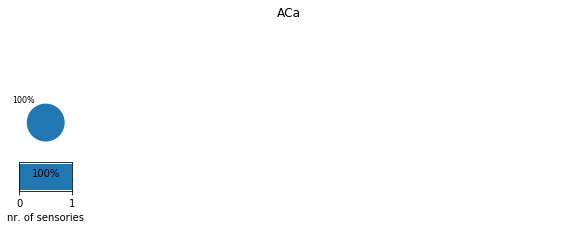

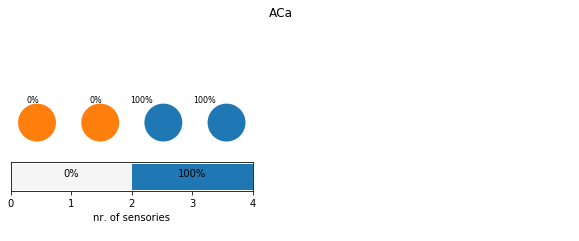

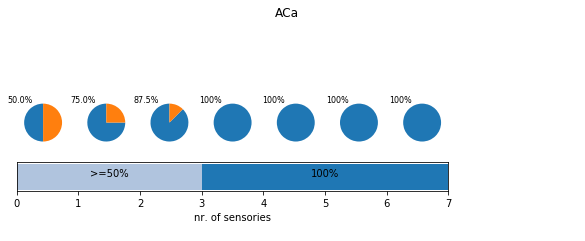

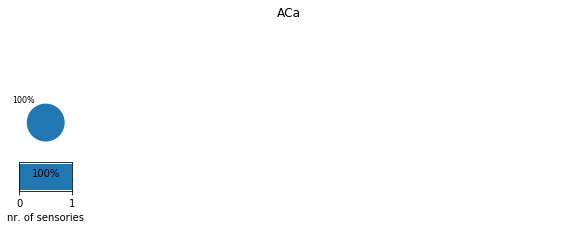

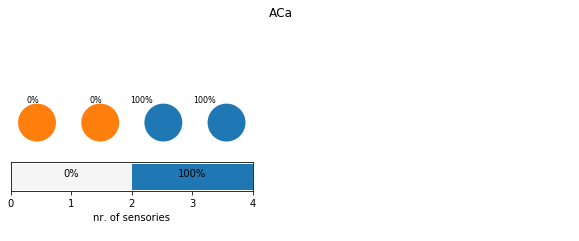

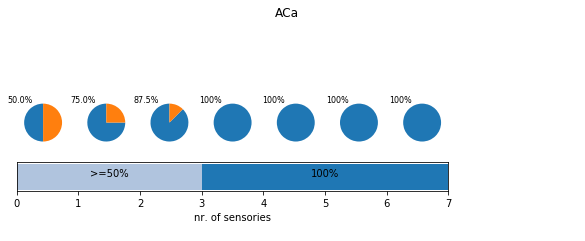

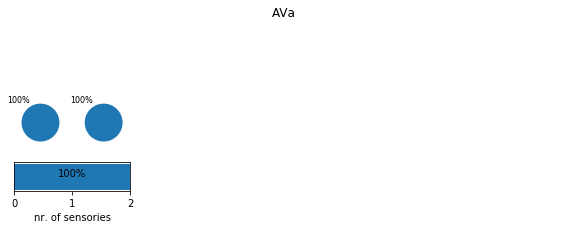

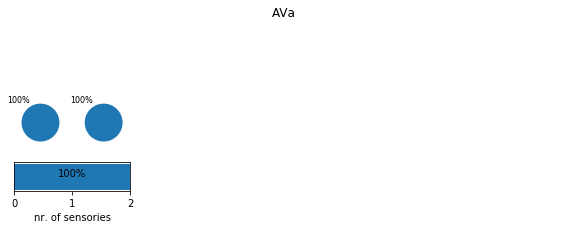

In [255]:
mns_all = []
nrs = []
for s in senlist1:
    data = [sen_ratio(mn,s)[:-1] for mn in mns]
    tots = [sen_ratio(mn,s)[-1:] for mn in mns]
    mns_all.append(pd.DataFrame(data,index = ['IPC','DMS','DH44'],columns = [1,2,3,4]))
    nrs.append(list(itertools.chain.from_iterable(tots)))


Getting the bar plots for the mNSCs

In [256]:
sen_all = []
nrs1 = []
cols_orig = [1,2,3,4]
tars = ['IPC','DMS','DH44']
cols_exp = ['sens > inter',
    'inter > sens']
count = 0
for mn in mns:
    data = [simple_sen_ratio(mn,s)[:-1] for s in senlist1]
    tots = [simple_sen_ratio(mn,s)[-1:] for s in senlist1]
    
    # The first one is for when you need the tables that are easier to read- I saved those in barplot-tables-only
#     sen_all.append(pd.DataFrame(data,index = [n+'-'+tars[count] for n in senlist1],columns = cols_orig))
    sen_all.append(pd.DataFrame(data,index = senlist1,columns = cols_exp))

    nrs1.append(list(itertools.chain.from_iterable(tots)))
    count+=1
#The lists of numbers in nrs refer to IPC,DMS,DH44
for i in range(0,len(sen_all)):
    sen_all[i].to_csv(r'/home/ben/all-csvs/simple_distance_barplots'+tars[i]+'.csv')

NameError: name 'simple_sen_ratio' is not defined

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots()

sen_all[0].plot.bar(stacked=True,width = 0.12,position = 1.2,color = cat_cols,left= 2,ax=ax)
sen_all[1].plot.bar(stacked=True,width = 0.12,position = 0,color = cat_cols,left = 2,ax=ax)
sen_all[2].plot.bar(stacked=True,width = 0.12,position = -1.2,color = cat_cols,left = 2, ax=ax)

# ax.minorticks_on()
# ax = plt.gca()
pos = []
lab = []
for bar in ax.patches:
    pos.append(bar.get_x()+bar.get_width()/2.)
ax.set_xticks(pos,minor=True)
# lab = ['IPC','IPC','IPC']
# print(len(pos))
# for i in range(int(len(pos))):
#     print(i)
#     l = 'IPC'
#     lab.append(l)
print(len(set(pos)))
print(pos)
# lab_ipc = ['IPC']*4+['IPC(2)']*4+['IPC(3)']*4
# lab_ipc = ['A','B','C','A','B','C','A','B','C','A','B','C']
lab_ipc = ['IPC '+'('+str(n)+')' if n!=0 else 'IPC' for n in nrs1[0]]*2
lab_dm = ['DMS '+'('+str(n)+')' if n!=0 else 'DMS' for n in nrs1[1]]*2
lab_dh = ['DH44 '+'('+str(n)+')' if n!=0 else 'DH44' for n in nrs1[2]]*2


# A e ACa12, B e ACa, C = AVa
# print(len(lab_ipc))
# lab_dm = ['DMS']*12
# lab_dh = ['DH44']*12
lab = lab_ipc+lab_dm+lab_dh
ax.set_xticklabels(lab,minor=True,fontsize = 7,rotation=45)
ax.tick_params(axis='x', which='major', pad=35, size=0,width=40)
plt.setp(ax.get_xticklabels(), rotation=0)

left, right = plt.xlim() 
bott, top = plt.ylim()
plt.xlim(-0.3, right)
plt.ylabel('% of sensories')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.04,1), loc="upper left")
# ax.get_legend().remove()
ax.tick_params(axis='y',length=4)
plt.yticks(np.arange(0,110,10))
plt.savefig('simple-barplots-mNSCs-long-leg.png',bbox_inches='tight',dpi=1000)


Getting the bar plots for the se0s

In [ ]:
sen_seos = []
nrs2= []
cols_orig = [1,2]
cols_exp = ['1: sens>inter',
    '2: inter>sens']
tars_seo = ['Se0ph','Se0en']
count = 0
for mn in seos:
    data = [simple_sen_ratio(mn,s)[:-1] for s in senlist2]
    tots = [simple_sen_ratio(mn,s)[-1:] for s in senlist2]
    
#     sen_seos.append(pd.DataFrame(data,index = [n+'-'+tars_seo[count] for n in senlist2],columns = cols_orig))
    sen_seos.append(pd.DataFrame(data,index = senlist2,columns = cols_orig))
    nrs2.append(list(itertools.chain.from_iterable(tots)))
    count+=1
for i in range(0,len(sen_seos)):
    sen_seos[i].to_csv(r'/home/ben/all-csvs/simple_distance_barplots'+tars_seo[i]+'.csv')

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2366: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



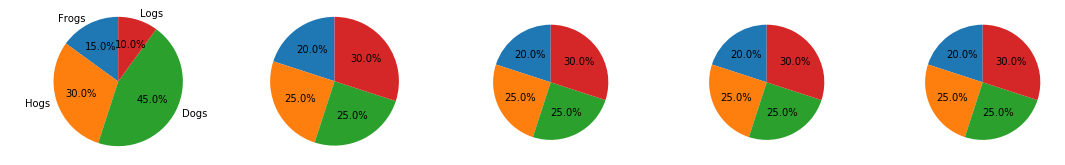

In [291]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]# only "explode" the 2nd slice (i.e. 'Hogs')
nizes = [20,25,25,30]
# fig1, ax1 = plt.subplots()
# fig2, ax2 = plt.subplots()
fig = plt.figure()
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle

ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(nizes, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax3 = fig.add_axes([1., .0, .5, .5], aspect=1)
ax3.pie(nizes, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax4 = fig.add_axes([1.5, .0, .5, .5], aspect=1)
ax4.pie(nizes, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax5 = fig.add_axes([2., .0, .5, .5], aspect=1)
ax5.pie(nizes, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal') 
ax2.axis('equal')
plt.tight_layout()
plt.show()

With two categories

In [213]:
from fractions import Fraction
def simple_sen_ratio(tripdf,tp):
    
    dh_df = tripdf.loc[tripdf['type']==tp]
    if dh_df.empty==True:
        print('No input of this type')
        n_all = 0
        return [n_all]
    else:
    
        sources = list(set([n[0:19] for n in dh_df.source.values.tolist()]))
        n_all = len(sources)
        cat_d = {1:[],2:[]}
        for s in sources:
            sub = dh_df.loc[dh_df['source'].str.contains(s)]
            difs = sub['diff (sens-inter)'].values.tolist()
#             sigs = sub['significant'].values.tolist()
#             zipped = [el for el in zip(difs,sigs)]
            pos = [n for n in difs if n>0]
#             print(str(len(sig_true))+', '+str(len(sigs)))
#             if False not in sigs:
#                 print(s+'-all true')
            if len(pos) < len(difs)/2:
                cat_d[2].append(s)
            elif len(pos) >= len(difs)/2:
                cat_d[1].append(s)
                


#         print(cat_d)
#         print(n_all)
        newcat_d = {key:round(len(cat_d[key])/n_all*100,2) for key in cat_d.keys()}
#         newcat_d = {key:len(cat_d[key]) for key in cat_d.keys()}
        finlist = list(newcat_d.values())+[n_all]
        return finlist

In [211]:
pse0e

Unnamed: 0                    source  \
0             0   AN-R-Sens-B1-AVa-22 (2)   
1             1   AN-R-Sens-B1-AVa-22 (2)   
2             2   AN-R-Sens-B1-AVa-27 (2)   
3             3   AN-R-Sens-B1-AVa-26 (2)   
4             4   AN-R-Sens-B1-AVa-26 (2)   
5             5   AN-R-Sens-B1-AVa-16 (6)   
6             6   AN-R-Sens-B1-AVa-28 (3)   
7             7  AN-R-Sens-B1-AVa-15 (16)   
8             8  AN-R-Sens-B1-AVa-15 (16)   
9             9   AN-R-Sens-B1-AVa-25 (2)   
10           10   AN-R-Sens-B1-AVa-18 (2)   
11           11   AN-R-Sens-B1-AVa-29 (2)   
12           12   AN-R-Sens-B1-AVa-29 (2)   
13           13   AN-R-Sens-B1-AVa-24 (6)   
14           14   AN-L-Sens-B1-AVa-36 (2)   
15           15   MN-L-Sens-B2-AVp-01 (2)   
16           16   MN-L-Sens-B2-AVp-01 (2)   
17           17   MN-L-Sens-B2-AVp-01 (2)   
18           18   MN-L-Sens-B2-AVp-01 (2)   
19           19   AN-L-Sens-B1-ACa-09 (2)   
20           20   AN-L-Sens-B1-ACa-09 (2)   
21           21   AN-L-Sens-B1-ACa-09 (2)   
22           22   AN-L-Sens-B1-AVa-34 (3)   
23           23   AN-L-Sens-B1-AVa-34 (3)   
24           24  AN-L-Sens-B1-AVa-17 (10)   
25           25  AN-L-Sens-B1-AVa-17 (10)   
26           26  AN-L-Sens-B1-AVa-17 (10)   
27           27  AN-L-Sens-B1-AVa-17 (10)   
28           28  AN-L-Sens-B1-AVa-17 (10)   
29           29   AN-L-Sens-B1-AVa-16 (8)   
..          ...                       ...   
103         103   AN-R-Sens-B1-ACa-08 (2)   
104         104   AN-R-Sens-B1-ACa-08 (2)   
105         105   AN-R-Sens-B1-AVa-15 (3)   
106         106   AN-R-Sens-B1-AVa-15 (3)   
107         107   AN-R-Sens-B1-AVa-15 (3)   
108         108   AN-R-Sens-B1-AVa-15 (3)   
109         109   AN-R-Sens-B1-AVa-15 (3)   
110         110   AN-R-Sens-B1-AVa-33 (2)   
111         111   AN-R-Sens-B1-ACa-17 (3)   
112         112   AN-R-Sens-B1-ACa-17 (3)   
113         113   AN-R-Sens-B1-AVa-23 (5)   
114         114   AN-R-Sens-B1-AVa-23 (5)   
115         115   AN-R-Sens-B1-AVa-23 (5)   
116         116   AN-R-Sens-B1-AVa-23 (5)   
117         117   AN-R-Sens-B1-AVa-26 (2)   
118         118   AN-R-Sens-B1-AVa-26 (2)   
119         119   AN-L-Sens-B1-ACa-01 (2)   
120         120   AN-L-Sens-B1-ACa-01 (2)   
121         121   AN-L-Sens-B1-ACa-01 (2)   
122         122  AN-R-Sens-B1-AVa-16 (13)   
123         123  AN-R-Sens-B1-AVa-16 (13)   
124         124  AN-R-Sens-B1-AVa-16 (13)   
125         125   AN-R-Sens-B1-AVa-21 (3)   
126         126   AN-R-Sens-B1-AVa-21 (3)   
127         127   MN-R-Sens-B2-AVp-01 (2)   
128         128   AN-R-Sens-B1-AVa-15 (8)   
129         129   AN-R-Sens-B1-AVa-15 (8)   
130         130   AN-R-Sens-B1-AVa-24 (3)   
131         131   AN-R-Sens-B1-AVa-24 (3)   
132         132   AN-R-Sens-B1-AVa-24 (3)   

                                           interneuron  target  \
0                                 SEZ-IN-08-right (10)  SE0 R3   
1                                      SEZ-X-right (9)  SE0 R3   
2                                 SEZ-IN-08-right (10)  SE0 R3   
3                                 SEZ-IN-08-right (10)  SE0 R3   
4                                      SEZ-X-right (9)  SE0 R3   
5                                      SEZ-X-right (9)  SE0 R3   
6                                      SEZ-X-right (9)  SE0 R3   
7                                      SEZ-X-right (9)  SE0 R3   
8                                  SEZ-IN-05-right (5)  SE0 R3   
9                                      SEZ-X-right (9)  SE0 R3   
10                                     SEZ-X-right (9)  SE0 R3   
11                                     SEZ-X-right (9)  SE0 R3   
12                                 SEZ-IN-05-right (5)  SE0 R3   
13                                SEZ-IN-08-right (10)  SE0 R3   
14                            AX ; SEZ-IN-A03-left (6)  SE0 L1   
15        SEZ-IN-A05-right - paired with #6885133 (16)  SE0 L1   
16                                  SEZ-IN-03-left (6)  SE0 L1   
17                        

In [212]:
simple_sen_ratio(pse0e,'ACa12')

[0.0, 100.0, 1]

In [57]:
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering

In [251]:
csv_ndms= df_type(pd.read_csv(r'/home/ben/all-csvs/syn_dms_triple_dif.csv'))
csv_nipc= df_type(pd.read_csv(r'/home/ben/all-csvs/syn_ipc_triple_dif.csv'))
csv_ndh= df_type(pd.read_csv(r'/home/ben/all-csvs/syn_dh_triple_dif.csv'))
csv_nse0p= df_type(pd.read_csv(r'/home/ben/all-csvs/syn_se0ph_triple_dif.csv'),True)
csv_nse0e= df_type(pd.read_csv(r'/home/ben/all-csvs/syn_se0ens_triple3_dif.csv'),True)

In [275]:
csv_ndms.avg_dist_source

0     0.322240
1     0.322240
2     0.322240
3     0.323191
4     0.323191
5     0.323191
6     0.323191
7     0.402159
8     0.402159
9     0.319833
10    0.319833
11    0.397037
12    0.299217
13    0.299217
14    0.299217
15    0.299217
16    0.390296
17    0.344296
18    0.344296
19    0.344296
20    0.361892
21    0.361892
22    0.361892
23    0.361892
24    0.519340
25    0.358814
26    0.358814
27    0.358814
28    0.395761
29    0.518654
30    0.518654
31    0.483345
32    0.483345
Name: avg_dist_source, dtype: float64

In [200]:
dms_new = pd.concat([csv_ndms,csv_dms],axis = 1)

In [93]:
ipc_new = pd.concat([csv_nipc,csv_ipc],axis = 1,ignore_index=False,levels=None,
                    names=None, verify_integrity=False, keys=None,copy=True)

In [94]:
dh_new = pd.concat([csv_ndh,csv_dh],axis = 1)

In [85]:
se0p_new = pd.concat([csv_nse0p,csv_se0p],axis = 1)

In [86]:
se0e_new = pd.concat([csv_nse0e,csv_se0ens],axis = 1)

In [105]:
ipctrip0.rename(columns={'dist_source':'avg_dist_source','dist_inter':'avg_dist_inter'},inplace = True)

In [162]:
m_ipc = pd.merge(csv_ipc,ipctrip1)
m_dms = pd.merge(csv_dms,dmstrip1)
m_dh = pd.merge(csv_dh,dhtrip1)
m_se0p = pd.merge(csv_se0p,se0ptrip1)
m_se0ens = pd.merge(csv_se0ens,se0enstrip1)

In [107]:
m_ipc.drop(columns = ['all_disp_source','all_disp_inter','diff (sens-int)','all_dist_source','all_dist_inter'])

Unnamed: 0                   source  \
0            0  AN-L-Sens-B1-AVa-19 (2)   
1            1  AN-L-Sens-B1-ACa-02 (3)   
2            2  AN-L-Sens-B1-ACa-02 (3)   
3            3  AN-R-Sens-B1-ACa-01 (2)   
4            4  AN-R-Sens-B1-ACa-02 (5)   
5            5  AN-R-Sens-B1-ACa-02 (5)   
6            6  AN-L-Sens-B1-ACa-02 (4)   
7            7  AN-L-Sens-B1-ACa-02 (4)   
8            8  AN-L-Sens-B1-ACa-02 (4)   
9            9  AN-L-Sens-B1-ACa-02 (6)   
10          10  AN-L-Sens-B1-ACa-02 (6)   
11          11  AN-R-Sens-B1-ACa-01 (2)   
12          12  AN-R-Sens-B1-ACa-01 (2)   
13          13  AN-R-Sens-B1-ACa-02 (3)   
14          14  AN-L-Sens-B1-ACa-02 (3)   
15          15  AN-L-Sens-B1-ACa-02 (3)   
16          16  AN-L-Sens-B1-ACa-02 (3)   
17          17  AN-L-Sens-B1-ACa-01 (3)   
18          18  AN-L-Sens-B1-ACa-01 (3)   
19          19  AN-L-Sens-B1-ACa-02 (2)   
20          20  AN-L-Sens-B1-ACa-02 (2)   
21          21  AN-L-Sens-B1-ACa-02 (2)   
22          22  AN-L-Sens-B1-ACa-01 (6)   
23          23  AN-L-Sens-B1-ACa-01 (6)   
24          24  AN-R-Sens-B1-ACa-02 (4)   
25          25  AN-R-Sens-B1-ACa-02 (4)   
26          26  AN-L-Sens-B1-ACa-01 (4)   
27          27  AN-L-Sens-B1-ACa-01 (4)   
28          28  AN-R-Sens-B1-ACa-01 (4)   
29          29  AN-R-Sens-B1-ACa-02 (5)   
30          30  AN-L-Sens-B1-ACa-01 (4)   
31          31  AN-R-Sens-B1-ACa-02 (2)   
32          32  AN-L-Sens-B1-ACa-01 (8)   
33          33  AN-L-Sens-B1-ACa-01 (8)   
34          34  AN-L-Sens-B1-ACa-01 (8)   
35          35  AN-R-Sens-B1-ACa-02 (4)   
36          36  AN-L-Sens-B1-ACa-01 (2)   
37          37  AN-R-Sens-B1-ACa-02 (4)   
38          38  AN-L-Sens-B1-ACa-01 (6)   
39          39  AN-R-Sens-B1-AVa-19 (4)   
40          40  AN-R-Sens-B1-AVa-19 (2)   
41          41  AN-L-Sens-B1-ACa-10 (2)   
42          42  AN-L-Sens-B1-ACa-10 (2)   
43          43  AN-R-Sens-B1-ACa-02 (3)   

                                          interneuron       target  \
0                                 hugin-PC left 4 (3)   IPC 2 left   
1                             AN: DPMlp Lar_right (9)   IPC 2 left   
2                                 hugin-PC left 1 (2)   IPC 2 left   
3                                 hugin-PC left 4 (3)   IPC 2 left   
4                             AN: DPMlp Lar_right (9)   IPC 2 left   
5   SOG into brain contralaterally right - paired ...   IPC 2 left   
6                             AN: DPMlp Lar_right (7)   IPC 7 left   
7                                 hugin-PC left 1 (2)   IPC 7 left   
8                                 hugin-PC left 3 (2)   IPC 7 left   
9                              contra-vine 2 left (2)  IPC 3 right   
10                                SEZ-IN-13-right (2)  IPC 3 right   
11                             AN: DPMlp Lar_left (9)  IPC 3 right   
12                               hugin-PC right 3 (3)  IPC 3 right   
13                             AN: DPMlp Lar_left (9)  IPC 3 right   
14                            AN: DPMlp Lar_right (9)   IPC 4 left   
15                                hugin-PC left 1 (4)   IPC 4 left   
16                                hugin-PC left 3 (3)   IPC 4 left   
17                              T1r asc contra 02 (6)   IPC 4 left   
18                              contra-vine right (2)   IPC 4 left   
19                            AN: DPMlp Lar_right (5)   IPC 1 left   
20                                hugin-PC left 1 (7)   IPC 1 left   
21                                hugin-PC left 3 (4)   IPC 1 left   
22                              T1r asc contra 02 (4)   IPC 1 left   
23  SOG into brain contralaterally right - paired ...   IPC 1 left   
24                            AN: DPMlp Lar_right (5)   IPC 1 left   
25  SOG into brain contralaterally right - paired ...   IPC 1 left   
26                              T1r asc contra 02 (3)   IPC 3 left   
27                                hugin-PC left 4 (3)   IPC 3 left   
28                                hugi

In [108]:
m_ipc.loc[m_ipc['target']=='IPC 2 left']

Unnamed: 0                   source  \
0           0  AN-L-Sens-B1-AVa-19 (2)   
1           1  AN-L-Sens-B1-ACa-02 (3)   
2           2  AN-L-Sens-B1-ACa-02 (3)   
3           3  AN-R-Sens-B1-ACa-01 (2)   
4           4  AN-R-Sens-B1-ACa-02 (5)   
5           5  AN-R-Sens-B1-ACa-02 (5)   

                                         interneuron      target  \
0                                hugin-PC left 4 (3)  IPC 2 left   
1                            AN: DPMlp Lar_right (9)  IPC 2 left   
2                                hugin-PC left 1 (2)  IPC 2 left   
3                                hugin-PC left 4 (3)  IPC 2 left   
4                            AN: DPMlp Lar_right (9)  IPC 2 left   
5  SOG into brain contralaterally right - paired ...  IPC 2 left   

                                     all_disp_source  \
0                                          [0.00144]   
1                  [0.1391572, 0.0101452, 0.1351355]   
2                  [0.1391572, 0.0101452, 0.1351355]   
3                                        [0.1045136]   
4  [0.0355799, 0.0886616, 0.0680333, 0.0783827, 0...   
5  [0.0355799, 0.0886616, 0.0680333, 0.0783827, 0...   

                                      all_disp_inter  avg_disp_source  \
0                   [0.030435, 0.0059607, 0.0244744]         0.001440   
1  [0.0426879, 0.0815147, 0.0944371, 0.0045075, 0...         0.094813   
2                                        [0.0159893]         0.094813   
3                   [0.030435, 0.0059607, 0.0244744]         0.104514   
4  [0.0426879, 0.0815147, 0.0944371, 0.0045075, 0...         0.049071   
5                                        [0.0516443]         0.049071   

   avg_disp_inter  diff (sens-int)   type  \
0        0.020290         0.018850    AVa   
1        0.051145        -0.043668  ACa12   
2        0.015989        -0.078823  ACa12   
3        0.020290        -0.084224  ACa12   
4        0.051145         0.002073  ACa12   
5        0.051644         0.002573  ACa12   

                                     all_dist_source  \
0           [0.4664257013338898, 0.4678657431906183]   
1  [0.30789916604375617, 0.44705633322333765, 0.3...   
2  [0.30789916604375617, 0.44705633322333765, 0.3...   
3          [0.3376947647055629, 0.44220835986269424]   
4  [0.33194756101721223, 0.32166866744472633, 0.4...   
5  [0.33194756101721223, 0.32166866744472633, 0.4...   

                                      all_dist_inter  avg_dist_source  \
0  [0.37794597713292793, 0.37198529027691285, 0.3...         0.467146   
1  [0.36802461681671905, 0.3559251638109382, 0.36...         0.357667   
2           [0.3875536842548396, 0.3715644211623215]         0.357667   
3  [0.37794597713292793, 0.37198529027691285, 0.3...         0.389952   
4  [0.36802461681671905, 0.3559251638109382, 0.36...         0.366291   
5          [0.34436216466749775, 0.3153502778131008]         0.366291   

   avg_dist_inter  
0        0.369976  
1        0.353380  
2        0.379559  
3        0.369976  
4        0.353380  
5        0.329856

In [163]:
mycols = ['darkorange','limegreen','gold','darkorchid','cyan','springgreen',
          'hotpink','darkturquoise','crimson','darkblue','deepskyblue','darkolivegreen','magenta',
         'aqua','orchid','royalblue','darkred','thistle','mediumvioletred','chocolate','violet','darksalmon','orangered']

# Clustering + ranking index

Ranking index: number of synapses between neuron s and a target neuron m, divided by the highest number of synapses among all incoming synaptic connections to m

Calculating the ranking index and putting it in the csvs- there is one per each neuron per each target

In [244]:
csv_ddms= df_type(pd.read_csv(r'/home/ben/all-csvs/syn_dms_triple_disp.csv'))
csv_dipc= df_type(pd.read_csv(r'/home/ben/all-csvs/syn_ipc_triple_disp.csv'))
csv_ddh= df_type(pd.read_csv(r'/home/ben/all-csvs/syn_dh_triple_disp.csv'))
csv_dse0p= df_type(pd.read_csv(r'/home/ben/all-csvs/syn_se0ph_disp.csv'),True)
csv_dse0e= df_type(pd.read_csv(r'/home/ben/all-csvs/syn_se0ens_disp_dif.csv'),True)

In [245]:
csv_ddms.columns

Index(['Unnamed: 0', 'source', 'interneuron', 'target', 'all_disp_source',
       'all_disp_inter', 'avg_disp_source', 'avg_disp_inter', 'diff(s-i)',
       'nr_s', 'nr_i', 'nr_diff(s-i)', 'rank_s', 'rank_i', 'type'],
      dtype='object')

In [246]:
def new (df,t):
    nw_df=df.copy(deep=True)
    for n in df.columns[4:]:
        for m in df.index.values:
            v=df.loc[m].at[n]
            if int(v)<t:
                nw_df.at[m,n] = 0
    return nw_df


In [247]:
def rank_idx (s,m,tr,mins): 
    sen = pymaid.find_neurons(s)
    mot = pymaid.find_neurons(m)
    mcons=pymaid.get_partners(mot,directions=['incoming'], min_size = 1)
    n_cons=new(mcons,2)
    sens=sen.skeleton_id.tolist()

    cons = [n_cons.loc[n_cons['skeleton_id']==n] for n in sens]
    result = pd.concat(cons)
    
    r = sum(result.total)
    print(r)
    t = mcons.total[0]
    return round(r/t,2)

pymaid.clear_cache()
rank_idx('AN-R-Sens-B1-ACa-01', 'DMS 1 left',2,1)


6.0


0.86

Seeing if there is a correlation between nr. of synapses and distance for the sensory

In [205]:
colors = dict(mcolors.TABLEAU_COLORS)
senlist1 =['ACa12', 'ACa','AVa']
senlist2 = ['ACa12', 'ACa', 'AVa', 'AN AVp', 'MN B2', 'MN B3']

In [206]:
from numpy.polynomial.polynomial import polyfit
from scipy import stats
import statsmodels.api as sm

from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import bartlett

mycols = ['darkorange','darkorchid','springgreen','red','blue','green','magenta'
          ,'chocolate','hotpink','darkturquoise','crimson','darkblue','thistle','mediumvioletred',
         'aqua','orchid','dimgray','royalblue','darkred','aquamarine','violet','darksalmon','orangered',
         'teal','palegreen','silver','purple','deepskyblue','darkolivegreen','darkgoldenrod','lightblue','lightpink']*2

# from mlxtend.plotting import plot_linear_regression
new_tpcols = ['darkblue','dodgerblue','limegreen','mediumorchid','magenta','sandybrown']

def syn_cluster_plot(df,tar,tp,sn = False,rank = False):
    
#     df.reset_index(drop=True)
    dh_df = df.loc[df['target'].str.contains(tar)]
    
    tarname = dh_df.target.values.tolist()[0]
    # Getting the sensory type list
    if 'SE' in tarname:
        tplist = senlist2
    else:
        tplist = senlist1
        

    dh_df.reset_index()
    
    
    if sn == False:
        
        if rank == False:
            
            vals = [list(n) for n in zip(dh_df['rank_s'].values.tolist(),
                               dh_df['avg_dist_source'].values.tolist())]
        else:
            vals = [list(n) for n in zip(dh_df['rank_s'].values.tolist(),
                               dh_df['avg_disp_source'].values.tolist())]
    else:
        if rank == False:
             vals = [list(n) for n in zip(dh_df['rank_i'].values.tolist(),
                               dh_df['avg_dist_inter'].values.tolist())]
        else:
            vals = [list(n) for n in zip(dh_df['rank_i'].values.tolist(),
                               dh_df['avg_disp_inter'].values.tolist())]
       
        
        
    newl = dh_df.source.values.tolist()
    s_newl = list(set(newl))
    newvals = list(set(tuple(i) for i in vals))
    
#     print(int(newvals[0][0]))
    xs = np.array([newvals[i][0] for i in range(0,len(newvals))])
    ys = np.array([newvals[i][1] for i in range(0,len(newvals))])
    mod_fit = sm.OLS(xs,ys).fit()
    res = mod_fit.resid
    fig = sm.qqplot(res,fit=True,line ='45')
    plt.figure()
#     print(res)
#     normality part

    alpha = 0.05
    if len(xs) >=3 and len(ys) >=3:
        shap1, t1 = shapiro(xs)
        shap2, t2 = shapiro(ys)
        if t1 > alpha and t2 > alpha:
            lev_, lp = bartlett(xs,ys)
            print('x and y looks Gaussian (fail to reject H0)')
        else:
            lev_, lp = levene(xs,ys)
            print('x and y dont look Gaussian (reject H0)')

        if lp > alpha:
            print('Normality holds')
        else:
            print('Normality doesnt hold')
    
#      regression part
    slope, intercept, r_value, p_value, std_err = stats.linregress(xs,ys)
    line = slope*xs+intercept
#     resline0 = [(ys.tolist()[i] - line.tolist()[i])**2 for i in range(0,len(line.tolist())) ]

#     resline = [ys.tolist()[i] - line.tolist()[i] for i in range(0,len(line.tolist())) ]

#     resline2 = [line.tolist()[i] - ys.tolist()[i] for i in range(0,len(line.tolist())) ]

    
    plt.plot(xs, line, 'r', label=['y={:.2f}x+{:.2f}'.format(slope,intercept),'r = '+str(round(r_value,5)),
                                   str(p_value<0.05)],linewidth = '0.2')

    if tp!='':
        tp_df = dh_df.loc[dh_df['type']==tp]
        tp_vals = [list(n) for n in zip(tp_df['nr_s'].values.tolist(),
                                   tp_df['avg_disp_source'].values.tolist())]

        newtp = tp_df.source.values.tolist()
        newvals_tp = list(set(tuple(i) for i in tp_vals))
        count = 0
        for v in newvals_tp:
            plt.scatter(v[0],v[1],color = new_tpcols[senlist2.index(tp)],label=tp)
 
    else:
        for v in newvals:
#             ind = df.index[df['avg_dist_source']==v[0]].tolist()[0]
#             name = df['source'].iloc[ind]
#             nname = name
#             tp_name = df['type'].iloc[ind]

            if tp == '':
                if sn == False:
                    plt.scatter(v[0],v[1],color = 'dodgerblue',label='sensory')
                else:
                    plt.scatter(v[0],v[1],color = 'orangered',label='interneuron')

                
    if 'SE' not in tarname:
        figname = tarname[:3]
        plt.title(tarname[:4]+' '+tar)
    else:
        if '4' in tarname:
            figname = 'SE0ph'
            plt.title('SE0 ph '+tar)
        else:
            figname = 'SE0ens'

            plt.title('SE0 ens '+tar)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.04,1), loc="upper left")

    
    if sn == False:
        if rank == False:
            plt.xlabel('nr. of synapses')
            plt.ylabel('dispersion')
            if tp =='':
                plt.savefig('syn-disper-all'+figname+tar+'.png',bbox_inches='tight',dpi=1000)
            else:
                plt.savefig('syn-disper-type-'+tp+'-'+figname+tar+'.png',bbox_inches='tight',dpi=1000)
        else:
            plt.xlabel('ranking index')
            plt.ylabel('dispersion')
            plt.savefig('new-rank-syn-disper-'+figname+tar+'.png',bbox_inches='tight',dpi=1000)

    else:
        if rank == False:
            plt.xlabel('ranking index')
            plt.ylabel('distance')
        else:
            plt.xlabel('ranking index')
            plt.ylabel('dispersion')
        if tp =='':
            if sn == False:
                plt.savefig('new-syn-disper-sens'+figname+tar+'.png',bbox_inches='tight',dpi=1000)
            else:
                if rank == False:
                    plt.savefig('syn-dist-intern'+figname+tar+'.png',bbox_inches='tight',dpi=1000)
                else:
                    plt.savefig('new-syn-disper-rank-intern'+figname+tar+'.png',bbox_inches='tight',dpi=1000)


        else:
            plt.savefig('new-syn-disper-type-sens'+tp+'-'+figname+tar+'.png',bbox_inches='tight',dpi=1000)


    return plt

x and y dont look Gaussian (reject H0)
Normality doesnt hold


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

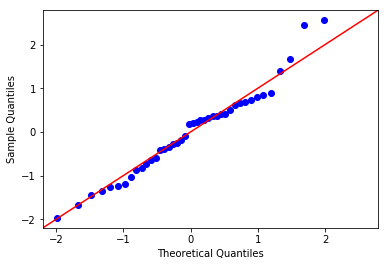

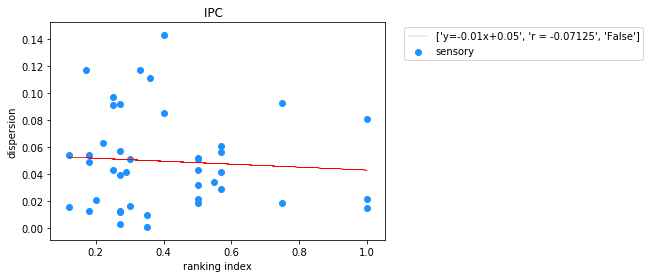

In [299]:
syn_cluster_plot(csv_dipc,'','',False,True)

x and y dont look Gaussian (reject H0)
Normality doesnt hold


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

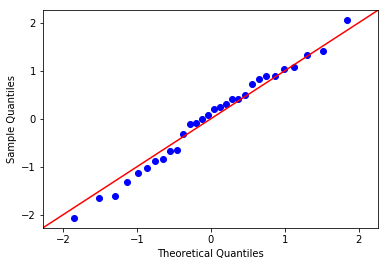

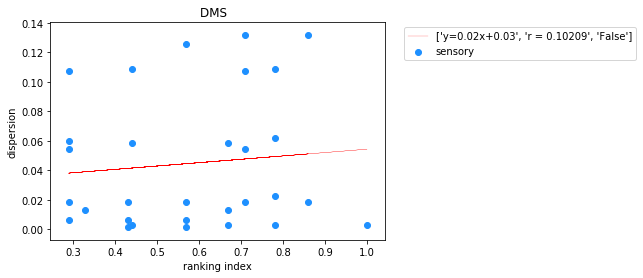

In [300]:
syn_cluster_plot(csv_ddms,'','',False,True)

x and y dont look Gaussian (reject H0)
Normality doesnt hold


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

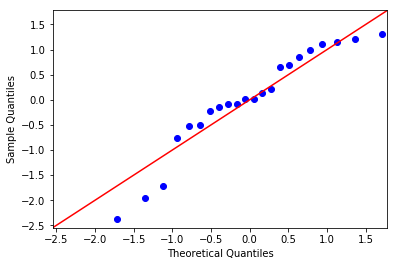

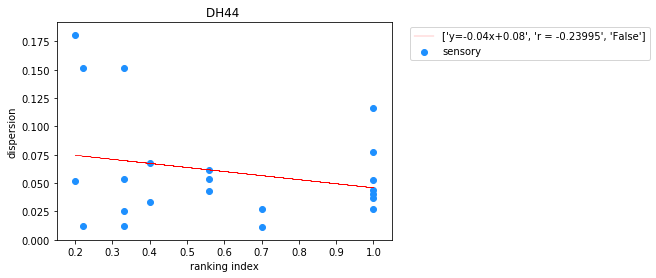

In [301]:
syn_cluster_plot(csv_ddh,'','',False,True)

x and y dont look Gaussian (reject H0)
Normality doesnt hold


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

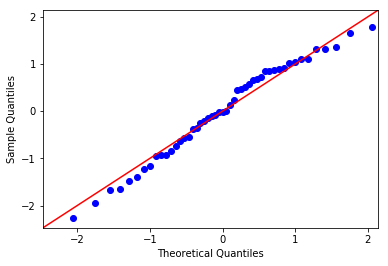

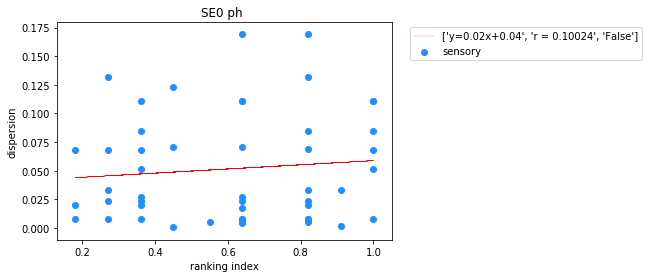

In [302]:
syn_cluster_plot(csv_dse0p,'','',False,True)

x and y dont look Gaussian (reject H0)
Normality doesnt hold


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

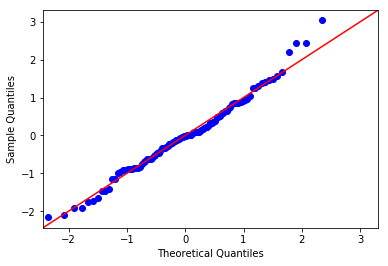

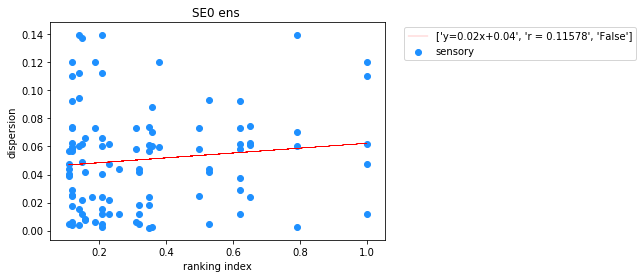

In [303]:
syn_cluster_plot(csv_dse0e,'','',False,True)

Now the interneurons

x and y dont look Gaussian (reject H0)
Normality doesnt hold


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

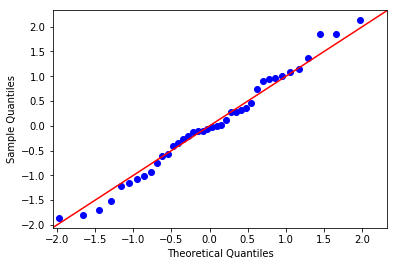

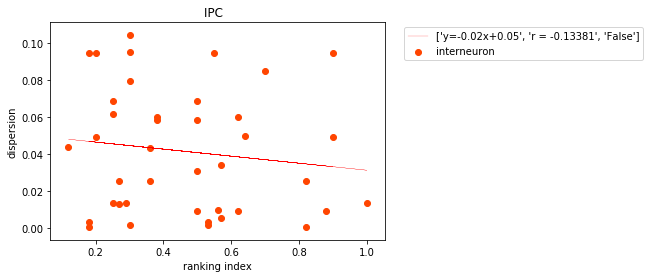

In [304]:
syn_cluster_plot(csv_dipc,'','',True,True)

x and y dont look Gaussian (reject H0)
Normality doesnt hold


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

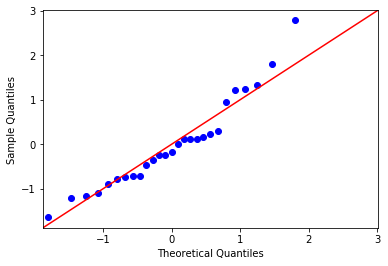

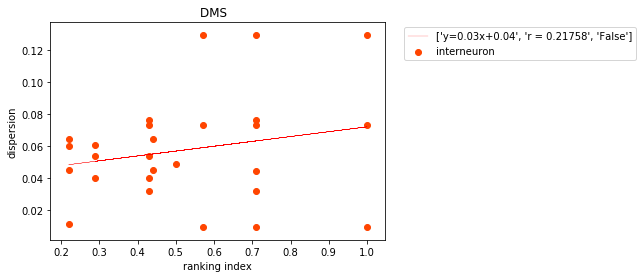

In [305]:
syn_cluster_plot(csv_ddms,'','',True,True)

x and y dont look Gaussian (reject H0)
Normality doesnt hold


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

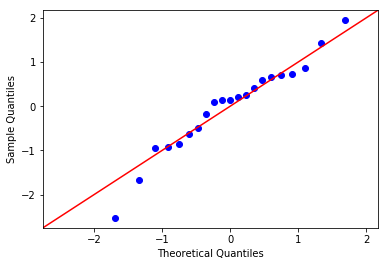

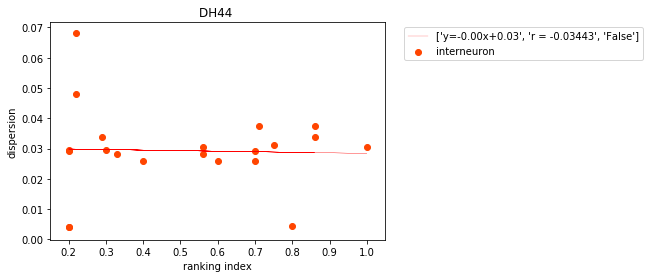

In [306]:
syn_cluster_plot(csv_ddh,'','',True,True)

x and y dont look Gaussian (reject H0)
Normality doesnt hold


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

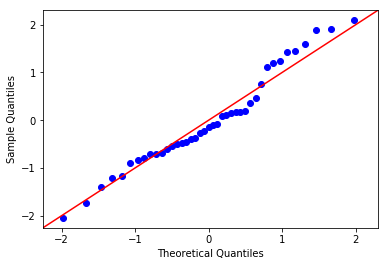

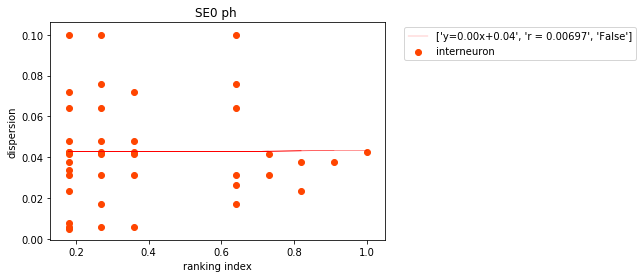

In [307]:
syn_cluster_plot(csv_dse0p,'','',True,True)

x and y dont look Gaussian (reject H0)
Normality doesnt hold


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

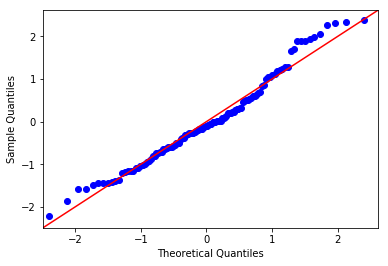

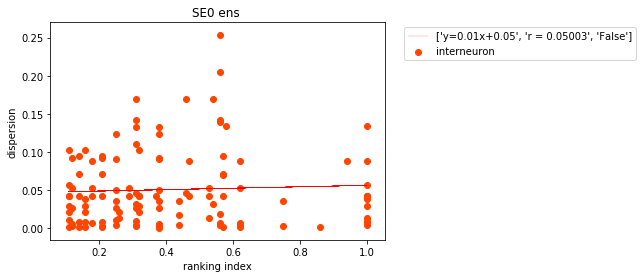

In [308]:
syn_cluster_plot(csv_dse0e,'','',True,True)

In [ ]:
syn_cluster_plot(csv_dipc,'','',True,True)

Spearman correlation for distance or dispersion: ranking index vs. values

In [311]:
# calculate the spearman's correlation between two variables
from numpy.random import rand
from numpy.random import seed
from scipy.stats import spearmanr

def rank_spear(datf, dist = True):
    
#     dh_df = datf.loc[datf['type']=='AVa']
    dh_df = datf.copy()
    tarname = dh_df.target.values.tolist()[0]
    
    
    if dist == True:
#             ranks = [n for n in dh_df['rank_s'].values.tolist()]
        sen_vals = [list(n) for n in zip(dh_df['rank_s'].values.tolist(),
                               dh_df['avg_dist_source'].values.tolist())]
#             print(len(ranks))
#             print(len(vals))
    
#     print(int(newvals[0][0]))


        int_vals = [list(n) for n in zip(dh_df['rank_i'].values.tolist(),
                               dh_df['avg_dist_inter'].values.tolist())]

    else:
        sen_vals = [list(n) for n in zip(dh_df['rank_s'].values.tolist(),
                               dh_df['avg_disp_inter'].values.tolist())]

        int_vals = [list(n) for n in zip(dh_df['rank_i'].values.tolist(),
                               dh_df['avg_disp_inter'].values.tolist())]
            
    s_newvals = list(set(tuple(i) for i in sen_vals))
    i_newvals = list(set(tuple(i) for i in int_vals))

    s_xs = np.array([s_newvals[i][0] for i in range(0,len(s_newvals))])
    s_ys = np.array([s_newvals[i][1] for i in range(0,len(s_newvals))])
    
    i_xs = np.array([i_newvals[i][0] for i in range(0,len(i_newvals))])
    i_ys = np.array([i_newvals[i][1] for i in range(0,len(i_newvals))])
    coef1, p1 = spearmanr(s_xs, s_ys)
    coef2, p2 = spearmanr(i_xs, i_ys)
    
    if 'SE0 R3' in tarname:
        for v in s_newvals:
    #             ind = df.index[df['avg_dist_source']==v[0]].tolist()[0]
    #             name = df['source'].iloc[ind]
    #             nname = name
    #             tp_name = df['type'].iloc[ind]

            plt.scatter(v[0],v[1],color = 'dodgerblue',label='sensory')
#         plt.title('IPC')
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = OrderedDict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.04,1), loc="upper left")
        plt.xlabel('ranking index',fontsize = 12)
        plt.ylabel('dispersion',fontsize = 12)
        plt.title('Se0ens',fontsize=14)
            
            
            
    alpha = 0.05
    newd = {}
    if p1 > alpha:
        newd[round(coef1,4)] = False
        p_s = 'p $>$ 0.05'
    else:
        newd[round(coef1,4)] = True
        print(p1)
        if p1 < 0.001:
            p_s = 'p $<$ 0.001'
        elif p1 < 0.01:
            p_s = 'p $<$ 0.01'
        else:
            p_s = 'p $<$ 0.05'
    if p2 > alpha:
        newd[round(coef2,4)] = False
        p_i = 'p $>$ 0.05'
        
    else:
        newd[round(coef2,4)] = True
        if p2 < 0.001:
            p_i = 'p $<$ 0.001'
        elif p2 < 0.01:
            p_i = 'p $<$ 0.01'
        else:
            p_i = 'p $<$ 0.05'
        print(p2)
#     print('Spearmans correlation coefficient: %.3f' % coef)
#     # interpret the significance
#     alpha = 0.05
#     if p > alpha:
#         print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
#     else:
#         print('Samples are correlated (reject H0) p=%.3f' % p)
    
    return [[round(coef1,4),p_s,round(coef2,4),p_i],newd]


Distance

In [312]:
csv_nipc.columns

Index(['Unnamed: 0', 'source', 'interneuron', 'target', 'all_dist_source',
       'all_dist_inter', 'avg_dist_source', 'avg_dist_inter', 'diff(s-i)',
       'nr_s', 'nr_i', 'nr_diff(s-i)', 'rank_s', 'rank_i', 'type'],
      dtype='object')

In [313]:
rank_spear(csv_nipc)

0.04397520799810432


[[-0.0756, 'p $>$ 0.05', -0.3425, 'p $<$ 0.05'],
 {-0.3425: True, -0.0756: False}]

In [314]:
d1 = {5:6, 3:4}
d2 = {2:3, 6:7}
d3 = {}
d3.update(d1)
d3.update(d2)
d3

{2: 3, 3: 4, 5: 6, 6: 7}

DISTANCE

0.04397520799810432
0.04397520799810432


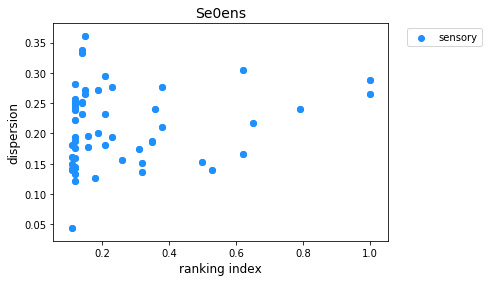

In [315]:
n_csvs = [csv_nipc,csv_ndms,csv_ndh,csv_nse0p,csv_nse0e]
site = []
newd = {}
for df in n_csvs:
    site.append(rank_spear(df)[0])
    newd.update(rank_spear(df)[1])


dist_all = pd.DataFrame(site,index = ['IPC','DMS','DH44','Se0ph','Se0ens'],columns = ['sens_r','p_sens','inter_r','p_inter'])
dist_all.to_csv(r'/home/ben/all-csvs/new-csvs/corr-distance.csv',float_format='%.4f')

In [317]:
def color(val):
    if val!=0:
        if newd[val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
    

# dist_all.style.applymap(color)

DISPERSION

0.0467515353958541
0.0467515353958541
0.004288000480338137
0.004288000480338137


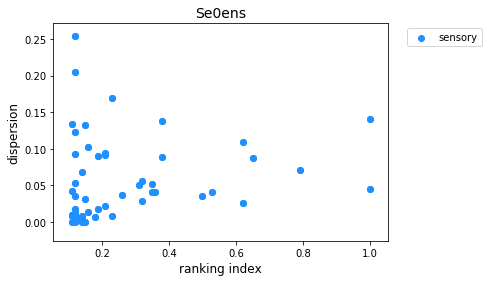

In [318]:
d_csvs = [csv_dipc,csv_ddms,csv_ddh,csv_dse0p,csv_dse0e]
site2 = []
newd2 = {}
for df in d_csvs:
    site2.append(rank_spear(df,False)[0])
    newd2.update(rank_spear(df,False)[1])


disp_all = pd.DataFrame(site2,index = ['IPC','DMS','DH44','Se0ph','Se0ens'],columns = ['sens_r','p_s','inter_r','p_i'])
disp_all.to_csv(r'/home/ben/all-csvs/new-csvs/corr-dispersion.csv',float_format='%.4f')

In [280]:
def color(val):
    if val!=0:
        if newd2[val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
    

disp_all.style.applymap(color)

In [225]:
rank_spear(csv_dipc,False)

[[-0.0884, -0.3425], {-0.3425: True, -0.0884: False}]

In [274]:
rank_spear(csv_nse0e,False)

Spearmans correlation coefficient: 0.148
Samples are uncorrelated (fail to reject H0) p=0.291


Dispersion

In [277]:
rank_spear(csv_dipc,False,False)

Spearmans correlation coefficient: -0.343
Samples are correlated (reject H0) p=0.044


In [279]:
rank_spear(csv_ddms,False,False)

Spearmans correlation coefficient: -0.217
Samples are uncorrelated (fail to reject H0) p=0.436


In [281]:
rank_spear(csv_ddh,False,False)

Spearmans correlation coefficient: -0.089
Samples are uncorrelated (fail to reject H0) p=0.725


In [283]:
rank_spear(csv_dse0p,False,False)

Spearmans correlation coefficient: -0.017
Samples are uncorrelated (fail to reject H0) p=0.941


In [285]:
rank_spear(csv_dse0e,False,False)

Spearmans correlation coefficient: 0.148
Samples are uncorrelated (fail to reject H0) p=0.291


In [243]:
list(set([n for n in csv_ddms.rank_s]))

[0.29, 0.71, 0.43, 0.57, 0.86, 1.0, 0.67, 0.78, 0.33, 0.44]

Pearson correlation for INDIVIDUAL target neurons

x and y looks Gaussian (fail to reject H0)
NE VAZI
x and y dont look Gaussian (reject H0)
VAZI
x and y looks Gaussian (fail to reject H0)
NE VAZI
x and y looks Gaussian (fail to reject H0)
NE VAZI
x and y looks Gaussian (fail to reject H0)
NE VAZI
x and y dont look Gaussian (reject H0)
VAZI
x and y looks Gaussian (fail to reject H0)
NE VAZI


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.6/dist-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.6/dist-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning:

invalid value encountered in double_scalars



x and y looks Gaussian (fail to reject H0)
NE VAZI


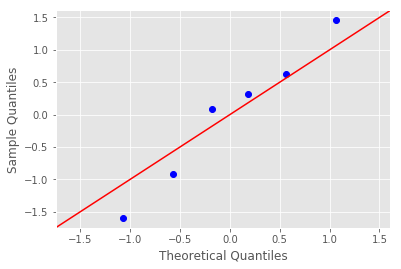

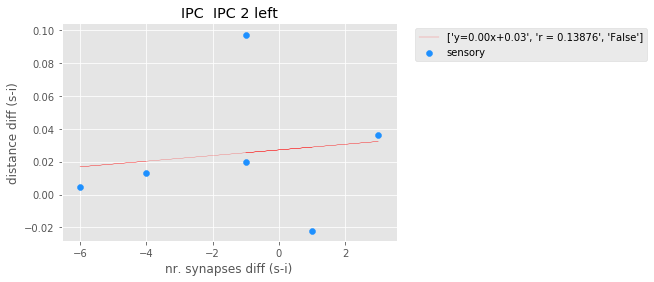

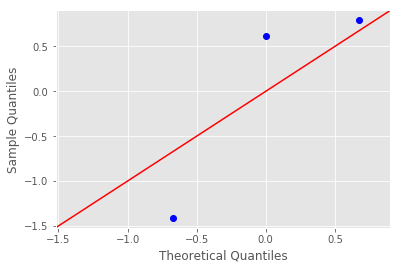

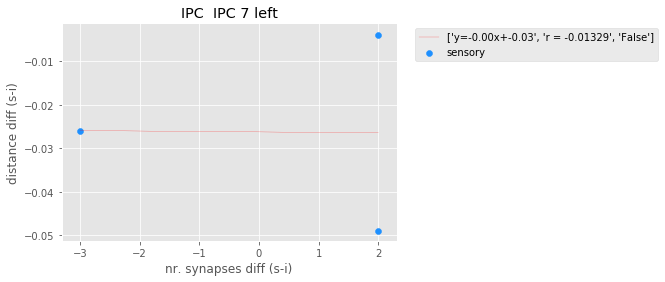

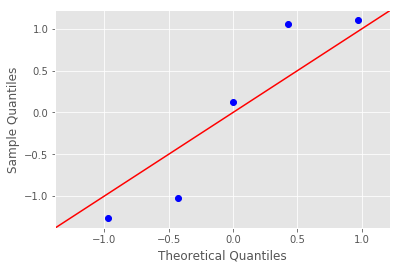

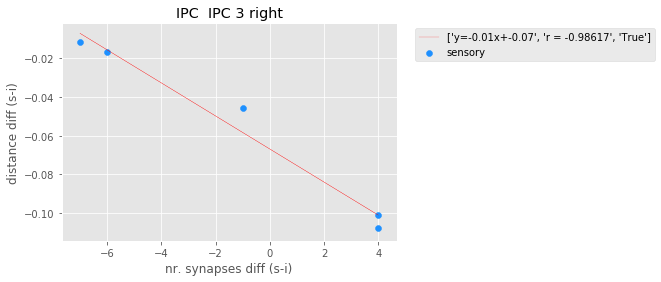

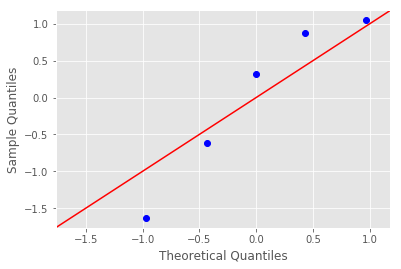

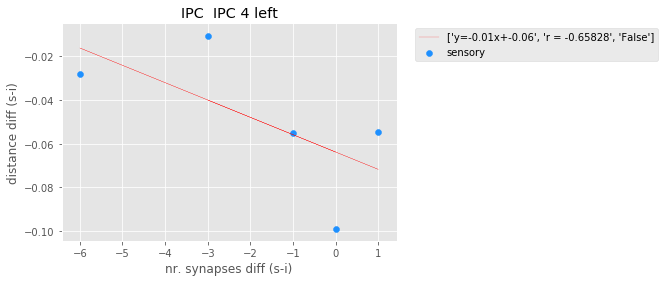

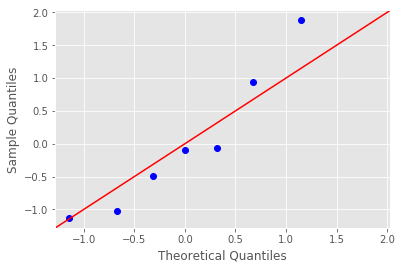

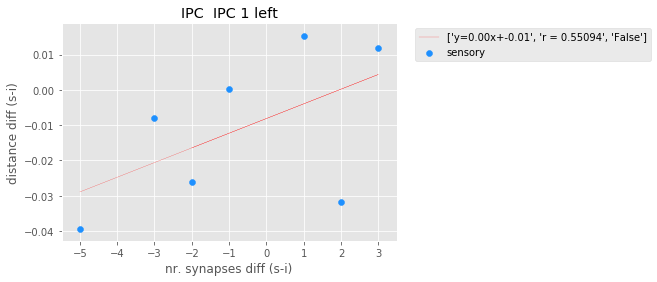

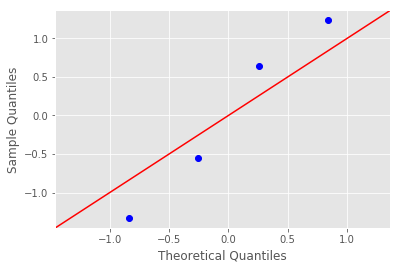

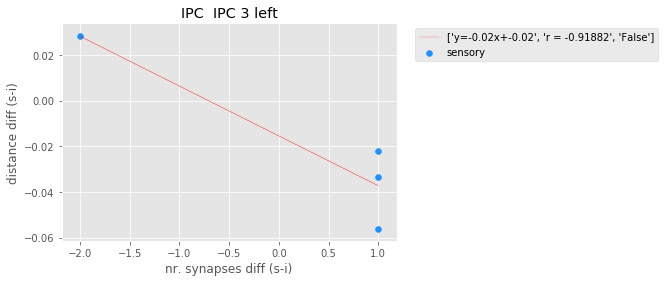

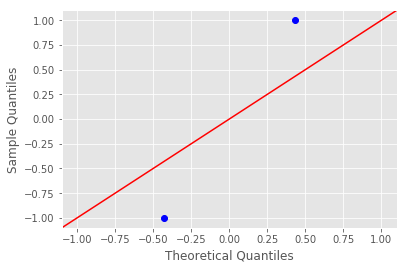

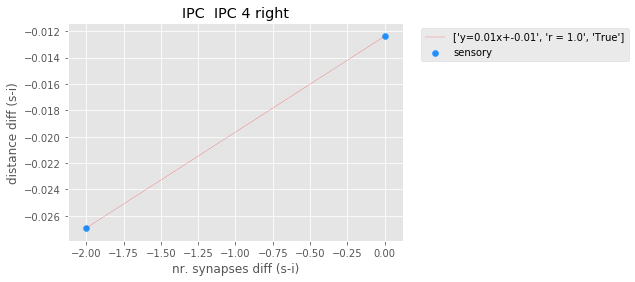

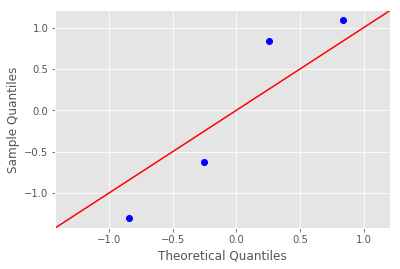

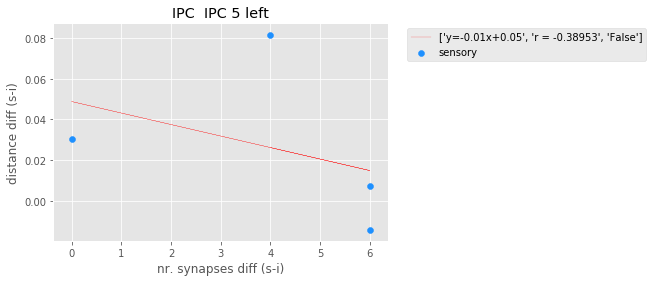

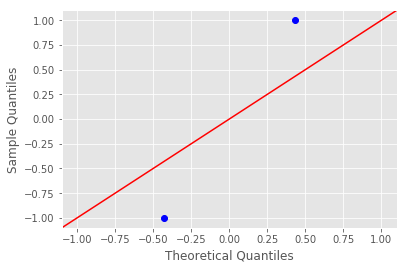

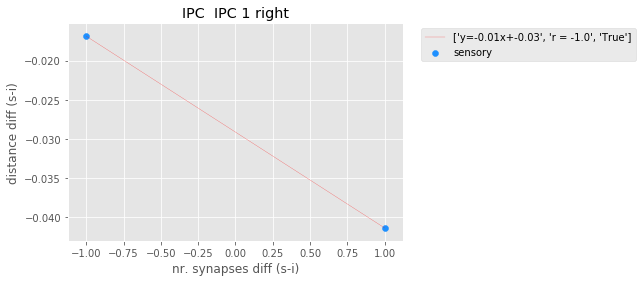

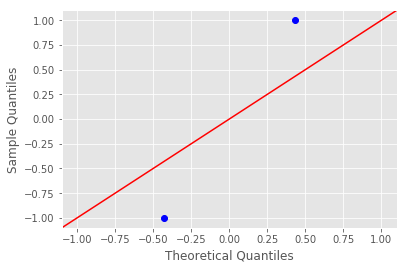

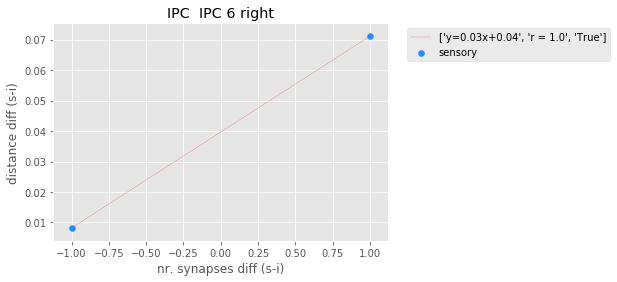

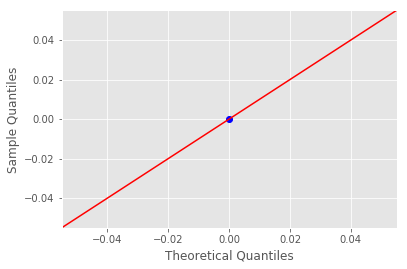

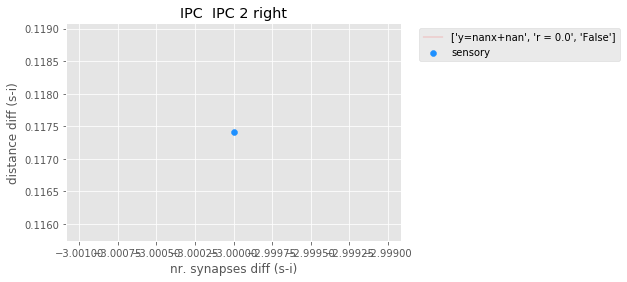

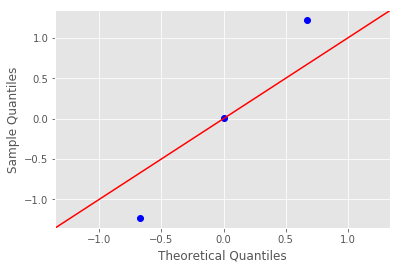

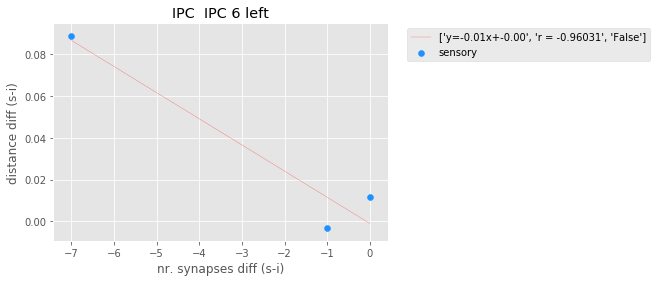

In [185]:
for n in ipcs[0]:
    syn_cluster_plot(csv_nipc,n,'',True)

x and y looks Gaussian (fail to reject H0)
NE VAZI


/usr/local/lib/python3.6/dist-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.6/dist-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning:

invalid value encountered in double_scalars



x and y looks Gaussian (fail to reject H0)
NE VAZI
x and y looks Gaussian (fail to reject H0)
NE VAZI


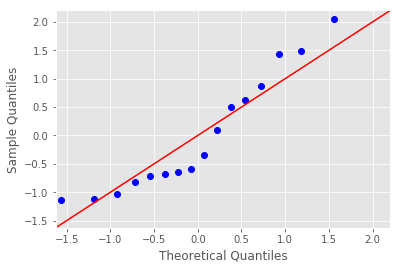

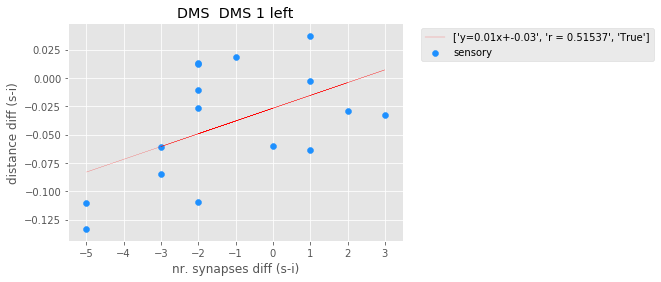

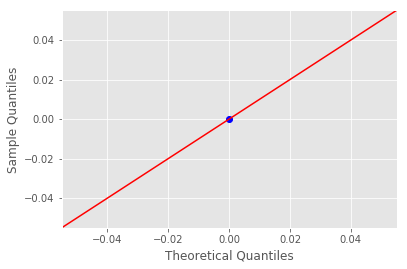

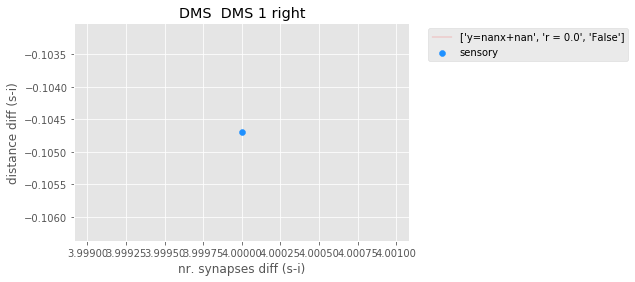

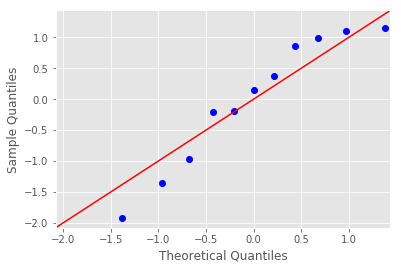

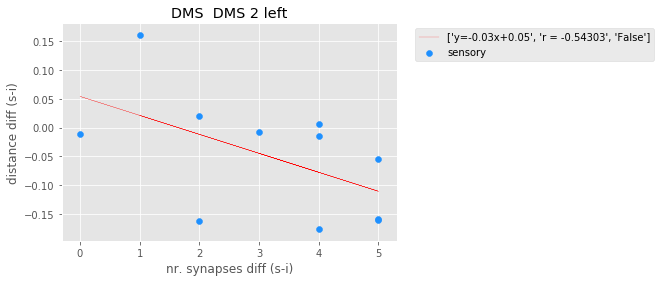

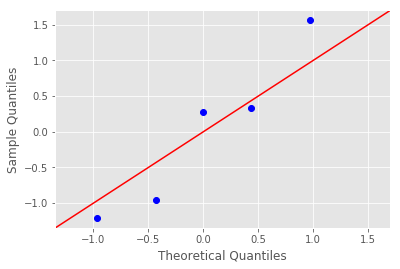

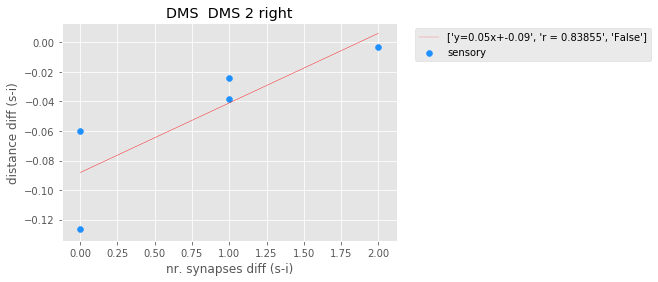

In [184]:
for n in dmss[0]:
    syn_cluster_plot(csv_ndms,n,'',True)

x and y dont look Gaussian (reject H0)
VAZI
x and y looks Gaussian (fail to reject H0)
NE VAZI
x and y looks Gaussian (fail to reject H0)
NE VAZI
x and y dont look Gaussian (reject H0)
VAZI


/usr/local/lib/python3.6/dist-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.6/dist-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning:

invalid value encountered in double_scalars



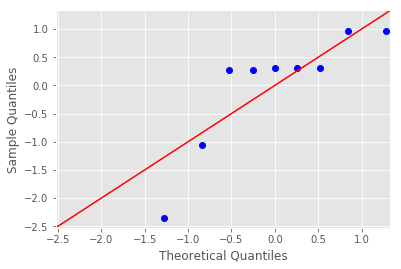

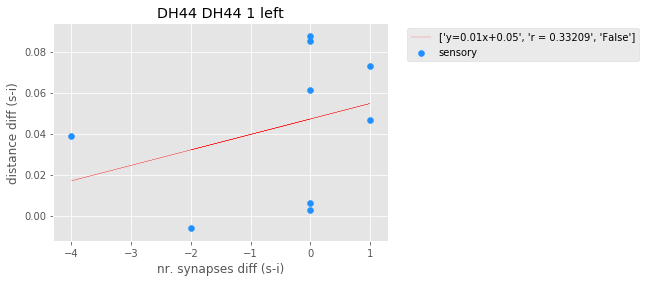

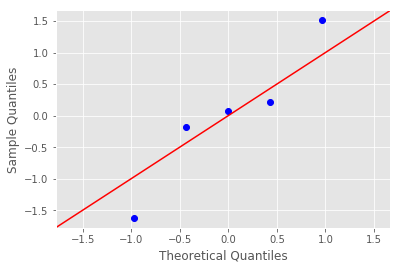

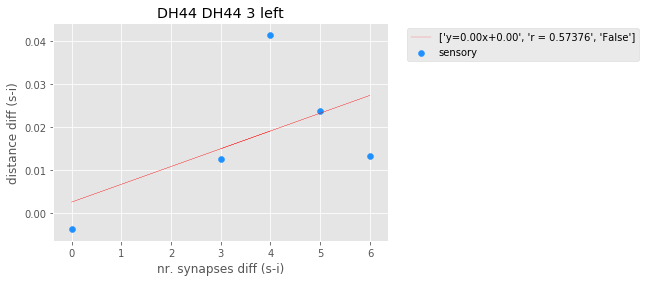

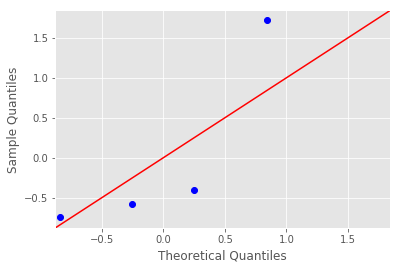

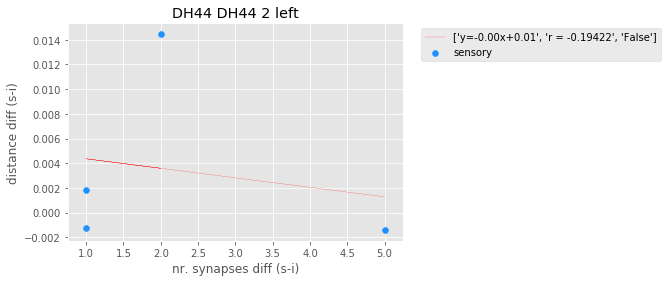

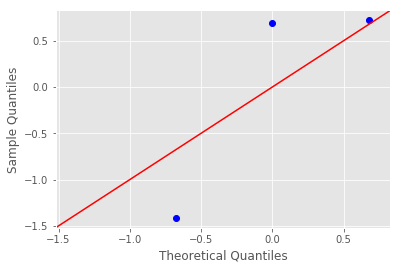

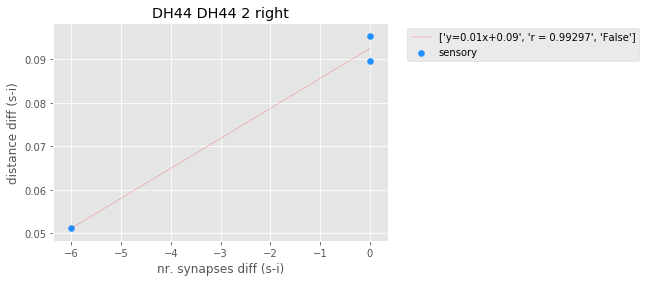

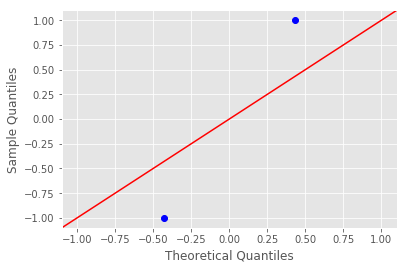

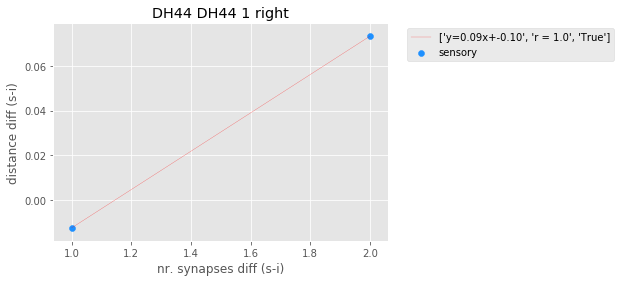

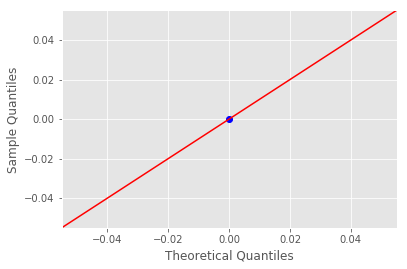

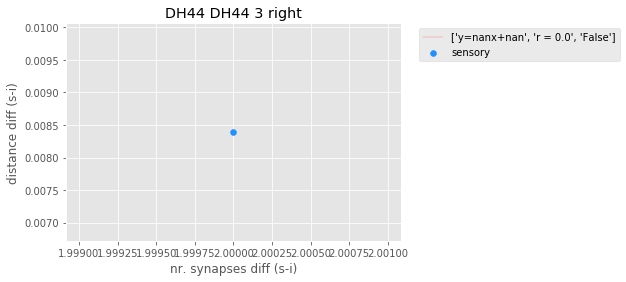

In [187]:
for n in dhs[0]:
    syn_cluster_plot(csv_ndh,n,'',True)

x and y dont look Gaussian (reject H0)
NE VAZI
x and y looks Gaussian (fail to reject H0)
NE VAZI


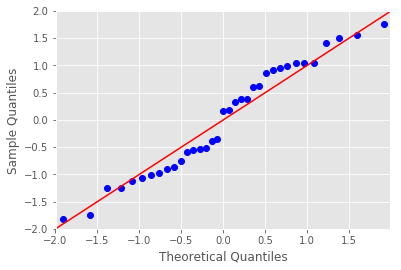

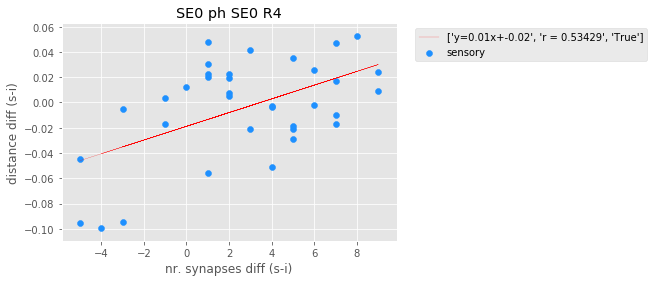

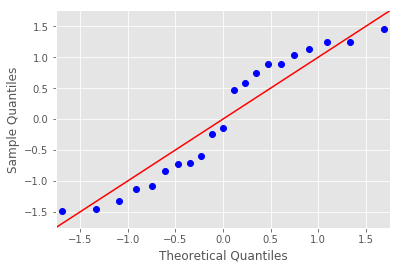

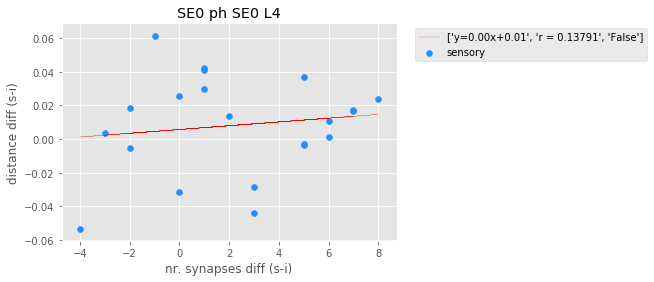

In [188]:
for n in se0ps[0]:
    syn_cluster_plot(csv_nse0p,n,'',True)

x and y dont look Gaussian (reject H0)
NE VAZI
x and y looks Gaussian (fail to reject H0)
NE VAZI
x and y dont look Gaussian (reject H0)
NE VAZI
x and y dont look Gaussian (reject H0)
NE VAZI
x and y looks Gaussian (fail to reject H0)
NE VAZI
x and y dont look Gaussian (reject H0)
NE VAZI


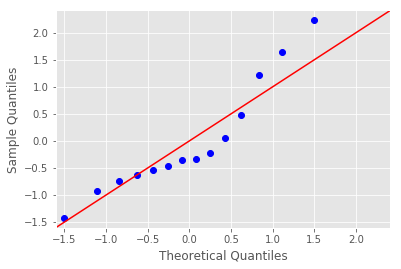

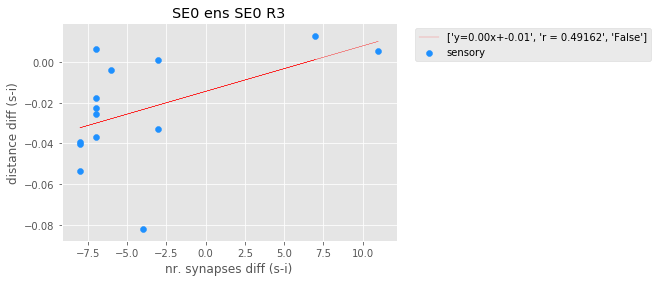

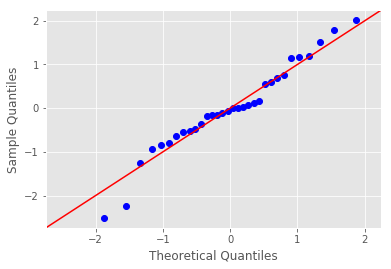

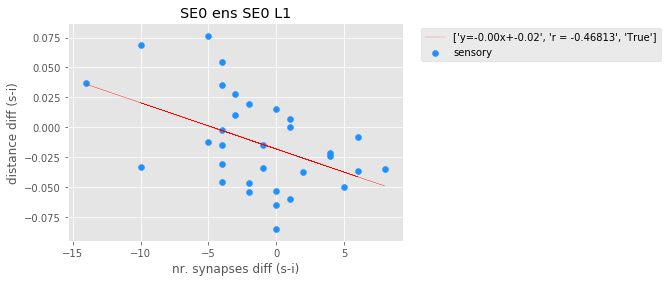

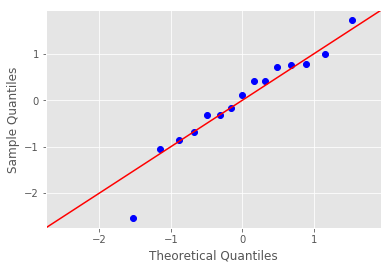

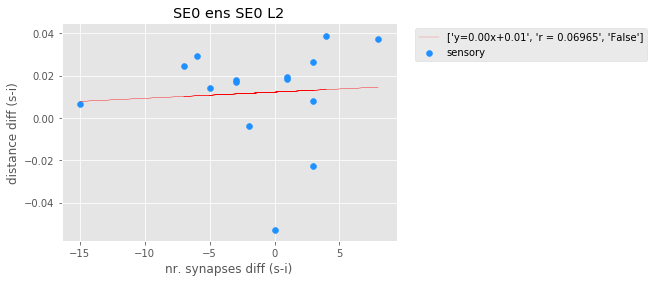

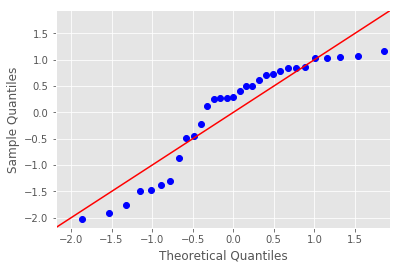

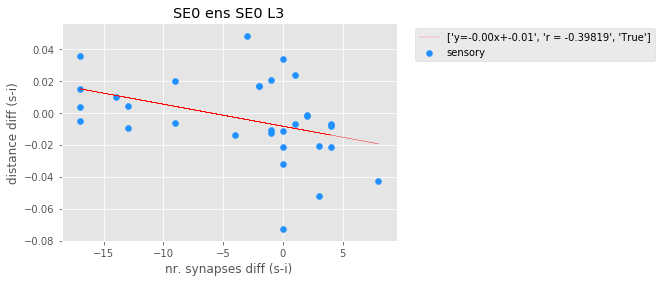

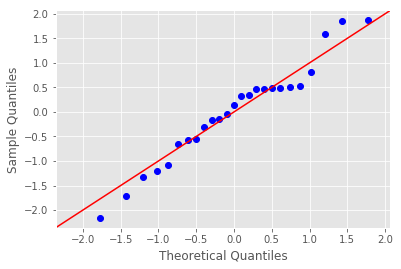

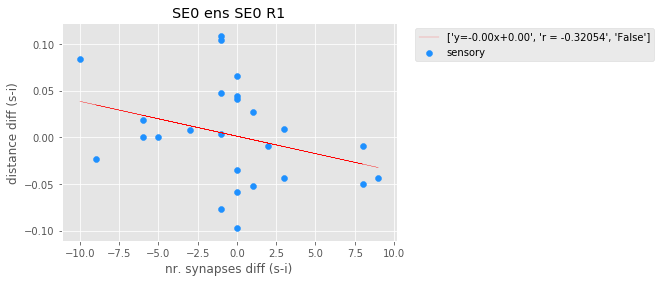

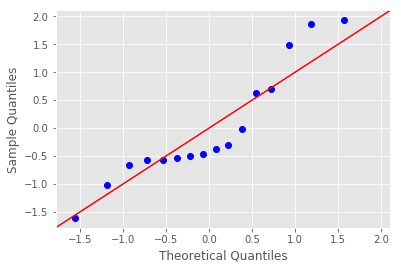

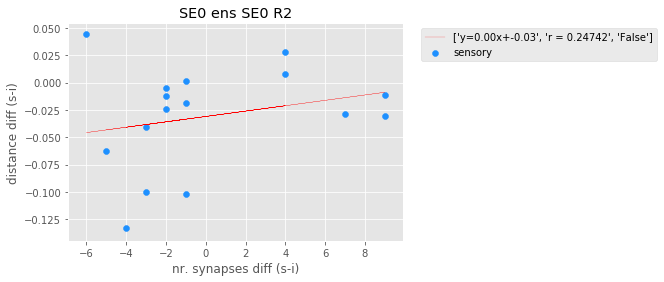

In [189]:
for n in se0enss[0]:
    syn_cluster_plot(csv_nse0e,n,'',True)

This function zips the average distance and dispersion and plots them as a 2d point where the x axis is the distance and the y axis the dispersion. The second argument specifies a target name or side (e.g. 'left/right' for mNSCs or 'L/R' for se0s). The third argument specifies whether to plot the sensory (True-default) or the interneuron (False) values. The points are colored based on which neuron they belong to, such that points with the same color mean values for the same neuron (but of course to different targets). The purpose of this function was basically to see how the distribution of this 2 dimensional distance/dispersion property is, and also to see how similar or dissimilar the same sensory/interneuron behave across target neurons.

In [117]:
def cluster_plot(df,tar,sorn = True):
    df.reset_index(drop=True)
    dh_df = df.loc[df['target'].str.contains(tar)]
#     dh_df = df.copy()
    dh_df.reset_index()
    sens = list(set(dh_df.source.values.tolist()))
#     print(sens)

#     print(newl)
#     newnewl = list(set(newl))
#     print(len(newnewl))
    if sorn == True:
#         l = [v[:-4] for v in dh_df.source.values.tolist()]
#         newl = list(set([val[:-1]+val[-1:].replace(' ','') for val in l]))
        vals = [list(n) for n in zip(list(set(dh_df['avg_dist_source'].values.tolist())),
                               list(set(dh_df['avg_disp_source'].values.tolist())))]
        
#     print ([v for v in zip(vals,sens)])
    else:
#         l = [v[:-4] for v in dh_df.interneuron.values.tolist()]
#         newl = list(set([val[:-1]+val[-1:].replace(' ','') for val in l]))
        vals = [list(n) for n in zip(list(set(dh_df['avg_dist_inter'].values.tolist())),
                               list(set(dh_df['avg_disp_inter'].values.tolist())))]
        
    newl = list(set(dh_df.target.values.tolist()))
    print(len(vals))
#     for s in newl:
#         if dh_df['source'].loc[dh_df['avg_dist_source']==val[0]].str.contains()
#     print(dh_df['source'].iloc[ind])
#     print(dh_df['source'].iloc[43])
#     print(dh_df)
    for v in vals:
        if sorn ==True:
            ind = df.index[df['avg_dist_source']==v[0]].tolist()[0]
            name = df['source'].iloc[ind]
#             nname = name[0:19]
        else:
            ind = df.index[df['avg_dist_inter']==v[0]].tolist()[0]
#             name = df['interneuron'].iloc[ind]
#             l = name[:-4]
#             nname = l[:-1]+l[-1:].replace(' ','')
#             print(nname)
        nname = df['target'].iloc[ind]
        if 'right' in nname or 'R' in nname:
            boja = 'orangered'
        else:
            boja = 'mediumblue'
#         plt.scatter(v[0],v[1],color = mycols[newl.index(nname)])
        if 'R-Sens-B1-AVa-27' in name:
            print(ind)
            plt.scatter(v[0],v[1],color = 'limegreen')
        else:
            plt.scatter(v[0],v[1],color = boja)

        
    plt.xlabel('distance')
    plt.ylabel('dispersion')
    return plt

In [111]:
m_se0ens = m_se0ens.drop(columns = ['all_disp_source','all_disp_inter','diff (sens-int)','all_dist_source','all_dist_inter','type'])

# Plotting

Next, the distribution of the distance values will be plotted using boxplots

In [298]:
colors.keys()

dict_keys(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'])

Plotting the TOTAL AVERAGE distance results for each target type, per sensory group (ACa, AVa etc.)

In [168]:
import scipy.stats as ss
import seaborn as sns
from collections import OrderedDict
cmaps = OrderedDict()
from matplotlib import colors as mcolors
import math
import itertools
from ast import literal_eval


# In boi2 there are 34 colors
colors = dict(mcolors.TABLEAU_COLORS)
mycols = ['darkorange','limegreen','gold','darkorchid','indigo','orangered','tomato','springgreen',
              'hotpink','darkturquoise','crimson','firebrick','deepskyblue','maroon','darkolivegreen','silver',
             'aqua','orchid','royalblue','darkred','thistle','mediumvioletred','chocolate','violet','darksalmon']
boi2 = [p for p in list(colors.keys()) if 'blue' not in p] +mycols
sencols1 = ['tab:blue','tab:red','tab:pink','tab:orange']
sencols2 = sencols1[0:3]+['tab:brown','tab:purple','tab:cyan']+[sencols1[3]]

def total_avg_boxplot(tripdf,senlist):  
    
    dh_df = tripdf.copy()
    a = dh_df.avg_dist_inter.values.tolist()
    # We need to make a new list consisting of nonrepeating values; this is done for the inters names and distances

    # Taking out the nr. of connectors; this is needed for the same neuron to have the same color everywhere
#     new2_is = list(set([n[:-4] for n in new_is]))
    interlist = list(set(a))    
    dflist = []
    
    for s in senlist:
        dh_df1 = dh_df.loc[dh_df['type'] == s]
        if dh_df.empty==False:  
            
#             dh_df1.all_dist_source = dh_df1.all_dist_source.apply(literal_eval)
            sn = dh_df1.avg_dist_source.values.tolist()
            slist = list(set(sn))
            dflist.append(slist)

        else:
            print(tr+' has no sensory input of the type '+stype)
    
    
#     newl = list(itertools.chain.from_iterable(dflist))+interlist
#     anewl = [n for n in dflist,interlist]
#     print(len(anewl))
#     print(interlist)
    newl = dflist +[interlist]
   
    df_a = pd.DataFrame(newl,index = senlist+['Interneuron'])
#     print(df_a)
    if 'AN AVp' in senlist:
        ax = sns.boxplot(data = df_a.transpose(),orient='h',palette = sencols2)
    else:
        ax = sns.boxplot(data = df_a.transpose(),orient='h',palette = sencols1)
  

    first = dh_df.target.values.tolist()[0]
    ax.set_xlabel('distance', fontsize=14)
    if 'SE' not in first:
        name = first[:3]
        ax.set_title(first[:4])
    else:
        if '4' in first:
            name = 'SE0-ph'
            ax.set_title(name)
        else:
            name = 'SE0-ens'
            ax.set_title(name)
        
    plt.savefig('new-total-avg-'+name+'.png',bbox_inches='tight',dpi=1000)
senlist1 =['ACa12', 'ACa','AVa']
senlist2 = ['ACa12', 'ACa', 'AVa', 'AN AVp', 'MN B2', 'MN B3']

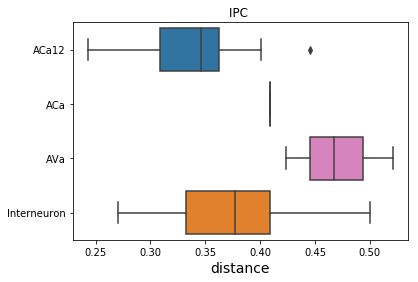

In [169]:
total_avg_boxplot(ipctrip1,senlist1)

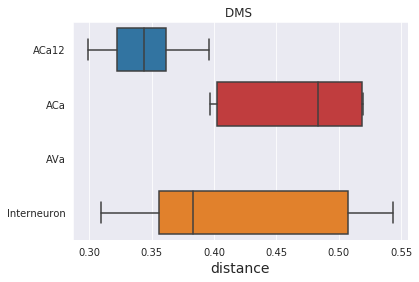

In [335]:
total_avg_boxplot(dmstrip1,senlist1)

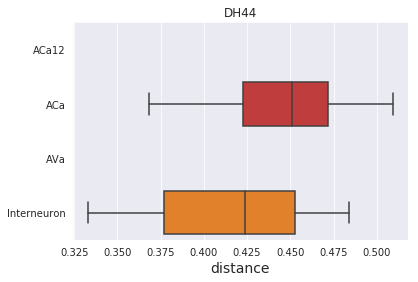

In [336]:
total_avg_boxplot(dhtrip1,senlist1)

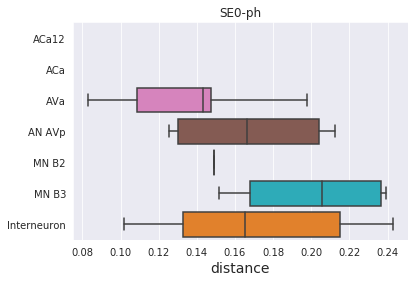

In [337]:
total_avg_boxplot(se0ptrip1,senlist2)

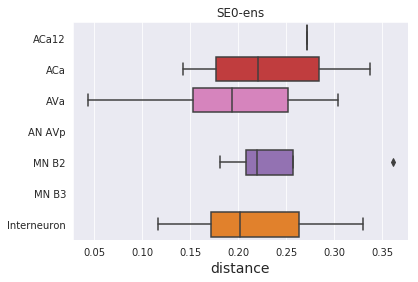

In [338]:
total_avg_boxplot(se0enstrip1,senlist2)

Similar function to plot the distance distribution when values from ALL connectors are used and not only the average distance per neuron

In [105]:
import scipy.stats as ss
import seaborn as sns
from collections import OrderedDict
cmaps = OrderedDict()
from matplotlib import colors as mcolors
import math
import itertools
from ast import literal_eval


# In boi2 there are 34 colors
colors = dict(mcolors.TABLEAU_COLORS)
mycols = ['darkorange','limegreen','gold','darkorchid','indigo','orangered','tomato','springgreen',
              'hotpink','darkturquoise','crimson','firebrick','deepskyblue','maroon','darkolivegreen','silver',
             'aqua','orchid','royalblue','darkred','thistle','mediumvioletred','chocolate','violet','darksalmon']
boi2 = [p for p in list(colors.keys()) if 'blue' not in p] +mycols


def total_boxplot(tripdf,senlist):  
    
    dh_df = tripdf.copy()
    # The literal_eval is needed to convert the cells with the distance lists into actual lists (from str)
    dh_df.all_dist_inter = dh_df.all_dist_inter.apply(literal_eval)
    a = dh_df.all_dist_inter.values.tolist()
    # We need to make a new list consisting of nonrepeating values; this is done for the inters names and distances
    new_a= list(set(tuple(i) for i in a))
    new_is = list(set(tripdf['interneuron'].values.tolist()))
    # Taking out the nr. of connectors; this is needed for the same neuron to have the same color everywhere
    new2_is = list(set([n[:-4] for n in new_is]))
    col_dict = dict(zip(new2_is, boi2))
    interlist = list(itertools.chain.from_iterable(new_a))    
    dflist = []
    for s in senlist:
        dh_df1 = dh_df.loc[dh_df['type']==s]
        if dh_df.empty==False:  
            
            dh_df1.all_dist_source = dh_df1.all_dist_source.apply(literal_eval)
            sn = dh_df1.all_dist_source.values.tolist()
            new_s = list(set(tuple(i) for i in sn))
            slist = list(itertools.chain.from_iterable(new_s))
            dflist.append(slist)

        else:
            print(tr+' has no sensory input of the type '+stype)
    
    
#     newl = list(itertools.chain.from_iterable(dflist))+interlist
#     anewl = [n for n in dflist,interlist]
#     print(len(anewl))
#     print(interlist)
    newl = dflist +[interlist]
   
    df_a = pd.DataFrame(newl,index = senlist+['Interneuron'])
#     print(df_a)
    if 'AN AVp' in senlist:
        ax = sns.boxplot(data = df_a.transpose(),orient='h',palette = sencols2)
    else:
        ax = sns.boxplot(data = df_a.transpose(),orient='h',palette = sencols1)


    first = dh_df.target.values.tolist()[0]
    ax.set_xlabel('distance', fontsize=14)
    if 'SE' not in first:
        name = first[:3]
        ax.set_title(first[:4])
    else:
        if '4' in first:
            name = 'SE0-ph'
            ax.set_title(name)
        else:
            name = 'SE0-ens'
            ax.set_title(name)
        
    plt.savefig('new-total-'+name+'.png',bbox_inches='tight',dpi=1000)
    
senlist1 =['ACa12', 'ACa','AVa']
senlist2 = ['ACa12', 'ACa', 'AVa', 'AN AVp', 'MN B2', 'MN B3']


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



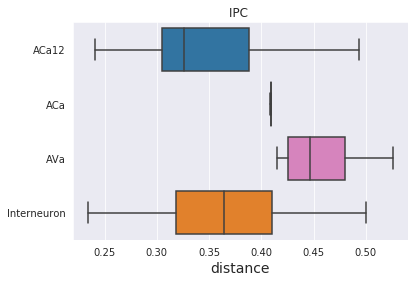

In [340]:
total_boxplot(ipctrip1,senlist1)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



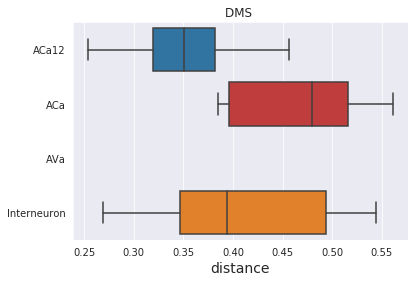

In [341]:
total_boxplot(dmstrip1,senlist1)

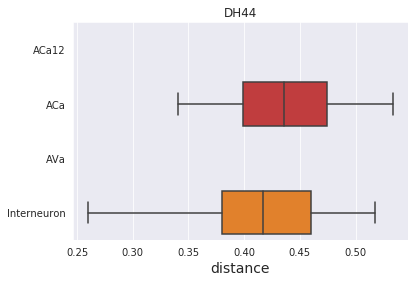

In [342]:
total_boxplot(dhtrip1,senlist1)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



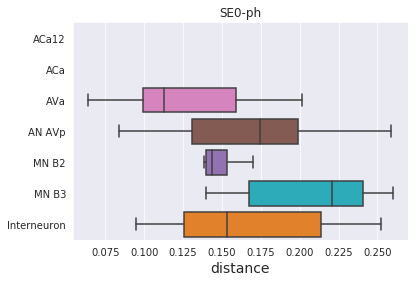

In [343]:
total_boxplot(se0ptrip1,senlist2)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



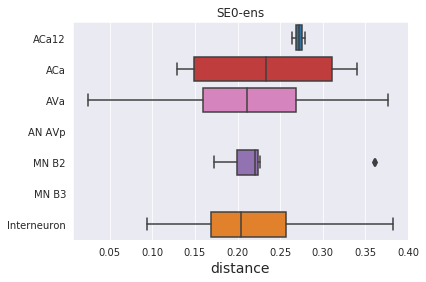

In [344]:
total_boxplot(se0enstrip1,senlist2)

The distributions were also drawn for INDIVIDUAL target neurons

The next function is used to get a boxplot with all the values for interneurons and a sensory group of a specific type to a desired output neuron. The input is a dataframe of the type df_type(newcsv_x), a sensory type and a target neuron. 

In [177]:
import scipy.stats as ss
import seaborn as sns
from collections import OrderedDict
cmaps = OrderedDict()
from matplotlib import colors as mcolors
import math
import itertools
from ast import literal_eval

# In boi2 there are 34 colors
colors = dict(mcolors.TABLEAU_COLORS)
mycols = ['darkorange','limegreen','gold','darkorchid','indigo','orangered','tomato','springgreen',
              'hotpink','darkturquoise','crimson','firebrick','deepskyblue','maroon','darkolivegreen','silver',
             'aqua','orchid','royalblue','darkred','thistle','mediumvioletred','chocolate','violet','darksalmon']
boi2 = [p for p in list(colors.keys()) if 'blue' not in p] +mycols


def avg_trip_boxplot(tripdf,stype,tr):  
    ax=None
    dh_df= tripdf.loc[tripdf['type']==stype].loc[tripdf['target']==tr]
    if dh_df.empty==False:
        
        # The literal_eval is needed to convert the cells with the distance lists into actual lists (from str)
        dh_df.all_dist_inter = dh_df.all_dist_inter.apply(literal_eval)
        a = dh_df.all_dist_inter.values.tolist()
        # We need to make an new list consisting of nonrepeating values; this is done for the inters names and distances
        new_a= list(set(tuple(i) for i in a))
        interlist = list(itertools.chain.from_iterable(new_a))    
        new_is = list(set(tripdf['interneuron'].values.tolist()))
        # Taking out the nr. of connectors; this is needed for the same neuron to have the same color everywhere
        new2_is = list(set([n[:-4] for n in new_is]))
        col_dict = dict(zip(new2_is, boi2))
        

        dh_df.all_dist_source = dh_df.all_dist_source.apply(literal_eval)
        s = dh_df.all_dist_source.values.tolist()
        new_s = list(set(tuple(i) for i in s))
        slist = list(itertools.chain.from_iterable(new_s))
        print(len([slist,interlist]))
        df_a=pd.DataFrame([slist,interlist], index = [stype,'Interneuron'])
        print(df_a)
        ax = sns.boxplot(data=df_a.transpose(),orient='h')

        if 'DMS' in tr or 'IPC' in tr or 'DH' in tr:
            ax.set(xlim=(0.25, 0.55))
        else:
            ax.set(xlim=(0.05,0.35))

        ax.set_xlabel('distance', fontsize=14)
        ax.set_title(stype+' to '+tr)
        plt.savefig('new-avg-box-triples-'+stype+'-'+tr+'.png',bbox_inches='tight',dpi=1000)
    else:
        print(tr+' has no sensory input of the type '+stype)

senlist1 =['ACa12', 'ACa','AVa']
senlist2 = ['ACa12', 'ACa', 'AVa', 'AN AVp', 'MN B2', 'MN B3']

# for d in dmss[0]:
#     for el in senlist1[1:]:
#         plt.figure()
#         avg_trip_boxplot(dmstrip1,el,d)

In [171]:
# se0enstrip1['type']

DH44 1 left has no sensory input of the type ACa12
2
                   0         1         2         3         4         5   \
ACa          0.485066  0.533206  0.477917  0.474796  0.530903  0.478113   
Interneuron  0.442030  0.454131  0.407335  0.462342  0.386710  0.460973   

                   6         7         8         9   ...        16        17  \
ACa          0.501834  0.473188  0.479473  0.435786  ...       NaN       NaN   
Interneuron  0.473995  0.477432  0.432127  0.378505  ...  0.374815  0.468317   

                   18        19        20        21        22        23  \
ACa               NaN       NaN       NaN       NaN       NaN       NaN   
Interneuron  0.473067  0.498343  0.430477  0.517839  0.418442  0.477044   

                   24        25  
ACa               NaN       NaN  
Interneuron  0.438795  0.460864  

[2 rows x 26 columns]
DH44 1 left has no sensory input of the type AVa
DH44 3 left has no sensory input of the type ACa12
2
                   0       

<Figure size 432x288 with 0 Axes>

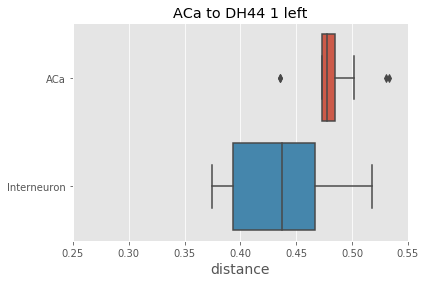

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

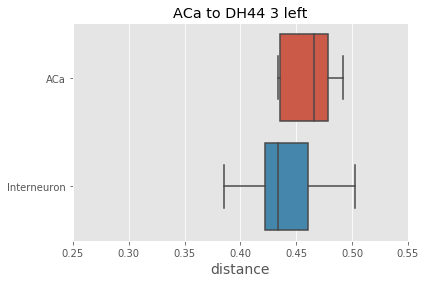

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

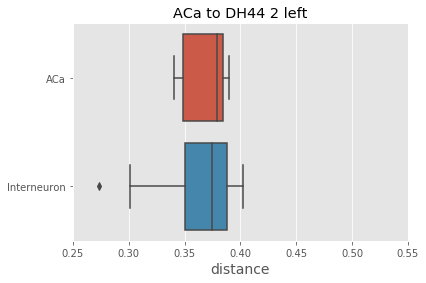

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

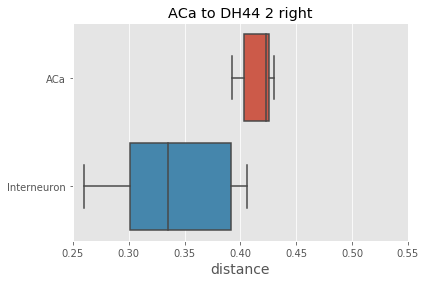

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

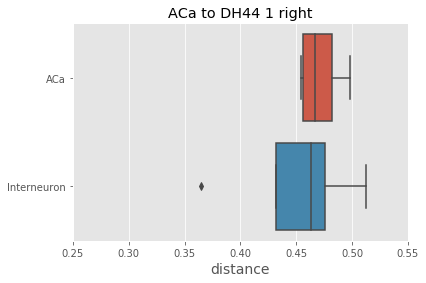

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

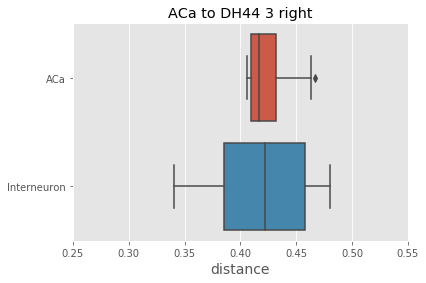

<Figure size 432x288 with 0 Axes>

In [225]:
for d in dhs[0]:
    for el in senlist1:
        plt.figure()
        avg_trip_boxplot(dhtrip1,el,d)

In [ ]:
for d in ipcs[0]:
    for el in senlist1:
        plt.figure()
        avg_trip_boxplot(ipctrip1,el,d)

2
                   0         1         2         3         4         5   \
AVa          0.201337  0.193984  0.158018  0.136705  0.154262  0.120021   
Interneuron  0.162940  0.167991  0.244442  0.246910  0.252028  0.252431   

                   6         7         8         9         10        11  \
AVa          0.104865  0.104475  0.105595  0.099032  0.168611  0.163470   
Interneuron  0.231207  0.233020  0.238135  0.205954  0.216818  0.220326   

                   12        13        14        15        16  
AVa          0.130330  0.129511  0.169778  0.161452  0.098382  
Interneuron  0.213726  0.204361  0.193110       NaN       NaN  
2
                   0         1        2         3         4         5   \
AN AVp       0.236267  0.209232  0.19301  0.174409  0.196477  0.215821   
Interneuron  0.209074  0.235645  0.16294  0.167991  0.221803  0.217892   

                   6         7         8         9   ...        19        20  \
AN AVp       0.211336  0.258410  0.218057  0.1980

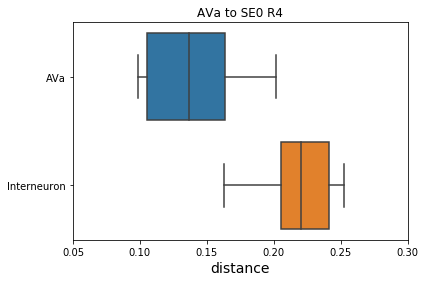

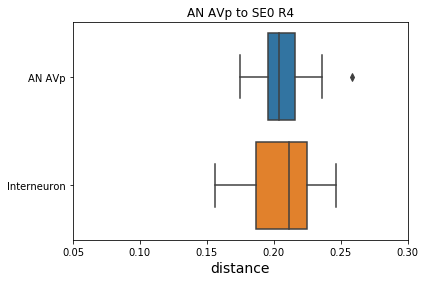

<Figure size 432x288 with 0 Axes>

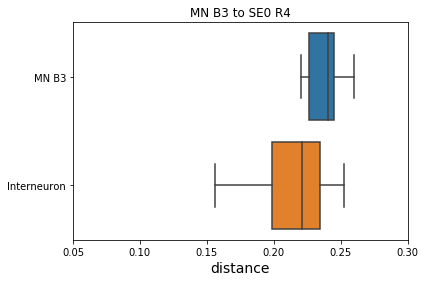

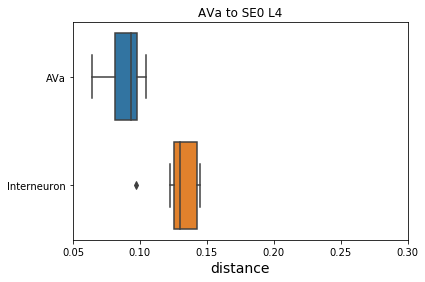

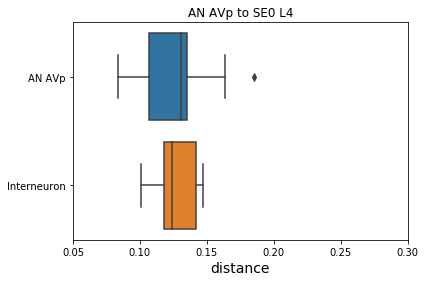

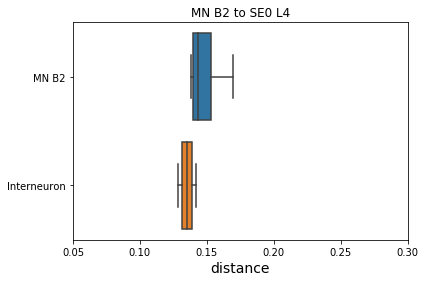

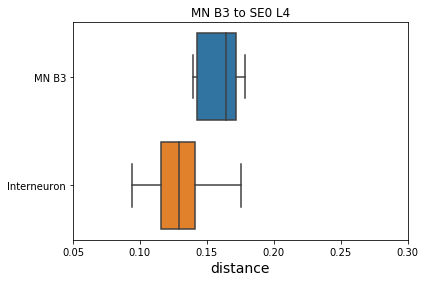

In [176]:
for d in se0ps[0]:
    for el in senlist2[2:]:
        plt.figure()
        avg_trip_boxplot(se0ptrip1,el,d)

SE0 R3 has no sensory input of the type ACa12
SE0 R3 has no sensory input of the type ACa
2
                   0         1         2         3         4         5   \
AVa          0.252005  0.312004  0.276084  0.270066  0.276407  0.269672   
Interneuron  0.260997  0.297043  0.286672  0.323854  0.284884  0.268204   

                   6         7         8         9   ...        33        34  \
AVa          0.256110  0.249139  0.231136  0.272277  ...  0.277665  0.285053   
Interneuron  0.320864  0.319352  0.270260  0.287908  ...       NaN       NaN   

                   35        36        37        38        39        40  \
AVa          0.310731  0.257005  0.283778  0.283395  0.295252  0.305833   
Interneuron       NaN       NaN       NaN       NaN       NaN       NaN   

                   41        42  
AVa          0.294218  0.276876  
Interneuron       NaN       NaN  

[2 rows x 43 columns]
SE0 R3 has no sensory input of the type AN AVp
SE0 R3 has no sensory input of the type MN 

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



2
                   0         1         2         3         4         5   \
AVa          0.139351  0.140067  0.165960  0.156687  0.143053  0.157320   
Interneuron  0.140402  0.093115  0.122156  0.126072  0.190690  0.183148   

                   6         7         8         9   ...        47        48  \
AVa          0.095358  0.171851  0.097919  0.157430  ...       NaN       NaN   
Interneuron  0.183930  0.180115  0.152198  0.158005  ...  0.156654  0.137759   

                   49       50        51        52       53        54  \
AVa               NaN      NaN       NaN       NaN      NaN       NaN   
Interneuron  0.216128  0.14513  0.221133  0.231489  0.23861  0.157571   

                   55        56  
AVa               NaN       NaN  
Interneuron  0.156146  0.158728  

[2 rows x 57 columns]
SE0 L3 has no sensory input of the type AN AVp
2
                   0         1         2         3         4         5   \
MN B2        0.194033  0.184313  0.172905  0.171874       NaN 

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

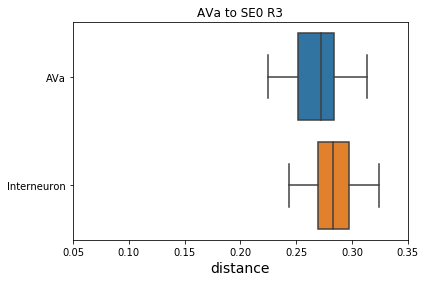

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

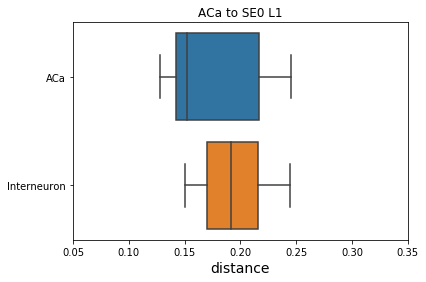

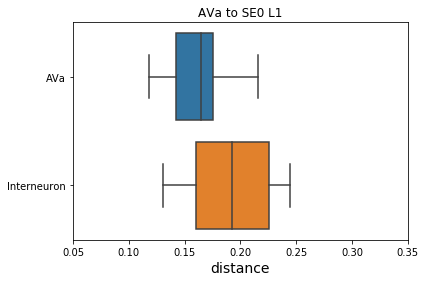

<Figure size 432x288 with 0 Axes>

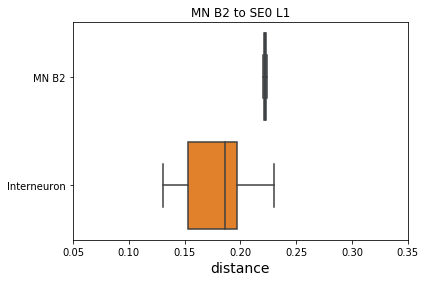

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

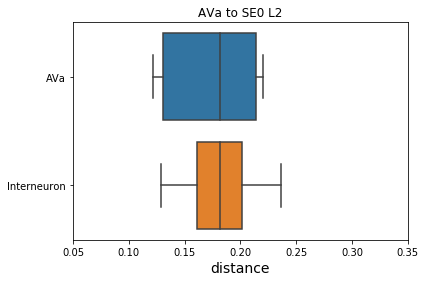

<Figure size 432x288 with 0 Axes>

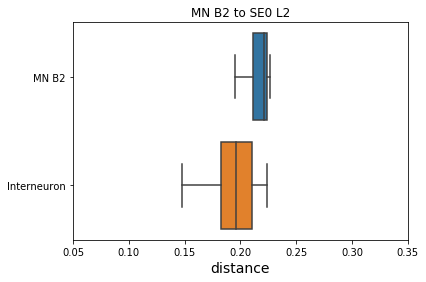

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

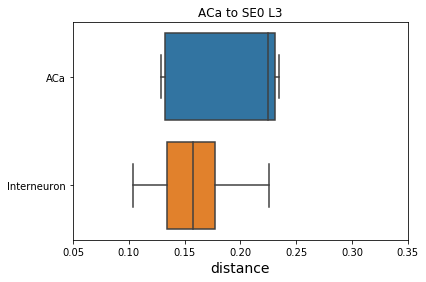

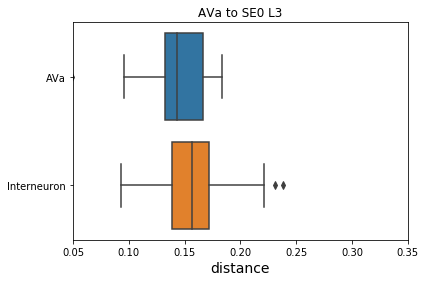

<Figure size 432x288 with 0 Axes>

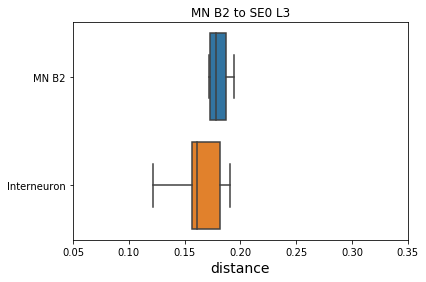

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

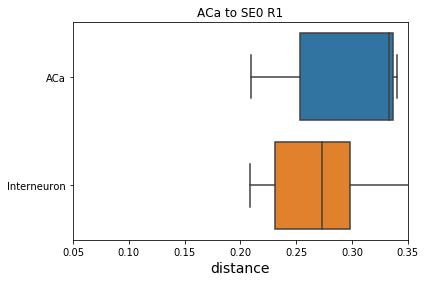

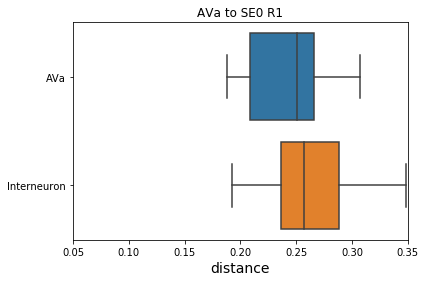

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

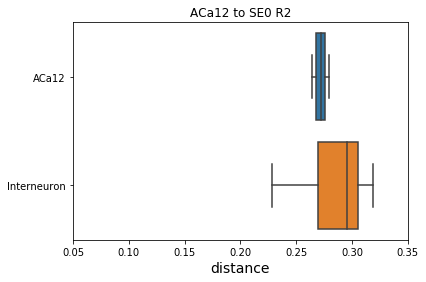

<Figure size 432x288 with 0 Axes>

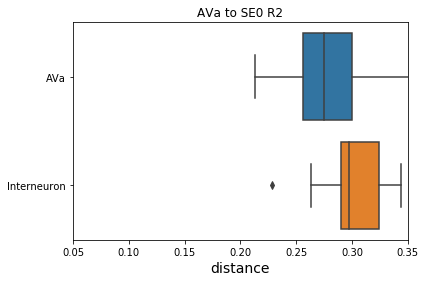

<Figure size 432x288 with 0 Axes>

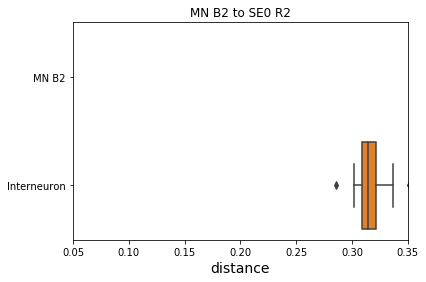

<Figure size 432x288 with 0 Axes>

In [178]:
for d in se0enss[0]:
    for el in senlist2:
        plt.figure()
        avg_trip_boxplot(se0enstrip1,el,d)

A function was also made to show the distance distribution for each sensory/target neuron, to a single target neuron:

trip_boxplot() is used to get a boxplot with the distance values of a specified sensory neuron and a single target neuron. The input is a dataframe of the type df_type(newcsv_x), a single sensory neuron name, and a single target neuron name. The output is a boxplot with the distance values for individual interneurons involved in a triple with the specified sensory to the specified target. The average value for the input neuron is given by a dashed blue line.

['DMS 1 left', 'DMS 1 right', 'DMS 2 left', 'DMS 2 right']
[['AN-L-Sens-B1-ACa-02', 'AN-L-Sens-B1-ACa-01', 'AN-L-Sens-B1-ACa-10', 'AN-R-Sens-B1-ACa-01', 'AN-L-Sens-B1-ACa-11', 'AN-R-Sens-B1-ACa-02'], ['AN-L-Sens-B1-ACa-02'], ['AN-L-Sens-B1-ACa-02', 'AN-L-Sens-B1-ACa-01', 'AN-L-Sens-B1-ACa-10', 'AN-R-Sens-B1-ACa-02'], ['AN-L-Sens-B1-ACa-02', 'AN-R-Sens-B1-ACa-09', 'AN-R-Sens-B1-ACa-08']]
                                                           0         1  \
Sweetness Right 130521_Cand1_OSN2_IN5 Bilateral     0.406284  0.404430   
SOG into brain contralaterally right - paired w...  0.269764  0.375326   
Pre PMN R right                                     0.371593  0.376727   
hugin-PC left 4                                     0.366366  0.343673   

                                                           2         3  \
Sweetness Right 130521_Cand1_OSN2_IN5 Bilateral     0.446919  0.445424   
SOG into brain contralaterally right - paired w...  0.331200  0.327349   
Pre PMN R right  

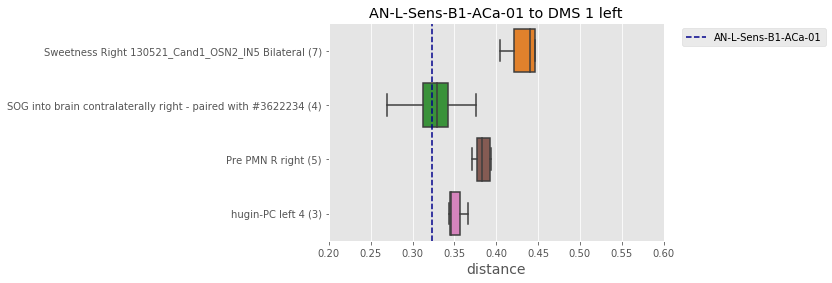

In [148]:
import scipy.stats as ss
import seaborn as sns
from collections import OrderedDict
cmaps = OrderedDict()
from matplotlib import colors as mcolors
import math
from ast import literal_eval

# In boi2 there are 34 colors
colors = dict(mcolors.TABLEAU_COLORS)
mycols = ['darkorange','limegreen','gold','darkorchid','indigo','orangered','tomato','springgreen',
              'hotpink','darkturquoise','crimson','firebrick','deepskyblue','maroon','darkolivegreen','silver',
             'aqua','orchid','royalblue','darkred','thistle','mediumvioletred','chocolate','violet','darksalmon']
boi2 = [p for p in list(colors.keys()) if 'blue' not in p] +mycols


def trip_boxplot(tripdf,sn,tr):  
    ax = None
    d_df= tripdf.loc[tripdf['source'].str.contains(sn)].loc[tripdf['target']==tr]
    d_df.all_dist_inter = d_df.all_dist_inter.apply(literal_eval)
    a = d_df.all_dist_inter.values.tolist()
    b = d_df['interneuron']
    new_bs = [v[:-4] for v in b.values.tolist()]

    new_i = list(set(tripdf['interneuron'].values.tolist()))
    # Taking out the nr. of connectors; this is needed for the same neuron to have the same color everywhere
    new2_i = list(set([n[:-4] for n in new_i]))
    col_dict = dict(zip(new2_i, boi2))
#         lista.append((a[k],b[k]))
    # s_dist = dh_df.all_dist_source.values.tolist()[0]
    # dh_df.all_dist_source = dh_df.all_dist_source.apply(literal_eval)

    df_a = pd.DataFrame(a, index = new_bs)
    print(df_a)
    ax = sns.boxplot(data=df_a.transpose(),orient='h',palette =col_dict)
    if 'DMS' in tr or 'IPC' in tr or 'DH' in tr:
        ax.set(xlim=(0.2, 0.6))
    else:
        ax.set(xlim=(0.05,0.4))
    ax.set_xlabel('distance', fontsize=14)
    sou = d_df.avg_dist_source.values.tolist()[0]

    # Adding the line representing the average number for the sensory
    ax.axvline(sou, color='darkblue',linestyle='--',label=sn)
    ax.legend()
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    ax.set_yticklabels(b)
    ax.set_title(sn+' to '+tr)
#     plt.savefig('real-triples-'+str(l2[i][j])+'-'+str(l1[i])+'.png',bbox_inches='tight',dpi=1000)
#     lt.clf()
#     plt.savefig('box-triples-'+sn+'-'+tr+'.png',bbox_inches='tight',dpi=1000)


l1 = dmss[0]
l2=[[el for el in dmss[1][i] if 'Sens' in el] for i in range(0,len(dmss[1]))]
print(l1)
print(l2)

trip_boxplot(dmstrip1,l2[0][1],l1[0])
# for i in range(0,len(dmss[0])):
# #     print(l2[i])
#     if len(l2[i])!=0:
#         for j in range(0,len(l2[i])):
# #             print((l2[i][j]),l1[i])
#             pass
# #             print('na')
#             plt.figure()
#             trip_boxplot(dmstrip1,l2[i][j],l1[i])
# # # print(l1)


# Frequency plots

Per target AVG frequency shade plots (it used to be with all and saved as sin-tar blabla but now I changed it)

In [176]:
import scipy.stats as ss
import seaborn as sns
from collections import OrderedDict
cmaps = OrderedDict()
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
boi = list(colors.keys())
boi2= [b for b in boi if 'orange' in b  or 'red' in b or 'blue' in b or 'green' in b if b!='aliceblue' and b!='darkblue' and b!='orangered' and b!='dodgerblue']
# print(boi2)

def tar_freq_plot(datf,s_type,tar):  
   
    ax=None
    count = 0

    dh_df = datf.loc[datf['target']==tar].loc[datf['type']==s_type]
    if dh_df.empty==False:
        # The literal_eval is needed to convert the cells with the distance lists into actual lists (from str)
#         dh_df.all_dist_inter = dh_df.all_dist_inter.apply(literal_eval)
#         a = dh_df.all_dist_inter.values.tolist()
#         # We need to make an new list consisting of nonrepeating values; this is done for the inters names and distances
#         new_a= list(set(tuple(i) for i in a))
#         interlist = list(itertools.chain.from_iterable(new_a))    
        interlist = list(set(dh_df.avg_dist_inter.values.tolist()))

        
#         dh_df.all_dist_source = dh_df.all_dist_source.apply(literal_eval)
#         s = dh_df.all_dist_source.values.tolist()
#         new_s = list(set(tuple(i) for i in s))
        
#         slist = list(itertools.chain.from_iterable(new_s))
        slist = list(set(dh_df.avg_dist_source.values.tolist()))
             
        ax = sns.distplot(slist,hist=False,kde=True,rug=False,kde_kws={"bw":0.02},
                              color = 'darkblue',label=s_type)
        sns.distplot(interlist,hist=False,kde=True,rug=False,kde_kws={"bw":0.02},
                              color = 'orangered',label='Interneuron')

   
    
#         sns.distplot(list12[0], hist=True,color = 'darkblue',kde_kws={"bw":0.02},label=cols[m],kde=True)
#         sns.distplot(list12[0], ax=ax, rug=False, kde=False, hist=True, norm_hist=False,color = 'darkblue', bins=10)
        
        l1 = ax.lines[0]
        l2 = ax.lines[1]

        # Get the xy data from the lines so that we can shade
        x1 = l1.get_xydata()[:,0]
        y1 = l1.get_xydata()[:,1]
        x2 = l2.get_xydata()[:,0]
        y2 = l2.get_xydata()[:,1]
        ax.fill_between(x1,y1, color="darkblue", alpha=0.3)
        ax.fill_between(x2,y2, color="orangered", alpha=0.3)
        
        ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
        ax.set_xlabel('distance', fontsize=14)
        ax.set_ylabel('frequency', fontsize=14)
        if 'DMS' in tar or 'IPC' in tar or 'DH' in tar:
            ax.set(xlim=(0.2, 0.6))
        else:
            ax.set(xlim=(0.05,0.4))
#     #     ax.set_title(cols[m])
        plt.title(tar)
        plt.savefig('avg-sin-tar-shade-'+tar+'-'+s_type+'.png',bbox_inches='tight',dpi=1000)


        return plt
    else:
        print('No input of this sensory type')
# #     plt.show(block=False)
    #     x = list12[0]
#     sns.kdeplot(x)
#     sns.kdeplot(x, bw=.1, label="bw: 0.2")
#     sns.kdeplot(x, bw=1, label="bw: 1")
#     plt.legend();
#     figure(num=None, figsize=(50, 46), dpi=80, facecolor='w', edgecolor='k')   


No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

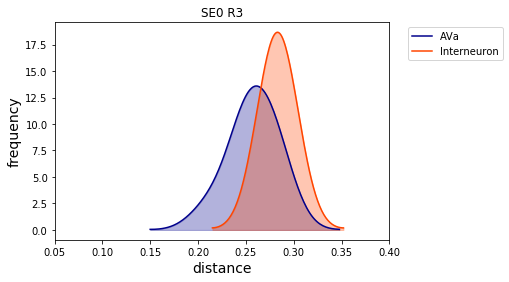

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

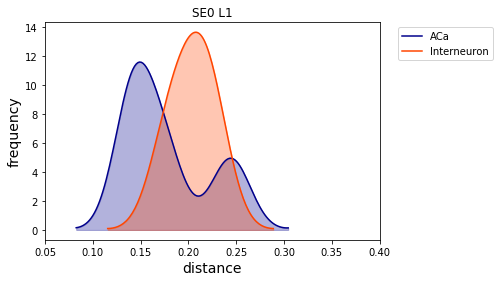

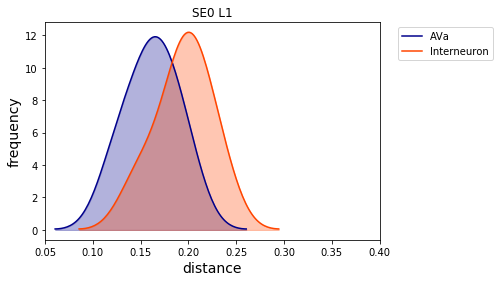

<Figure size 432x288 with 0 Axes>

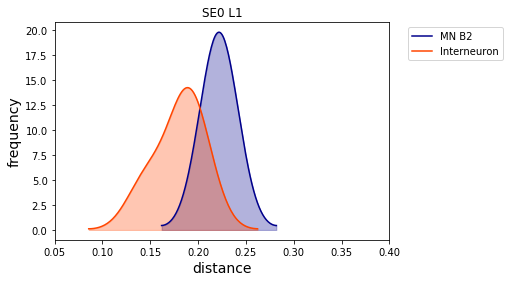

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

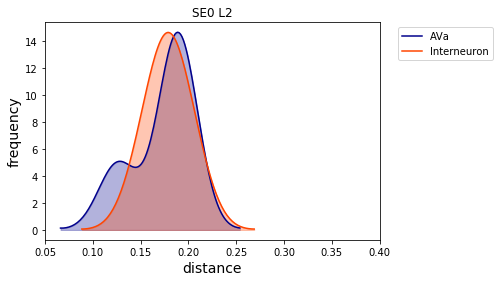

<Figure size 432x288 with 0 Axes>

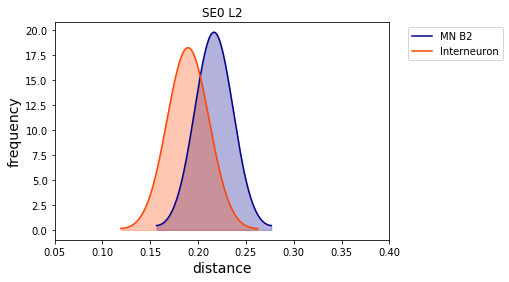

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

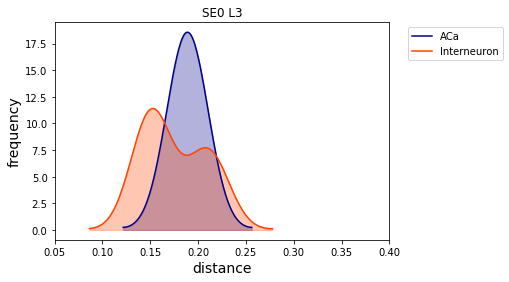

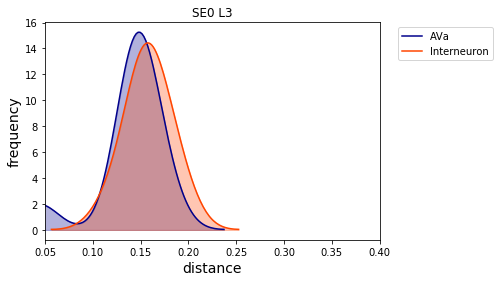

<Figure size 432x288 with 0 Axes>

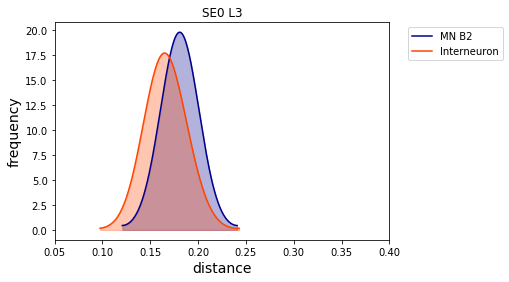

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

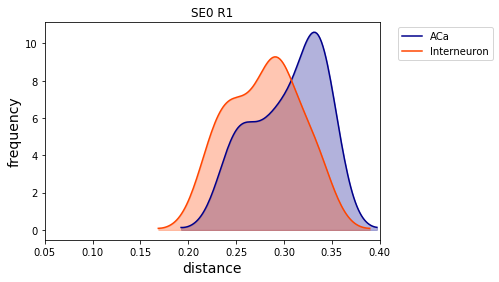

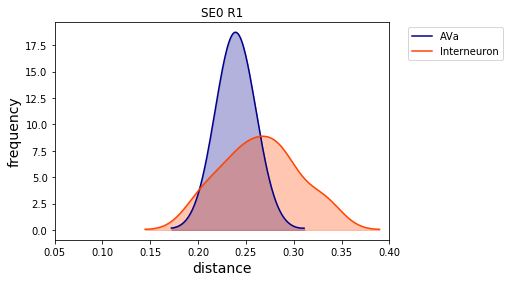

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

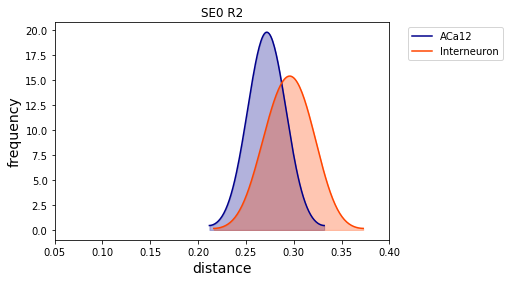

<Figure size 432x288 with 0 Axes>

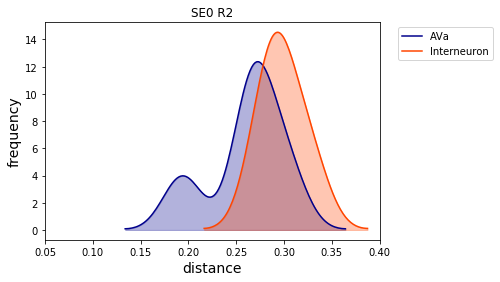

<Figure size 432x288 with 0 Axes>

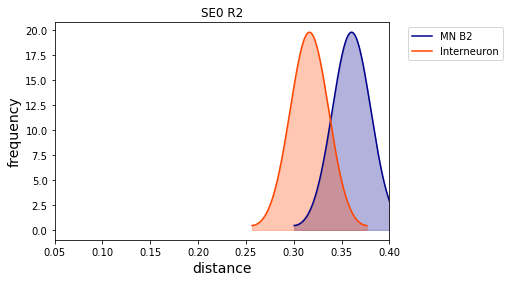

<Figure size 432x288 with 0 Axes>

In [177]:
for neur in se0enss[0]:
    for s in senlist2:
#         print (neur)
        plt.figure()

        tar_freq_plot(se0enstrip1,s,neur)


No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

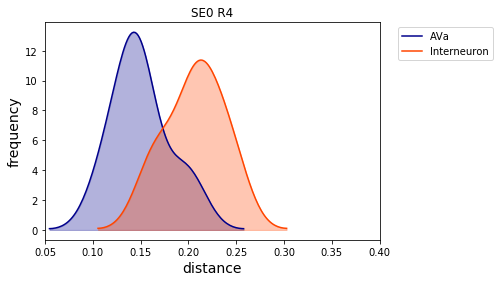

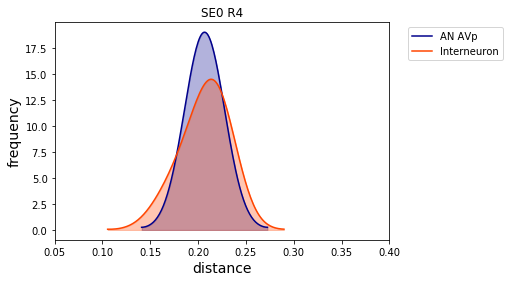

<Figure size 432x288 with 0 Axes>

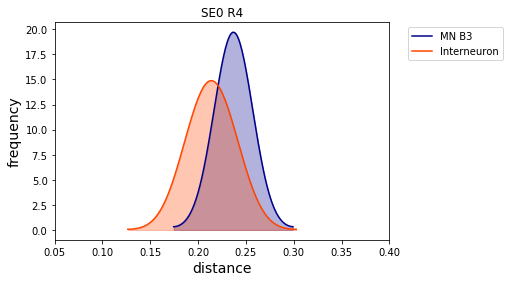

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

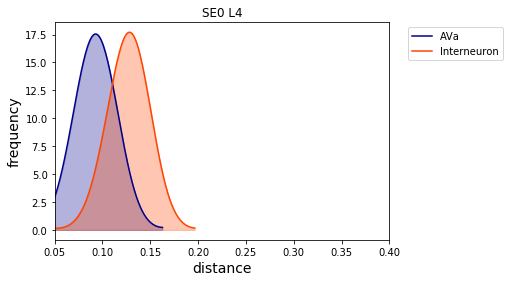

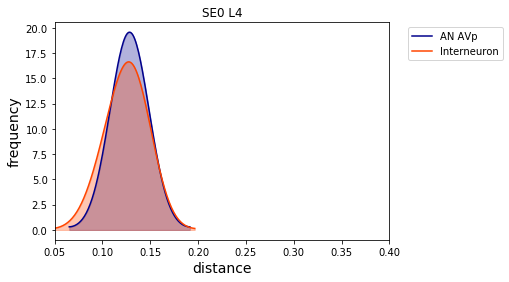

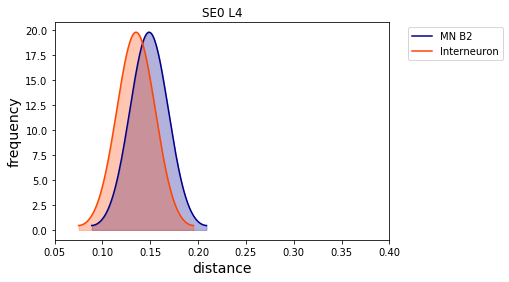

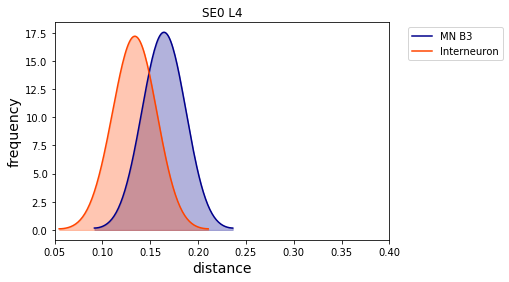

In [178]:
for neur in se0ps[0]:
    for s in senlist2:
#         print (neur)
        plt.figure()

        tar_freq_plot(se0ptrip1,s,neur)


No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type


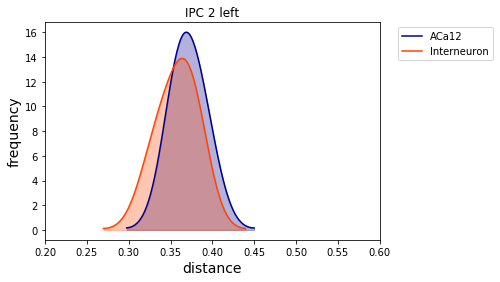

<Figure size 432x288 with 0 Axes>

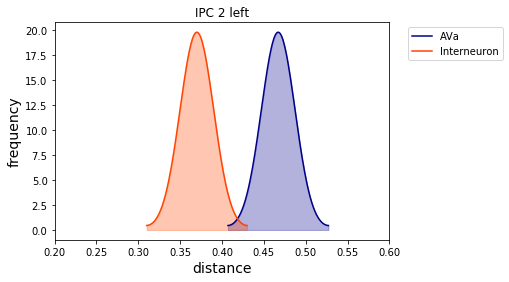

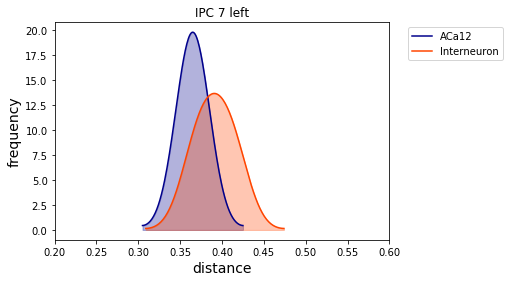

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

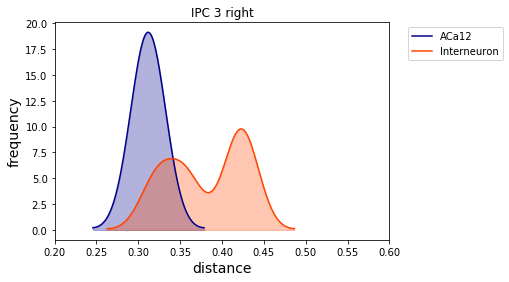

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

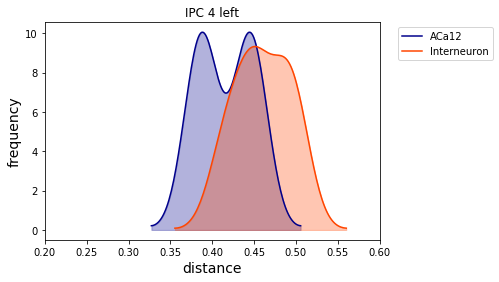

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

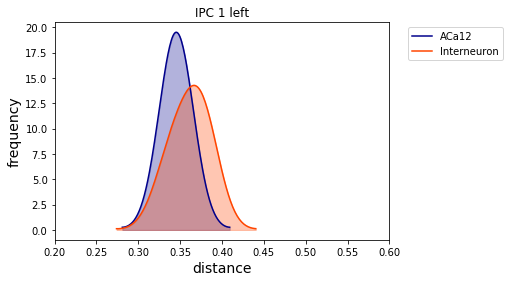

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

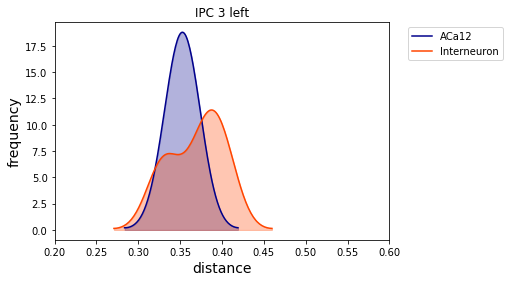

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

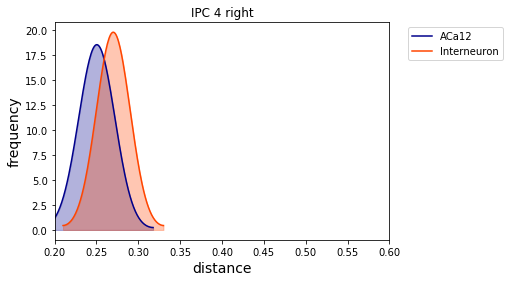

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

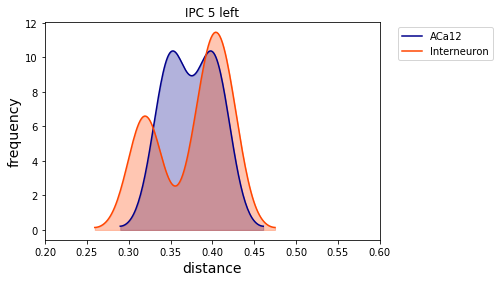

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

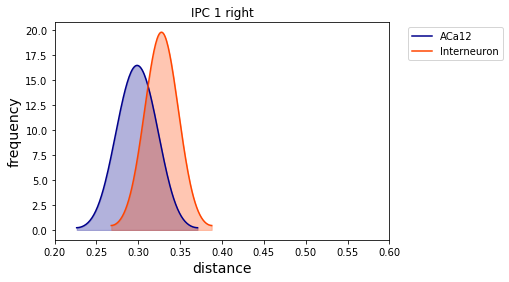

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

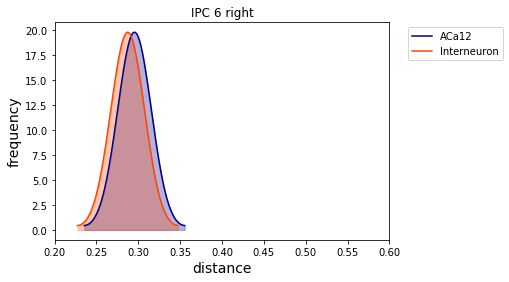

<Figure size 432x288 with 0 Axes>

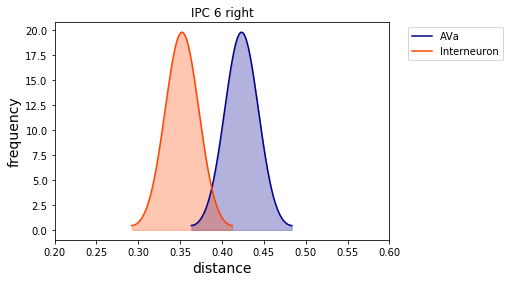

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

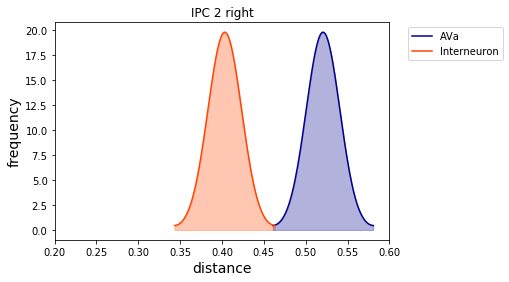

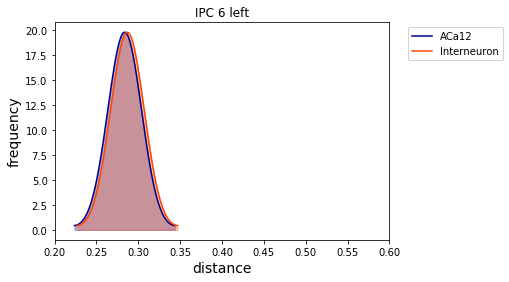

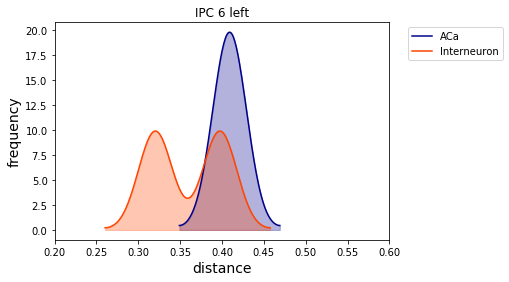

<Figure size 432x288 with 0 Axes>

In [179]:
for neur in ipcs[0]:
    for s in senlist1:
#         print (neur)
        plt.figure()

        tar_freq_plot(ipctrip1,s,neur)


No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type


<Figure size 432x288 with 0 Axes>

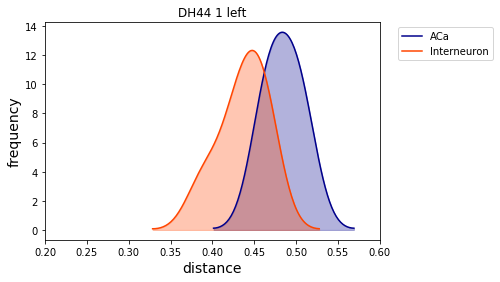

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

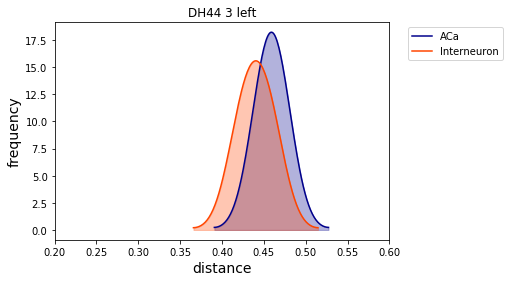

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

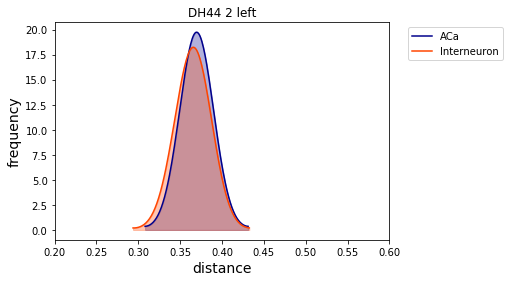

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

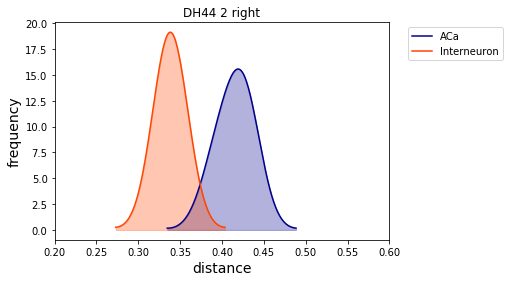

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

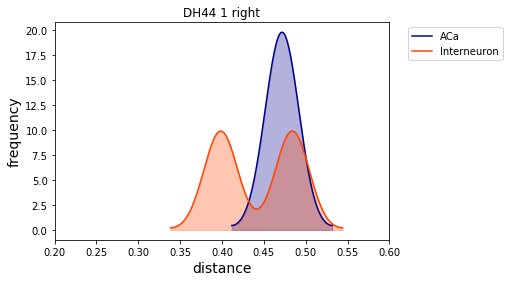

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

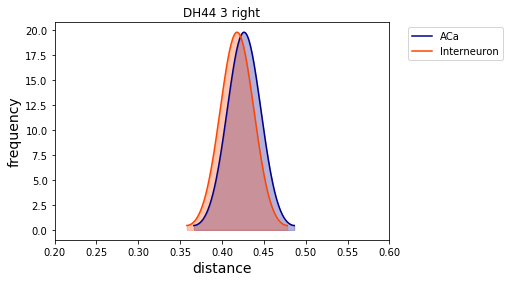

<Figure size 432x288 with 0 Axes>

In [180]:
for neur in dhs[0]:
    for s in senlist1:
#         print (neur)
        plt.figure()

        tar_freq_plot(dhtrip1,s,neur)

No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type


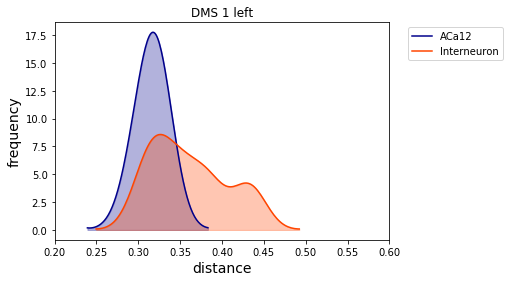

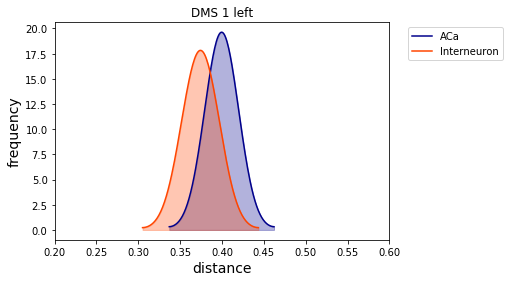

<Figure size 432x288 with 0 Axes>

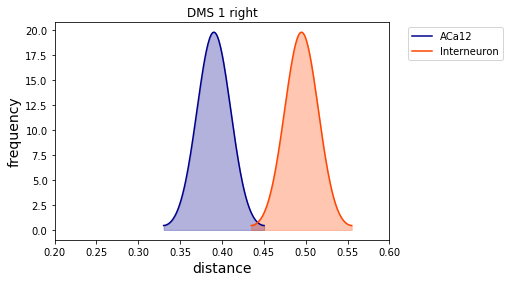

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

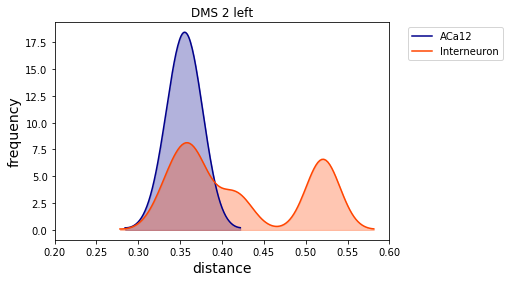

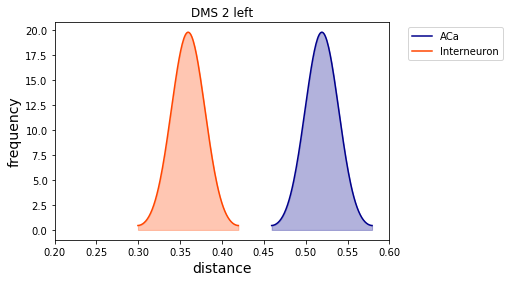

<Figure size 432x288 with 0 Axes>

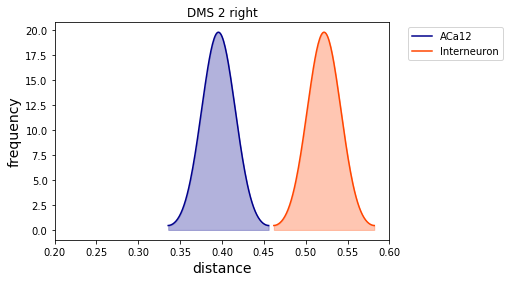

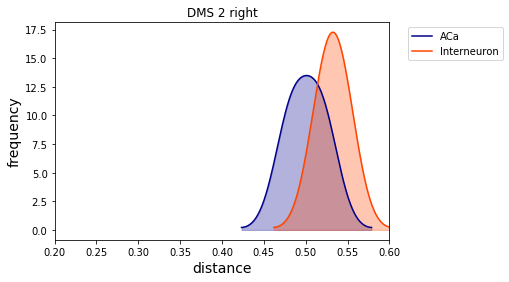

<Figure size 432x288 with 0 Axes>

In [181]:
for neur in dmss[0]:
    for s in senlist1:
#         print (neur)
        plt.figure()

        tar_freq_plot(dmstrip1,s,neur)

# Extra- things not included at all in the thesis

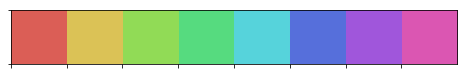

In [214]:
import scipy.stats as ss
import seaborn as sns
from collections import OrderedDict
cmaps = OrderedDict()
from matplotlib import colors as mcolors

from ast import literal_eval

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
boi = list(colors.keys())
current_palette = sns.color_palette('colorblind')

boi1= [b for b in boi if 'orange' in b  or 'red' in b or 'turq' in b or 'purple' in b or 'pink' in b or 'gold' in b or 'chocolate' in b or 'medium' in b and 'blue' not in b]
boip = [b for b in current_palette]
mycols2 = ['darkorange','limegreen','gold','darkorchid','indigo','orangered','tomato','springgreen',
              'hotpink','darkturquoise','crimson','firebrick','deepskyblue','maroon','darkolivegreen','silver',
             'aqua','orchid','royalblue','darkred','thistle','mediumvioletred','chocolate','violet','darksalmon','dimgray',
          'aquamarine','mediumaquamarine','mediumvioletred','wheat','lawngreen','steelblue','lightcoral','mediumseagreen',
          'rosybrown','']
boi2 = boi1+boip+mycols2
cpalette = sns.palplot(sns.color_palette("hls", 8))
# print(boi2)
# boi2 = [b for b in current_palette]
# kinds = ('cubic', 'quadratic', 'slinear', 'nearest', 'linear', 'zero', 4, 5)
# hsv = plt.get_cmap('hsv')
# boi2 = [b for b in hsv(np.linspace(0, 1.0, len(kinds)))]

def trip_freq_plot(tripdf,sn,tr,sorn = False,shad = False):  

    ax=None
    ints = tripdf['interneuron'].values.tolist()
    dh_df= tripdf.loc[tripdf['source'].str.contains(sn)].loc[tripdf['target']==tr]
    dh_df.all_dist_inter = dh_df.all_dist_inter.apply(literal_eval)
    a = dh_df.all_dist_inter.values.tolist()
    # a= [pd.Series(f) for f in dh_df['all_dist_inter'].values.tolist()]
    b= dh_df['interneuron'].values.tolist()
    new_bs = [v[:-4] for v in b]
    new_i = list(set(tripdf['interneuron'].values.tolist()))
    # Taking out the nr. of connectors; this is needed for the same neuron to have the same color everywhere
    new2_i = list(set([n[:-4] for n in new_i]))
    col_dict = dict(zip(new2_i, boi2))
    lista=[] #taa lista ima i elementi dek sho i[1] se conn. distances for the interneurons and i[0] are the inter names
    for i in range(0,len(dh_df)):
        lista.append((a[i],b[i]))
    dh_df.all_dist_source = dh_df.all_dist_source.apply(literal_eval)

    s_dist = dh_df.all_dist_source.values.tolist()[0]
    sname = dh_df.source.values.tolist()[0]
#     r_rec= {k: rec[k] for k in rec.keys() if 'R ' in k and 'left' not in k or 'right' in k or 'Right' in k or 'r ' in k }
#     l_rec= {k: rec[k] for k in rec.keys() if 'L' in k and 'right' not in k or 'left' in k or 'Left' in k or 'l ' in k}

#     r_rec = dict(key for key in c[1].keys() if 'R' in key]
#     l_rec = [key[] for key in c[1].keys() if 'L' in key]
#     print(len(lista[m]))
#     print(len(list12[0]))
    count = 0
    if shad ==False:
       
        if sorn==True:
             ax=sns.distplot(list12[1],color = 'orangered',kde_kws={"bw":0.02},label='Interneuron')
        else:
            pass

        ax = sns.distplot(s_dist,color = 'darkblue',label=sname,kde=True,kde_kws={"bw":0.02},norm_hist=False,
                              hist = False)
        l0 = ax.lines[0]
        # Get the xy data from the lines so that we can shade
        x0 = l0.get_xydata()[:,0]
        y0 = l0.get_xydata()[:,1]

        ax.fill_between(x0,y0, color = 'darkblue', alpha=0.3)
        for key in lista:
#             print(key[1])
            sns.distplot(key[0],color = col_dict[key[1][:-4]],label=key[1],kde=True,kde_kws={"bw":0.02},norm_hist=False,
                              hist = False)
#             sns.distplot(rec[key],ax=ax,hist=False,color = boi2[count],kde_kws={"bw":0.02},kde=True)
            l1 = ax.lines[count+1]
            # Get the xy data from the lines so that we can shade
            x1 = l1.get_xydata()[:,0]
            y1 = l1.get_xydata()[:,1]
        
            ax.fill_between(x1,y1, color = col_dict[key[1][:-4]], alpha=0.3)
            count+=1
            
#             color = boi2[ints.index(key[1])]
#        
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    ax.set_xlabel('distance', fontsize=14)
    ax.set_ylabel('frequency', fontsize=14)
    ax.set_title(sn+' to '+tr)
#     plt.savefig('real-triples-'+str(l2[i][j])+'-'+str(l1[i])+'.png',bbox_inches='tight',dpi=1000)
#     lt.clf()
    plt.savefig('newer-triples-'+sn+'-'+tr+'.png',bbox_inches='tight',dpi=1000)



In [215]:
b

84    SEZ-IN-07-right (2)
Name: interneuron, dtype: object

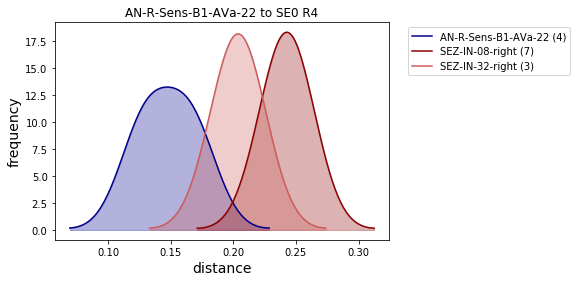

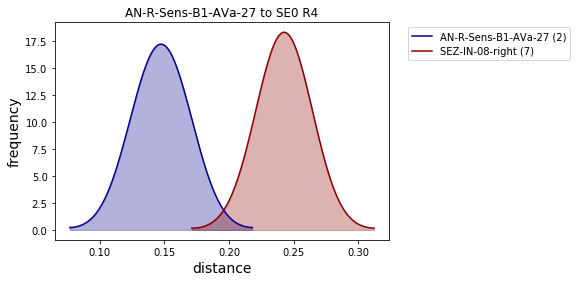

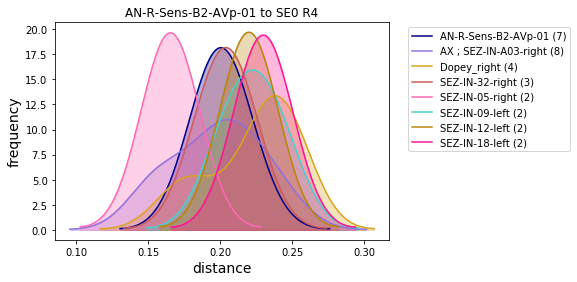

In [ ]:
lp3= se0ps[0]
lp4=[[el for el in se0ps[1][i] if 'Sens' in el] for i in range(0,len(se0ps[1]))]
for i in range(0,len(se0ps[0])):
    if len(lp4[i])!=0:
        for j in range(0,len(lp4[i])):
#             pass
            plt.figure()
            trip_freq_plot(se0ptrip1,lp4[i][j],lp3[i])

In [ ]:
l1 = dhs[0]
l2=[[el for el in dhs[1][i] if 'Sens' in el] for i in range(0,len(dhs[1]))]

for i in range(0,len(dhs[0])):
    if len(l2[i])!=0:
        for j in range(0,len(l2[i])):
            pass
#             print('na')
            plt.figure()
            trip_freq_plot(df_type(newcsv_dh),l2[i][j],l1[i])


In [ ]:
dmstrip1

In [ ]:
l3 = ipcs[0]
l4=[[el for el in ipcs[1][i] if 'Sens' in el] for i in range(0,len(ipcs[1]))]
for i in range(0,len(ipcs[0])):
    print(l4[i])
    if len(l4[i])!=0:
        for j in range(0,len(l4[i])):
            pass
#             print('na')
            plt.figure()
            trip_boxplot(ipctrip1,l4[i][j],l3[i])

In [ ]:
l5 = dhs[0]
l6=[[el for el in dhs[1][i] if 'Sens' in el] for i in range(0,len(dhs[1]))]
for i in range(0,len(dhs[0])):
    print(l6[i])
    if len(l6[i])!=0:
        for j in range(0,len(l6[i])):
            pass
#             print('na')
            plt.figure()
            trip_boxplot(dhtrip1,l6[i][j],l5[i])

In [ ]:
se0ps[0]

In [ ]:
# se0ptrip1

Clustering again

In [172]:
from matplotlib import colors as mcolors
from collections import OrderedDict
cmaps = OrderedDict()
colors = dict(mcolors.TABLEAU_COLORS)
more_colors = dict(mcolors.BASE_COLORS)
senlist1 =['ACa12', 'ACa','AVa']
senlist2 = ['ACa12', 'ACa', 'AVa', 'AN AVp', 'MN B2', 'MN B3']

In [173]:
colors.keys()

dict_keys(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'])

In [117]:
from numpy.polynomial.polynomial import polyfit
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import bartlett

mycols = ['darkorange','darkorchid','springgreen','red','blue','green','magenta'
          ,'chocolate','hotpink','darkturquoise','crimson','darkblue','thistle','mediumvioletred',
         'aqua','orchid','dimgray','royalblue','darkred','aquamarine','violet','darksalmon','orangered',
         'teal','palegreen','silver','purple','deepskyblue','darkolivegreen','darkgoldenrod','lightblue','lightpink']*2

# from mlxtend.plotting import plot_linear_regression
tp_cols = [n for n in list(colors.keys()) if 'orange' not in n] + list(more_colors.keys())
new_tpcols = ['darkblue','dodgerblue','limegreen','mediumorchid','magenta','sandybrown']

def n_cluster_plot(df,tar,tp,sn = False):
    
#     df.reset_index(drop=True)
    dh_df = df.loc[df['target'].str.contains(tar)]
    
    tarname = dh_df.target.values.tolist()[0]
    # Getting the sensory type list
    if 'SE' in tarname:
        tplist = senlist2
    else:
        tplist = senlist1
        
    # Needed to get the range of the plot- such that the axis is always the same across different neurons of the same 
    # target type
#     old_vals = [list(n) for n in zip(df['avg_disp_source'].values.tolist(),
#                                df['avg_dist_source'].values.tolist())]
    
#     s_old_vals = list(set(tuple(i) for i in old_vals))
    
#     old_xs = np.array([int(s_old_vals[i][0]) for i in range(0,len(s_old_vals))])
#     old_ys = np.array([int(s_old_vals[i][1]) for i in range(0,len(s_old_vals))])

    dh_df.reset_index()
    
#     sens = list(set(dh_df.source.values.tolist()))

    vals = [list(n) for n in zip(dh_df['avg_disp_source'].values.tolist(),
                               dh_df['avg_dist_source'].values.tolist())]
#     print(vals)
   
    int_vals = [list(n) for n in zip(dh_df['avg_disp_inter'].values.tolist(),
                           dh_df['avg_dist_inter'].values.tolist())]
    int_newvals = list(set(tuple(i) for i in int_vals))

        
    newl = dh_df.source.values.tolist()
    s_newl = list(set([n[0:19] for n in newl]))
    newvals = list(set(tuple(i) for i in vals))
    
    
    xs = np.array([int(newvals[i][0]) for i in range(0,len(newvals))])
    ys = np.array([int(newvals[i][1]) for i in range(0,len(newvals))])
    
#     normality part
    shap1, t1 = shapiro(xs)
    shap2, t2 = shapiro(ys)
    alpha = 0.05
    if t1 > alpha and t2 > alpha:
        lev_, lp = bartlett(xs,ys)
        print('x and y looks Gaussian (fail to reject H0)')
    else:
        lev_, lp = levene(xs,ys)
        print('x and y dont look Gaussian (reject H0)')
    
    if lp > alpha:
        print('VAZI')
    else:
        print('NE VAZI')

    if tp!='':
        tp_df = dh_df.loc[dh_df['type']==tp]
        tp_vals = [list(n) for n in zip(tp_df['avg_disp_source'].values.tolist(),
                                   tp_df['avg_dist_source'].values.tolist())]
    #     print(vals)

        int_tp = [list(n) for n in zip(tp_df['avg_disp_inter'].values.tolist(),
                               tp_df['avg_dist_inter'].values.tolist())]
        int_newtp = list(set(tuple(i) for i in int_tp))


        newtp = tp_df.source.values.tolist()
        s_newl = list(set([n[0:19] for n in newtp]))
        newvals_tp = list(set(tuple(i) for i in tp_vals))
        count = 0
        for v in newvals_tp:
            plt.scatter(v[0],v[1],color = new_tpcols[senlist2.index(tp)],label=tp)
        for v in int_newtp:
            plt.scatter(v[0],v[1],color = 'orangered',label='interneuron')
    else:
        for v in newvals:
            ind = df.index[df['avg_disp_source']==v[0]].tolist()[0]
            name = df['source'].iloc[ind]
            nname = name[0:19]
            tp_name = df['type'].iloc[ind]

            if tp == '':
                if sn == False:

                    plt.scatter(v[0],v[1],color = 'dodgerblue',label='sensory')
                else:
                    plt.scatter(v[0],v[1],color = mycols[s_newl.index(nname)],label = nname, s = 18)

        for v in int_newvals:
        #         ind = df.index[df['avg_orig_inter']==v[0]].tolist()[0]
            plt.scatter(v[0],v[1],color = 'orangered',label = 'interneuron')


    if 'SE' not in tarname:
        figname = tarname[:3]
        plt.title(tarname[:4]+' '+tar)
    else:
        if '4' in tarname:
            figname = 'SE0ph'
            plt.title('SE0 ph '+tar)
        else:
            figname = 'SE0ens'

            plt.title('SE0 ens '+tar)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.04,1), loc="upper left")

    plt.xlabel('dispersion')
    plt.ylabel('distance')
    
    if sn == False:

        if tp =='':
            plt.savefig('dist-disp-intersens'+figname+tar+'.png',bbox_inches='tight',dpi=1000)
        else:
            plt.savefig('dist-disp-type-'+tp+'-'+figname+tar+'.png',bbox_inches='tight',dpi=1000)

    else:
        if tp =='':
            plt.savefig('dist-disp-sens'+figname+tar+'.png',bbox_inches='tight',dpi=1000)
        else:
            plt.savefig('dist-disp-type-sens'+tp+'-'+figname+tar+'.png',bbox_inches='tight',dpi=1000)


    return plt

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1657: UserWarning:

Input data for shapiro has range zero. The results may not be accurate.

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

invalid value encountered in double_scalars



x and y looks Gaussian (fail to reject H0)
NE VAZI


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

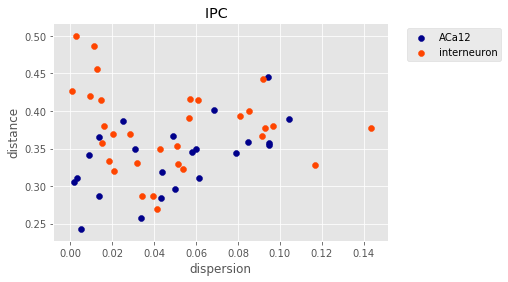

In [119]:
n_cluster_plot(m_ipc,'','ACa12',False)

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1657: UserWarning:

Input data for shapiro has range zero. The results may not be accurate.

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

invalid value encountered in double_scalars



x and y looks Gaussian (fail to reject H0)
NE VAZI


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

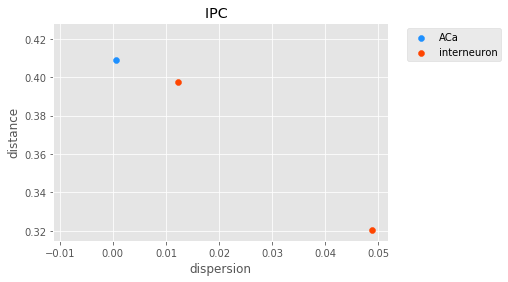

In [167]:
n_cluster_plot(m_ipc,'','ACa',False)

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1657: UserWarning:

Input data for shapiro has range zero. The results may not be accurate.

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

invalid value encountered in double_scalars



x and y looks Gaussian (fail to reject H0)
NE VAZI


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

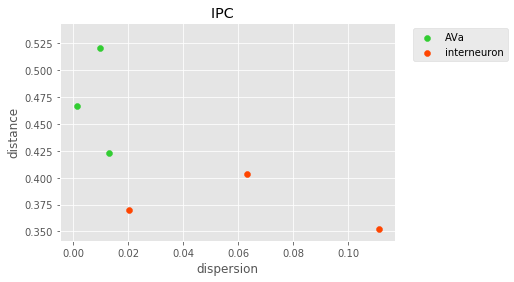

In [168]:
n_cluster_plot(m_ipc,'','AVa',False)

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1657: UserWarning:

Input data for shapiro has range zero. The results may not be accurate.

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

invalid value encountered in double_scalars



x and y looks Gaussian (fail to reject H0)
NE VAZI


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

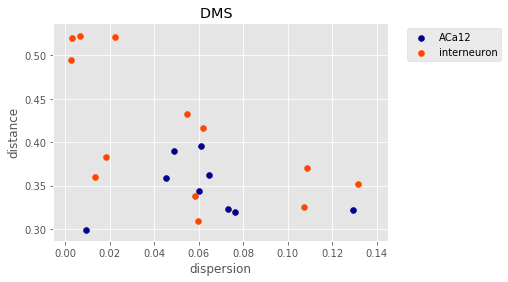

In [169]:
n_cluster_plot(m_dms,'','ACa12',False)

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1657: UserWarning:

Input data for shapiro has range zero. The results may not be accurate.

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

invalid value encountered in double_scalars



x and y looks Gaussian (fail to reject H0)
NE VAZI


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

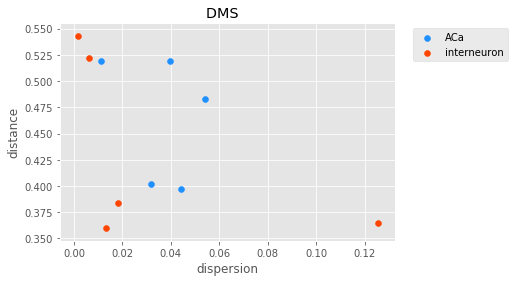

In [170]:
n_cluster_plot(m_dms,'','ACa',False)

In [187]:
m_dh

Unnamed: 0                    source  \
0            0   AN-L-Sens-B1-ACa-03 (5)   
1            1   AN-L-Sens-B1-ACa-03 (5)   
2            2   AN-L-Sens-B1-ACa-03 (5)   
3            3   AN-L-Sens-B1-ACa-15 (3)   
4            4   AN-L-Sens-B1-ACa-15 (3)   
5            5   AN-L-Sens-B1-ACa-04 (3)   
6            6   AN-L-Sens-B1-ACa-04 (3)   
7            7   AN-L-Sens-B1-ACa-12 (2)   
8            8   AN-L-Sens-B1-ACa-12 (2)   
9            9  AN-L-Sens-B1-ACa-03 (10)   
10          10  AN-L-Sens-B1-ACa-03 (10)   
11          11  AN-L-Sens-B1-ACa-03 (10)   
12          12   AN-L-Sens-B1-ACa-04 (7)   
13          13   AN-L-Sens-B1-ACa-04 (7)   
14          14   AN-L-Sens-B1-ACa-03 (7)   
15          15   AN-L-Sens-B1-ACa-03 (7)   
16          16   AN-L-Sens-B1-ACa-04 (7)   
17          17   AN-L-Sens-B1-ACa-04 (7)   
18          18   AN-R-Sens-B1-ACa-14 (2)   
19          19   AN-R-Sens-B1-ACa-13 (2)   
20          20   AN-R-Sens-B1-ACa-03 (2)   
21          21   AN-R-Sens-B1-ACa-03 (4)   
22          22   AN-R-Sens-B1-ACa-03 (4)   
23          23   AN-R-Sens-B1-ACa-03 (8)   

                                          interneuron        target  \
0                               T1r asc contra 01 (9)   DH44 1 left   
1                               T2r asc contra 01 (5)   DH44 1 left   
2                          T2l asc medial soma 02 (5)   DH44 1 left   
3   SOG into brain contralaterally right - paired ...   DH44 1 left   
4                               T1r asc contra 02 (2)   DH44 1 left   
5                               T2r asc contra 01 (5)   DH44 1 left   
6                               T3r asc contra 01 (3)   DH44 1 left   
7   SOG into brain contralaterally right - paired ...   DH44 1 left   
8                               T1r asc contra 02 (2)   DH44 1 left   
9                               T1r asc contra 01 (6)   DH44 3 left   
10                              T2r asc contra 01 (7)   DH44 3 left   
11                         T2l asc medial soma 02 (4)   DH44 3 left   
12                              T2r asc contra 01 (7)   DH44 3 left   
13                              T3r asc contra 01 (2)   DH44 3 left   
14                              T1r asc contra 01 (5)   DH44 2 left   
15                              T2r asc contra 01 (6)   DH44 2 left   
16                              T2r asc contra 01 (6)   DH44 2 left   
17                              T3r asc contra 01 (2)   DH44 2 left   
18  SOG into Brain contralaterally left - paired w...  DH44 2 right   
19  SOG into Brain contralaterally left - paired w...  DH44 2 right   
20                              T2l asc contra 01 (8)  DH44 2 right   
21                              T2l asc contra 01 (3)  DH44 1 right   
22                              T1l asc contra 02 (2)  DH44 1 right   
23                              T2l asc contra 01 (6)  DH44 3 right   

                                      all_disp_source  \
0   [0.0290044, 0.0676274, 0.0083066, 0.0013598, 0...   
1   [0.0290044, 0.0676274, 0.0083066, 0.0013598, 0...   
2   [0.0290044, 0.0676274, 0.0083066, 0.0013598, 0...   
3                   [0.0397816, 0.0958888, 0.0692645]   
4                   [0.0397816, 0.0958888, 0.0692645]   
5                   [0.0047934, 0.0392309, 0.0406942]   
6                   [0.0047934, 0.0392309, 0.0406942]   
7                                         [0.0481404]   
8                                         [0.0481404]   
9   [0.0450546, 0.0593573, 0.0325164, 0.0212503, 0...   
10  [0.0450546, 0.0593573, 0.0325164, 0.0212503, 0...   
11  [0.0450546, 0.0593573, 0.0325164, 0.0212503, 0...   
12  [0.0263737, 0.0076445, 0.012376, 0.0200205, 0....   
13  [0.0263737, 0.0076445, 0.012376, 0.0200205, 0....   
14  [0.0047777, 0.0507705, 0.0578087, 0.0609708, 0...   
15  [0.0047777, 0.0507705, 0.0578087, 0.0609708, 0...   
16  [0.0576082, 0.0515213, 0.0159452, 0.0063392, 0...   
17  [0.0576082, 0.0515213, 0.0159452, 0.0063392, 0...   
18                                        [0

In [175]:
m_dh.target.values.tolist()[0]

'DH44 1 left'

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1657: UserWarning:

Input data for shapiro has range zero. The results may not be accurate.

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

invalid value encountered in double_scalars



x and y looks Gaussian (fail to reject H0)
NE VAZI


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

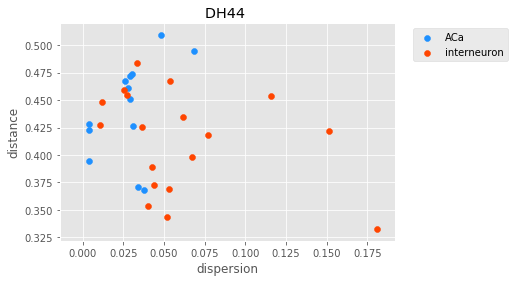

In [176]:
n_cluster_plot(m_dh,'','ACa',False)

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1657: UserWarning:

Input data for shapiro has range zero. The results may not be accurate.

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

invalid value encountered in double_scalars



x and y looks Gaussian (fail to reject H0)
NE VAZI


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

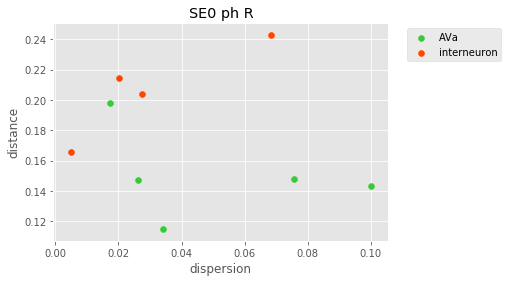

In [206]:
n_cluster_plot(m_se0p,'R','AVa')

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1657: UserWarning:

Input data for shapiro has range zero. The results may not be accurate.

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

invalid value encountered in double_scalars



x and y looks Gaussian (fail to reject H0)
NE VAZI


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

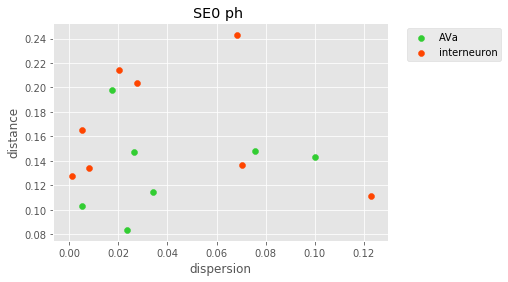

In [178]:
n_cluster_plot(m_se0p,'','AVa')

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1657: UserWarning:

Input data for shapiro has range zero. The results may not be accurate.

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

invalid value encountered in double_scalars



x and y looks Gaussian (fail to reject H0)
NE VAZI


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

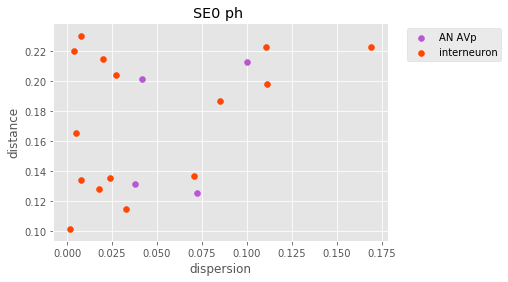

In [179]:
n_cluster_plot(m_se0p,'','AN AVp')

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1657: UserWarning:

Input data for shapiro has range zero. The results may not be accurate.

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

invalid value encountered in double_scalars



x and y looks Gaussian (fail to reject H0)
NE VAZI


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

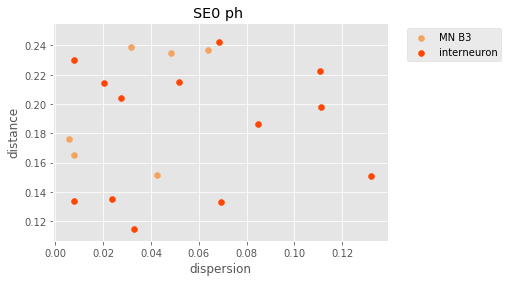

In [181]:
n_cluster_plot(m_se0p,'','MN B3')

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1657: UserWarning:

Input data for shapiro has range zero. The results may not be accurate.

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

invalid value encountered in double_scalars



x and y looks Gaussian (fail to reject H0)
NE VAZI


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

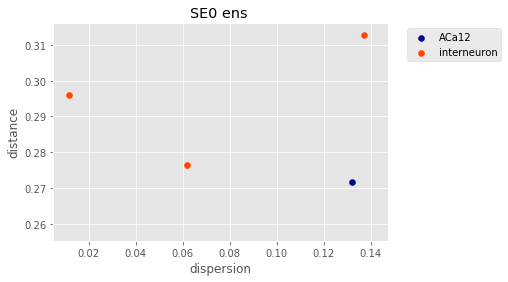

In [182]:
n_cluster_plot(m_se0ens,'','ACa12')

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1657: UserWarning:

Input data for shapiro has range zero. The results may not be accurate.

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

invalid value encountered in double_scalars



x and y looks Gaussian (fail to reject H0)
NE VAZI


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

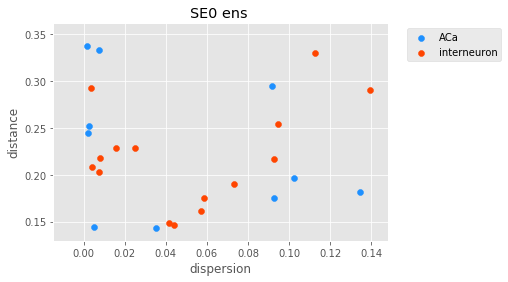

In [183]:
n_cluster_plot(m_se0ens,'','ACa')

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1657: UserWarning:

Input data for shapiro has range zero. The results may not be accurate.

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

invalid value encountered in double_scalars



x and y looks Gaussian (fail to reject H0)
NE VAZI


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

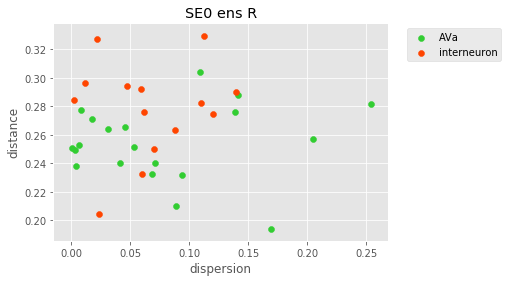

In [208]:
n_cluster_plot(m_se0ens,'R','AVa')

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1657: UserWarning:

Input data for shapiro has range zero. The results may not be accurate.

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

invalid value encountered in double_scalars



x and y looks Gaussian (fail to reject H0)
NE VAZI


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

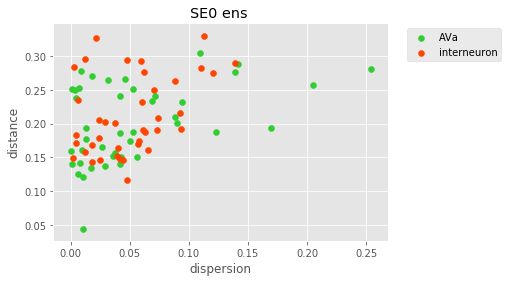

In [184]:
n_cluster_plot(m_se0ens,'','AVa')

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1657: UserWarning:

Input data for shapiro has range zero. The results may not be accurate.

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

invalid value encountered in double_scalars



x and y looks Gaussian (fail to reject H0)
NE VAZI


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

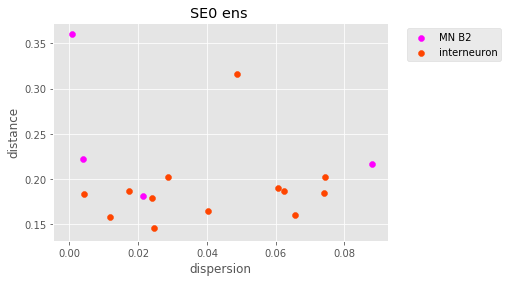

In [185]:
n_cluster_plot(m_se0ens,'','MN B2')

SE0 L1 showed significant results per target for AVa both for distance AND dispersion (euclidean though- and here you are looking at arbor)

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1657: UserWarning:

Input data for shapiro has range zero. The results may not be accurate.

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2224: RuntimeWarning:

invalid value encountered in double_scalars



x and y looks Gaussian (fail to reject H0)
NE VAZI


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

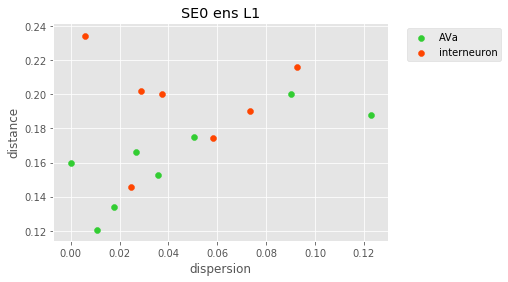

In [186]:
n_cluster_plot(m_se0ens,'L1','AVa')

In [121]:
from numpy.polynomial.polynomial import polyfit
from scipy import stats
# from mlxtend.plotting import plot_linear_regression
tp_cols = list(colors.keys()) + list(more_colors.keys())

def eu_cluster_plot(df,tar,tp = False, both = False,inter = False):
    
#     df.reset_index(drop=True)
    dh_df = df.loc[df['target'].str.contains(tar)]
    
    tarname = dh_df.target.values.tolist()[0]
    # Getting the sensory type list
    if 'SE' in tarname:
        tplist = senlist2
    else:
        tplist = senlist1
        
    # Needed to get the range of the plot- such that the axis is always the same across different neurons of the same 
    # target type
    old_vals = [list(n) for n in zip(df['avg_orig_source'].values.tolist(),
                               df['eu_avg_source'].values.tolist())]
    
    s_old_vals = list(set(tuple(i) for i in old_vals))
    
    old_xs = np.array([int(s_old_vals[i][0]) for i in range(0,len(s_old_vals))])
    old_ys = np.array([int(s_old_vals[i][1]) for i in range(0,len(s_old_vals))])

    dh_df.reset_index()
    
#     sens = list(set(dh_df.source.values.tolist()))

    vals = [list(n) for n in zip(dh_df['avg_orig_source'].values.tolist(),
                               dh_df['eu_avg_source'].values.tolist())]
    
   
    if both == True:
        int_vals = [list(n) for n in zip(dh_df['avg_orig_inter'].values.tolist(),
                               dh_df['eu_avg_inter'].values.tolist())]
        int_newvals = list(set(tuple(i) for i in int_vals))

        
    newl = dh_df.source.values.tolist()
    s_newl = list(set([n[0:19] for n in newl]))
    print(s_newl)
    newvals = list(set(tuple(i) for i in vals))
    
    
    xs = np.array([int(newvals[i][0]) for i in range(0,len(newvals))])
    ys = np.array([int(newvals[i][1]) for i in range(0,len(newvals))])
#      regression part
    slope, intercept, r_value, p_value, std_err = stats.linregress(xs,ys)
    line = slope*xs+intercept
    
    plt.plot(xs, line, 'b', label=['y={:.2f}x+{:.2f}'.format(slope,intercept),'r = '+str(round(r_value,5)),
                                   str(p_value<0.05)],linewidth = '0.2')

    if p_value > 0.05:
        print('Not significant')
    else:
        print('Significant')

    count = 0
    for v in newvals:
        ind = df.index[df['avg_orig_source']==v[0]].tolist()[0]
        name = df['source'].iloc[ind]
        nname = name[0:19]
        tp_name = df['type'].iloc[ind]
       
        if both == True:
            plt.scatter(v[0],v[1],color = 'dodgerblue')
        else:
#             plt.scatter(v[0],v[1],color = mycols[count],label = nname)
            if tp == False:
                plt.scatter(v[0],v[1],color = mycols[s_newl.index(nname)],label = nname, s = 18)
            else:
                plt.scatter(v[0],v[1],color = tp_cols[tplist.index(tp_name)],label = tp_name, s = 18)

        count+=1
    
    if both == True:
        name = df['interneuron'].iloc[ind]
        l = name[:-4]
        nname = l[:-1]+l[-1:].replace(' ','')
#         nname = df['target'].iloc[ind]
        if inter == True:
            plt.figure()

        for v in int_newvals:
    #         ind = df.index[df['avg_orig_inter']==v[0]].tolist()[0]
            plt.scatter(v[0],v[1],color = 'orangered')
               
            xs2 = np.array([int(int_newvals[i][0]) for i in range(0,len(int_newvals))])
            ys2 = np.array([int(int_newvals[i][1]) for i in range(0,len(int_newvals))])
        #      regression part
            slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(xs2,ys2)
            line2 = slope2*xs2+intercept2
            plt.plot(xs2, line2, 'r', label=['y={:.2f}x+{:.2f}'.format(slope2,intercept2),'r = '+str(round(r_value2,5)),
                                             str(p_value2<0.05)],linewidth = '0.2')

    
#     left, right = plt.xlim() 
#     bott, top = plt.ylim()
    plt.xlim(-1000, max(old_xs)+2000)
    plt.ylim(-1000, max(old_ys)+2000)
    if 'SE' not in tarname:
        figname = tarname[:3]
        plt.title(tarname[:4]+' '+tar)
    else:
        if '4' in tarname:
            figname = 'SE0ph'
            plt.title('SE0 ph '+tar)
        else:
            figname = 'SE0ens'

            plt.title('SE0 ens '+tar)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.04,1), loc="upper left")

    plt.xlabel('arbor')
    plt.ylabel('euclidean')
    
    if both == True:
        if inter == False:
            plt.savefig('line-both-disp-cluster'+figname+tar+'.png',bbox_inches='tight',dpi=1000)
        else:
            plt.savefig('inter-disp-cluster'+figname+tar+'.png',bbox_inches='tight',dpi=1000)

    else:
        if tp ==False:
            plt.savefig('line-corr-sens-disp-cluster'+figname+tar+'.png',bbox_inches='tight',dpi=1000)
        else:
            plt.savefig('line-corr-type-sens-disp-cluster'+figname+tar+'.png',bbox_inches='tight',dpi=1000)


    #         if 'right' in nname or 'R' in nname:
#             boja = 'orangered'
#         else:
#             boja = 'mediumblue'
# #         plt.scatter(v[0],v[1],color = mycols[newl.index(nname)])
#         if 'R-Sens-B1-AVa-27' in name:
#             print(ind)
#             plt.scatter(v[0],v[1],color = 'limegreen')
#         else:
#             plt.scatter(v[0],v[1],color = boja)


    return plt

In [116]:
# m_se0ens.loc[m_se0ens['source'].str.contains('R-Sens-B1-AVa-27')]

In [118]:
# cluster_plot(m_se0ens,'L3')

In [119]:
# cluster_plot(m_se0ens,'S')

In order to check the polarity of a neuron, first a function is required that divides its connections into compartments based on their coordinates. The function **ward_cl()** takes the 2d coordinates of the connectors of a neuron (as a list of (x,y)) and a number of desired compartments, which for checking the polarity it makes sense to be equal to 2. This function uses the Ward clustering method to group the coordinates and then returns the labels of all the synapses in the form of an array.

In [120]:
def ward_cl(nr,values):
    #the soma is up
    nclusters = nr  # number of regions
    ward = AgglomerativeClustering(n_clusters = nclusters, linkage='ward')
    ward.fit(values)
    # n_clusters = len(np.unique(labels)) 
    centers = ward.labels_
    return centers

In [121]:
m_dms.loc[m_dms['target'].str.contains('left')]

Unnamed: 0                   source  \
0            0  AN-L-Sens-B1-ACa-02 (2)   
1            1  AN-L-Sens-B1-ACa-02 (2)   
2            2  AN-L-Sens-B1-ACa-02 (2)   
3            3  AN-L-Sens-B1-ACa-01 (5)   
4            4  AN-L-Sens-B1-ACa-01 (5)   
5            5  AN-L-Sens-B1-ACa-01 (5)   
6            6  AN-L-Sens-B1-ACa-01 (5)   
7            7  AN-L-Sens-B1-ACa-10 (4)   
8            8  AN-L-Sens-B1-ACa-10 (4)   
9            9  AN-R-Sens-B1-ACa-01 (6)   
10          10  AN-R-Sens-B1-ACa-01 (6)   
11          11  AN-L-Sens-B1-ACa-11 (3)   
12          12  AN-R-Sens-B1-ACa-02 (2)   
13          13  AN-R-Sens-B1-ACa-02 (2)   
14          14  AN-R-Sens-B1-ACa-02 (2)   
15          15  AN-R-Sens-B1-ACa-02 (2)   
17          17  AN-L-Sens-B1-ACa-02 (6)   
18          18  AN-L-Sens-B1-ACa-02 (6)   
19          19  AN-L-Sens-B1-ACa-02 (6)   
20          20  AN-L-Sens-B1-ACa-01 (7)   
21          21  AN-L-Sens-B1-ACa-01 (7)   
22          22  AN-L-Sens-B1-ACa-01 (7)   
23          23  AN-L-Sens-B1-ACa-01 (7)   
24          24  AN-L-Sens-B1-ACa-10 (3)   
25          25  AN-R-Sens-B1-ACa-02 (4)   
26          26  AN-R-Sens-B1-ACa-02 (4)   
27          27  AN-R-Sens-B1-ACa-02 (4)   

                                          interneuron      target  \
0   Sweetness Right 130521_Cand1_OSN2_IN5 Bilatera...  DMS 1 left   
1                             AN: DPMlp Lar_right (4)  DMS 1 left   
2                                 Pre PMN R right (5)  DMS 1 left   
3   Sweetness Right 130521_Cand1_OSN2_IN5 Bilatera...  DMS 1 left   
4   SOG into brain contralaterally right - paired ...  DMS 1 left   
5                                 Pre PMN R right (5)  DMS 1 left   
6                                 hugin-PC left 4 (3)  DMS 1 left   
7                                 Pre PMN R right (5)  DMS 1 left   
8                                 hugin-PC left 2 (3)  DMS 1 left   
9                                 Pre PMN R right (5)  DMS 1 left   
10                                hugin-PC left 4 (3)  DMS 1 left   
11                                Pre PMN R right (5)  DMS 1 left   
12  Sweetness Right 130521_Cand1_OSN2_IN5 Bilatera...  DMS 1 left   
13  SOG into brain contralaterally right - paired ...  DMS 1 left   
14                            AN: DPMlp Lar_right (4)  DMS 1 left   
15                                Pre PMN R right (5)  DMS 1 left   
17  Sweetness Right 130521_Cand1_OSN2_IN5 Bilatera...  DMS 2 left   
18                            AN: DPMlp Lar_right (2)  DMS 2 left   
19                                hugin-PC left 3 (2)  DMS 2 left   
20  Sweetness Right 130521_Cand1_OSN2_IN5 Bilatera...  DMS 2 left   
21  SOG into brain contralaterally right - paired ...  DMS 2 left   
22                                     Moggy_left (2)  DMS 2 left   
23                              T1r asc contra 02 (2)  DMS 2 left   
24                                hugin-PC left 3 (2)  DMS 2 left   
25  Sweetness Right 130521_Cand1_OSN2_IN5 Bilatera...  DMS 2 left   
26  SOG into brain contralaterally right - paired ...  DMS 2 left   
27                            AN: DPMlp Lar_right (2)  DMS 2 left   

                                      all_disp_source  \
0                                         [0.1292303]   
1                                         [0.1292303]   
2                                         [0.1292303]   
3   [0.1048722, 0.0832178, 0.0354068, 0.0364946, 0...   
4   [0.1048722, 0.0832178, 0.0354068, 0.0364946, 0...   
5   [0.1048722, 0.0832178, 0.0354068, 0.0364946, 0...   
6   [0.1048722, 0.0832178, 0.0354068, 0.0364946, 0...   
7   [0.0568573, 0.0507996, 0.0060577, 0.061701, 0....   
8   [0.0568573, 0.0507996, 0.0060577, 0.061701, 0....   
9   [0.1142716, 0.1153997, 0.1192483, 0.0153306, 0...   
10  [0.1142716, 0.1153997, 0.1192483, 0.0153306, 0...   
11                  [0.0645907, 0.0136671, 0.0539956]   
12                                        [0.0093502]   
13                                        [0.0093502]   
14         

26
2


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

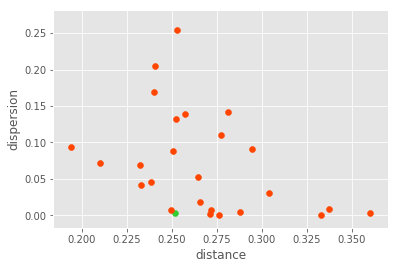

In [135]:
cluster_plot(m_se0ens,'R')

In the next cells, the interneurons are clustered by general downstream or upstream connectivity

The next function takes a dataframe such as all_x, the number for the stat_list function (either 3 or 7) and the number for which group you would like to have the results; It returns the stat_list output (a list of lists for all distance values per sensory type) and a dictionary where the keys are the names of the individual neurons and the values are lists of the distances associated with the connectors of the neuron.

In [209]:
def catch_all(dataf,a,b):
    lista = stat_list(dataf,a)
    d = {}
    el = lista[b]

    for i in range(0,len(el)):#
        
        
        nom = dataf['source'].loc[dataf['distance']==el[i]].values.tolist()[0]
        if nom not in d.keys():
            d[nom]=[el[i]]
        else:
            d[nom].append(el[i])
    return [lista,d]

In [210]:
# catch_all(all_dh,3,1)[1]

The next function takes a dataframe of the type all_x, a number of desired sensory types, and a number representing the index of the input type (e.g. for the mNSCs 0-ACa12, 1-ACa and 2-inter) and returns a dictionary with the individual sensory neurons as keys and the number of connectors to the target neurons of type x as values.

In [211]:
def count_all(dataf,a,b):
    lista = stat_list(dataf,a)
    d = {}
    el = lista[b]
    for i in range(0,len(el)):
        nom = dataf['source'].loc[dataf['distance']==el[i]].values.tolist()[0]
        if nom not in d.keys():
            d[nom]=[el[i]]
        else:
            d[nom].append(el[i])
            
    newd = {k: len(d[k]) for k in d.keys()}
    return newd

In [244]:
l1 = dmss[0]
l2=[[el for el in dmss[1][i] if 'Sens' in el] for i in range(0,len(dmss[1]))]

for i in range(0,len(dmss[0])):
#     print(l2[i])
    if len(l2[i])!=0:
        for j in range(0,len(l2[i])):
            print((l2[i][j],l1[i]))
            pass
l1

('AN-L-Sens-B1-ACa-02', 'DMS 1 left')
('AN-L-Sens-B1-ACa-01', 'DMS 1 left')
('AN-L-Sens-B1-ACa-10', 'DMS 1 left')
('AN-R-Sens-B1-ACa-01', 'DMS 1 left')
('AN-L-Sens-B1-ACa-11', 'DMS 1 left')
('AN-R-Sens-B1-ACa-02', 'DMS 1 left')
('AN-L-Sens-B1-ACa-02', 'DMS 1 right')
('AN-L-Sens-B1-ACa-02', 'DMS 2 left')
('AN-L-Sens-B1-ACa-01', 'DMS 2 left')
('AN-L-Sens-B1-ACa-10', 'DMS 2 left')
('AN-R-Sens-B1-ACa-02', 'DMS 2 left')
('AN-L-Sens-B1-ACa-02', 'DMS 2 right')
('AN-R-Sens-B1-ACa-09', 'DMS 2 right')
('AN-R-Sens-B1-ACa-08', 'DMS 2 right')


['DMS 1 left', 'DMS 1 right', 'DMS 2 left', 'DMS 2 right']

In [97]:
def get_inters(datf,m,c):
    inters = list(catch_all(datf,m,m-1)[1].keys())
    print(len(inters))
    res = pymaid.cluster_by_connectivity(inters,upstream=False,threshold=2)
    print(res.plot_dendrogram())
    #dendr = res.cluster()
    #matr = res.plot_matrix()
    return res.get_clusters(c, criterion = 'maxclust' )

# dh_inters = get_inters(all_dh,3,5)
# dms_inters = get_inters(all_dms,3,5)
# ipc_inters = get_inters(all_ipc,3,5)

In [99]:
def get_ups_inters(datf,m,c):
    inters = list(catch_all(datf,m,m-1)[1].keys())
    print(len(inters))
    res = pymaid.cluster_by_connectivity(inters,downstream=False,threshold=2)
    print(res.plot_dendrogram())
    #dendr = res.cluster()
    #matr = res.plot_matrix()
    return res.get_clusters(c, criterion = 'maxclust' )


In [100]:
# inter_dms = dms1.loc[dms1['type'] =='Inter']

In [101]:
# inter_dh = dh1.loc[dh1['type'] =='Inter']
# inter_dms = dms1.loc[dms1['type'] =='Inter']
# inter_ipc = ipc1.loc[ipc1['type'] =='Inter']
# inter_se0p = se0p.loc[se0p['type'] =='Inter']
# inter_se0e = se0e.loc[se0e['type'] =='Inter']

In [ ]:
# se0ens_inters = get_inters(all_se0,7,6)
# se0p_inters = get_inters(all_se02,7,6)

In [ ]:
# se0p_inters

In [96]:
def df_cluster(datf,intlist):
    rlista = []
    newdatf=datf.copy()
    for s in datf['source']:
        for i in range(0,len(intlist)):
            if s in intlist[i]:
                rlista.append(i+1)
   
    pandaslist = pd.Series(rlista,index = datf.index)

    newdatf['cluster']=pandaslist
    return newdatf



In [ ]:
# cl_dh = df_cluster(inter_dh,dh_inters)
# cl_dms = df_cluster(inter_dms,dms_inters)
# cl_ipc = df_cluster(inter_ipc,ipc_inters)
# cl_se0p = df_cluster(inter_se0p,se0p_inters)
# cl_se0e = df_cluster(inter_se0e, se0ens_inters)

In [ ]:
cl_dms2 = df_cluster(inter_dms,dms2_inters)


In [ ]:
cl_dh2 = df_cluster(inter_dh,dh2_inters)
cl_dms2 = df_cluster(inter_dms,dms2_inters)
cl_ipc2 = df_cluster(inter_ipc,ipc2_inters)
cl_se0p2 = df_cluster(inter_se0p,se0p2_inters)
cl_se0e2 = df_cluster(inter_se0e,se0ens2_inters)

In [ ]:
# se0p_inters = get_inters(all_se02,7,6)


In [ ]:
count_all(all_ipc,3,1)['AN-L-Sens-B1-ACa-10']

In [ ]:
# for i in range(0,7):
#     print(catch_all(all_se0,6,i)[1])

statseo = catch_all(all_dms,3,2)[0]
statss = stat_list(all_dms,3)


In [ ]:
dms_in = catch_all(all_dms,3,2)[1]
dms_s1 = catch_all(all_dms,3,0)[1]
dms_s2 = catch_all(all_dms,3,1)[1]

In [ ]:
complist = []
complist.append(list(dms_s1.values()))
complist.append(list(dms_s2.values()))
complist.append(list(dms_in.values()))

In [ ]:
len(complist)

In [ ]:
# newl = complist

In [ ]:
# se0p

In [ ]:
# inter_dh

This is for the clusters; before it was data=se0p, hue = 'source', order = orderlist2

In [ ]:
# Add a cluster column to 
custom_palette = sns.color_palette("Paired", 50)
# sns.palplot(custom_palette)
paleta = np.repeat(np.array(sns.color_palette("deep")),1,axis=0)
# print(paleta)
orderlist1 =['ACa12', 'ACa','Inter']
orderlist2 = ['ACa12', 'ACa', 'AVa', 'AN AVp', 'MN B2', 'MN B3', 'Inter']
ax = sns.swarmplot(x='type',y='distance',data=cl_se0e2,hue='cluster',order = ['Inter'])
ax.set_ylabel('norm. distance to RG')
sns.despine(trim=True)
# ax.legend(dh_inters)

new_labels = se0ens2_inters
for t, l in zip(ax.legend().texts, new_labels): 
    t.set_text(l)
ax.get_legend()
# ax.legend(bbox_to_anchor=(1,1), loc="upper left",fontsize='small')
# for t, l in zip(ax.legend().texts[:-1], new_labels): t.set_text(l)
# ax.get_legend().remove()
# print(new_labels)
# ax.savefig('se0ens-cluster-swarm.png',bbox_inches='tight',dpi=1000)


In [ ]:
statseo2 = stat_list(all_dh,3)

In [ ]:
statseo3 = stat_list(all_ipc,3)

In [ ]:
se0p.loc[se0p['type']=='MN B2']

In [208]:
import scipy.stats as ss
import seaborn as sns
from collections import OrderedDict
cmaps = OrderedDict()
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
boi = list(colors.keys())
boi2= [b for b in boi if 'orange' in b  or 'red' in b or 'blue' in b or 'green' in b if b!='aliceblue' and b!='darkblue' and b!='orangered' and b!='dodgerblue']
# print(boi2)

def freq_plot(datf,n,m,sorn = False,shad = False):  
    c = catch_all(datf,n,m)
    if n==3:
        cols = ["ACa12","ACa","Interneuron"]
    else:
        cols = ["ACa12","ACa","AVa","AN AVp","MN-B2 AVp","MN-B3 AVp","Interneuron"]
        
    lista=c[0]
    list12 = [lista[m],lista[-1]]
    rec = c[1]
    r_rec= {k: rec[k] for k in rec.keys() if 'R ' in k and 'left' not in k or 'right' in k or 'Right' in k or 'r ' in k }
    l_rec= {k: rec[k] for k in rec.keys() if 'L' in k and 'right' not in k or 'left' in k or 'Left' in k or 'l ' in k}

#     r_rec = dict(key for key in c[1].keys() if 'R' in key]
#     l_rec = [key[] for key in c[1].keys() if 'L' in key]
#     print(len(lista[m]))
#     print(len(list12[0]))
    count = 0
    if shad ==False:
       
        if sorn==True:
             ax=sns.distplot(list12[1],color = 'orangered',kde_kws={"bw":0.02},label='Interneuron')
        else:
            pass

        for key in list(rec.keys()):
    #       
            ax = sns.distplot(rec[key],color = boi2[count],label=key,kde=False,norm_hist=False,
                              hist = False,rug=True,rug_kws={'linewidth':1, "height":0.07 })
            sns.distplot(rec[key],ax=ax,hist=False,color = boi2[count],kde_kws={"bw":0.02},kde=True)

            count+=1
            

#         sns.distplot(list12[0], hist=False,color = 'darkblue',kde_kws={"bw":0.02},kde=False)
        sns.distplot(list12[0], rug=False, kde=False, hist=False, norm_hist=False,label=cols[m],color = 'darkblue', bins=10)

    else:
        if sorn==True:
            ax=sns.distplot(list12[1],hist=False,color = 'orangered',kde=True,kde_kws={"bw":0.02},label='Interneuron')
        else:
            pass
#         
#         sns.distplot(list12[1], hist=False,color = 'orangered',kde_kws={"bw":0.02},label='Interneuron',kde=True)
#         sns.distplot(list12[1], ax=ax, rug=False, kde=False, hist=True, norm_hist=False,color = 'orangered', bins=10)
#         for key in list(rec.keys()):
           
# #             ax = sns.distplot(rec[key],color = boi2[count],bins = 4,kde_kws={"bw":0.02},label=key,kde=False,
# #                               hist = False,rug=True,rug_kws={'linewidth':1})
#             ax = sns.distplot(rec[key],hist=False,color = boi2[count],label=key+' ('+str(count_all(datf,n,m)[key])+')',kde_kws={"bw":0.02},
#                               kde=True)
#             l1 = ax.lines[count]
# #             print(ax.lines)
#             # Get the xy data from the lines so that we can shade
#             x1 = l1.get_xydata()[:,0]
#             y1 = l1.get_xydata()[:,1]
        
#             ax.fill_between(x1,y1, color=boi2[count], alpha=0.3)
#             count+=1
#         print(count)
        sns.distplot(list12[0],color = 'darkblue',hist = False, kde=True,kde_kws={"bw":0.02},label=cols[m])
#         ax = sns.distplot(rec[key],hist=False,color = boi2[count],kde_kws={"bw":0.02},kde=True)

#         sns.distplot(list12[0], hist=True,color = 'darkblue',kde_kws={"bw":0.02},label=cols[m],kde=True)
#         sns.distplot(list12[0], ax=ax, rug=False, kde=False, hist=True, norm_hist=False,color = 'darkblue', bins=10)
        
        l1 = ax.lines[0]
        l2 = ax.lines[1]

        # Get the xy data from the lines so that we can shade
        x1 = l1.get_xydata()[:,0]
        y1 = l1.get_xydata()[:,1]
        x2 = l2.get_xydata()[:,0]
        y2 = l2.get_xydata()[:,1]
        ax.fill_between(x1,y1, color="orangered", alpha=0.3)
        ax.fill_between(x2,y2, color="darkblue", alpha=0.3)
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    ax.set_xlabel('distance', fontsize=14)
    ax.set_ylabel('frequency', fontsize=14)
    ax.set_title(cols[m])
# #     plt.show(block=False)
    #     x = list12[0]
#     sns.kdeplot(x)
#     sns.kdeplot(x, bw=.1, label="bw: 0.2")
#     sns.kdeplot(x, bw=1, label="bw: 1")
#     plt.legend();
#     figure(num=None, figsize=(50, 46), dpi=80, facecolor='w', edgecolor='k')   

fig = freq_plot(se0enstrip1,7,4,True,True)
# fig.suptitle('test title', fontsize=20)

my_dpi = 67
# plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.savefig('se0ens-mnb2-shade-inter.png',bbox_inches='tight',dpi=1000)


NameError: name 'catch_all' is not defined

In [ ]:
statseo4 = stat_list(all_se02,6)

In [ ]:
# dms_inters

In [ ]:
# catch_all(all_dms,3,2)[1]

In [205]:
catch_all(dmstrip1,)


Object `catch_all` not found.


In [207]:
import scipy.stats as ss
import seaborn as sns
from collections import OrderedDict
cmaps = OrderedDict()
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
boi = list(colors.keys())
boi2= [b for b in boi if 'orange' in b  or 'red' in b or 'blue' in b if b!='aliceblue' and b!='darkblue' and b!='orangered' and b!='dodgerblue']

def freq_plot(datf,n,m,clusters,sorn = False,shad = False):  
    c = catch_all(datf,n,m)
    if n==3:
        cols = ["ACa12","ACa","Interneuron"]
    else:
        cols = ["ACa12","ACa","AVa","AN AVp","MN-B2 AVp","MN-B3 AVp","Interneuron"]
    
   
    lista=c[0]
    list12 = [lista[m],lista[-1]]
    rec = c[1]
    r_rec= {k: rec[k] for k in rec.keys() if 'R' in k or 'right' in k}
    l_rec= {k: rec[k] for k in rec.keys() if 'L' in k or 'left' in k}

#     coldict = {k:boi2[i] for k in rec.keys()}
    enums = [i for i in enumerate(clusters)]
    colrec = {}
    for i in range(0,len(clusters)):
        for k in enums[i][1]:
            colrec[k]=boi2[enums[i][0]]
            
    inds = [k[0] for k in enums]
    counter = 0
    newd={}
    for cl in clusters:
        suma = []
        for neur in cl:
            suma+=rec[neur]
        newd[counter]=suma
        counter+=1
#     print(newd)
#     print(colrec)
#     newd = [(k,collist[i]) for k,i in zip(d.keys(),indexes)]
    count = 0
    if shad ==False:
       
        if sorn==True:
             ax=sns.distplot(list12[1],color = 'orangered',kde_kws={"bw":0.02},label='Interneuron')
        else:
            pass

        for key in list(rec.keys()):
    #       
            ax = sns.distplot(rec[key],color = boi2[count],label=key,kde=False,norm_hist=False,
                              hist = False,rug=True,rug_kws={'linewidth':1, "height":0.07 })
            sns.distplot(rec[key],ax=ax,hist=False,color = boi2[count],kde_kws={"bw":0.02},kde=True)

            count+=1
            

#         sns.distplot(list12[0], hist=False,color = 'darkblue',kde_kws={"bw":0.02},kde=False)
        sns.distplot(list12[0], rug=False, kde=False, hist=False, norm_hist=False,label=cols[m],color = 'darkblue', bins=10)

    else:
        if sorn==True:
            ax=sns.distplot(list12[1],hist=False,color = 'orangered',kde=True,kde_kws={"bw":0.02},label='Interneuron')
        else:
            pass
#         
#         sns.distplot(list12[1], hist=False,color = 'orangered',kde_kws={"bw":0.02},label='Interneuron',kde=True)
#         sns.distplot(list12[1], ax=ax, rug=False, kde=False, hist=True, norm_hist=False,color = 'orangered', bins=10)
#         for key in list(rec.keys()):
           
# #             ax = sns.distplot(rec[key],color = boi2[count],bins = 4,kde_kws={"bw":0.02},label=key,kde=False,
# #                               hist = False,rug=True,rug_kws={'linewidth':1})
#             ax = sns.distplot(rec[key],hist=False,color = colrec[key],label=key+' ('+str(count_all(datf,n,m)[key])+')',kde_kws={"bw":0.02},
#                               kde=True)
#             l1 = ax.lines[count]
#             # Get the xy data from the lines so that we can shade
#             x1 = l1.get_xydata()[:,0]
#             y1 = l1.get_xydata()[:,1]
        
#             ax.fill_between(x1,y1, color = colrec[key], alpha=0.3)
#             count+=1
        for key in list(newd.keys()):
            
#             ax = sns.distplot(rec[key],color = boi2[count],bins = 4,kde_kws={"bw":0.02},label=key,kde=False,
#                               hist = False,rug=True,rug_kws={'linewidth':1})
            ax = sns.distplot(newd[key],hist=False,color = boi2[key],label=clusters[key],kde_kws={"bw":0.02},
                              kde=True)
            l1 = ax.lines[count]
            # Get the xy data from the lines so that we can shade
            x1 = l1.get_xydata()[:,0]
            y1 = l1.get_xydata()[:,1]
        
            ax.fill_between(x1,y1, color = boi2[count], alpha=0.3)
            count+=1
        print(count)

    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    ax.set_xlabel('distance', fontsize=14)
    ax.set_ylabel('frequency', fontsize=14)
    ax.set_title(cols[m])


# fig = freq_plot(all_se02,7,6,se0p2_inters,False,True)

my_dpi = 67
# plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
# plt.savefig('se0p-only-clusters-shade-inter.png',bbox_inches='tight',dpi=1000)
plt.savefig('se0p-only-upclusters-shade-inter.png',bbox_inches='tight',dpi=1000)


NameError: name 'se0p2_inters' is not defined

In [ ]:
statseo5 = stat_list(all_se0,6)

In [ ]:
cols = ["ACa12","ACa","AVa","AN AVp","MN-B2 AVp","MN-B3 AVp","Interneuron"]
# for i in range(0,len(min(statseo[0],statseo[1],statseo[2]))):
#     trips +=[statseo[0][i],statseo[1][i],statseo[2][i]]
df= pd.DataFrame([statseo5[0],statseo5[1],statseo5[2],statseo5[3],statseo5[4],statseo5[5],statseo5[6]])
#                  columns = cols)
df_real = df.transpose()
df_real.columns= cols
df_real.transpose()
export_csv = df_real.to_csv (r'/home/ben/se0ens_dist.csv')


In [ ]:
cols = ['ACa12','ACa','Interneuron']
# for i in range(0,len(min(statseo[0],statseo[1],statseo[2]))):
#     trips +=[statseo[0][i],statseo[1][i],statseo[2][i]]
df= pd.DataFrame([statseo3[0],statseo3[1],statseo3[2]])
#                  columns = cols)
df_real = df.transpose()
df_real.columns= cols
df_real.transpose()
export_csv = df_real.to_csv (r'/home/ben/ipc_dist.csv')


In [ ]:
len(df)

In [ ]:
import math
# df.values.tolist()
prvo = [[d for d in df.values.tolist()[i] if math.isnan(d)==False] for i in range(0,len(df))]
prvo

In [ ]:
a = np.asarray([np.asarray([f for f in np.asarray(np.asarray(statseo[i]))]) for i in range(0,len(statseo))])
a

In [ ]:
exp = df.to_csv('/home/ben/try.txt',sep=' ', index=False, header=False)

In [ ]:
# np.savetxt(r'/home/ben/ry.txt', a)

In [ ]:
ax = sns.swarmplot(data=statseo3)

ax.set_ylabel('norm. distance to RG')
# ax.set_xlabel('0=ACa12, 1=ACa other, 2=interneuron')

ax.set_xlabel('0=ACa12, 1=ACa, 2=AVa, 3=interneuron')
sns.despine(trim=True)

In [ ]:
# from statsmodels.graphics.gofplots import qqplot
# qqplot(all_se0['distance'],line='s')

In [ ]:
pstatseo = stat_list(all_se02,7)
pstatseo

In [ ]:
# Statistical analysis-ANOVA between sens12, sens_other and interneuron distances to rg
import scipy.stats as stats
from scipy.stats import shapiro
from statsmodels.formula.api import ols
import researchpy as rp
data = statseo[4]
stat, p = shapiro(data)
print(rp.summary_cont(all_se0['distance']))
res = stats.f_oneway(pstatseo[4],pstatseo[5])
# res12 = stats.f_oneway(dflista[0],dflista[1])
# res13 =stats.f_oneway(dflista[0],dflista[2])
# res23 = stats.f_oneway(dflista[1],dflista[2])
# print(res12)
# print(res13)
# print(res23)
p = res.pvalue
# format(p, '.9f') #so p is really small so there is a significant difference between the three groups
# model_name = ols('distance~ C(source)', data=all_dms).fit()
# model_name
res

In [ ]:
# Statistical analysis-ANOVA between sens12, sens_other and interneuron distances to rg
import scipy.stats as stats
from scipy.stats import shapiro
from statsmodels.formula.api import ols
import researchpy as rp
data = dflista[2]
stat, p = shapiro(data)
print(rp.summary_cont(all_dms['distance']))
res = stats.f_oneway(dflista[0],dflista[1],dflista[2])
res12 = stats.f_oneway(dflista[0],dflista[1])
res13 =stats.f_oneway(dflista[0],dflista[2])
res23 = stats.f_oneway(dflista[1],dflista[2])
print(res12)
print(res13)
print(res23)
p = res.pvalue
# format(p, '.9f') #so p is really small so there is a significant difference between the three groups
# model_name = ols('distance~ C(source)', data=all_dms).fit()
# model_name

In [ ]:
trans

In [ ]:
f5

In [ ]:
# f = f.drop('ACa12',axis=0)
# f = f.drop('ACa',axis=0)

trans2 = f2.transpose()
t = trans2.plot.bar()
# t.legend(fontsize='small')
 

In [187]:
fipc2

IPC 2 left  IPC 7 left  IPC 3 right  IPC 4 left  IPC 1 left  \
ACa12          0.371303    0.365024     0.311826    0.416441    0.345364   
ACa            0.000000    0.000000     0.000000    0.000000    0.000000   
AVa            0.467146    0.000000     0.000000    0.000000    0.000000   
Interneuron    0.358193    0.391321     0.381400    0.460151    0.361575   

             IPC 3 left  IPC 4 right  IPC 5 left  IPC 1 right  IPC 6 right  \
ACa12          0.352550     0.250452    0.375382     0.298607     0.295476   
ACa            0.000000     0.000000    0.000000     0.000000     0.000000   
AVa            0.000000     0.000000    0.000000     0.000000     0.423361   
Interneuron    0.369267     0.270104    0.375955     0.327728     0.319756   

             IPC 2 right  IPC 6 left  
ACa12           0.000000    0.283718  
ACa             0.000000    0.409095  
AVa             0.520727    0.000000  
Interneuron     0.403315    0.334933

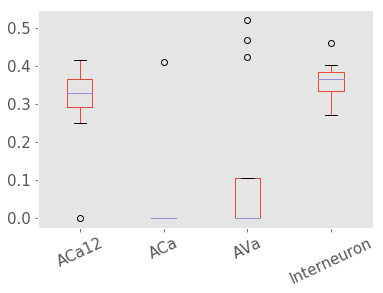

In [309]:
ipctrans = fipc2.transpose()
# ipctrans.plot.bar()fipc
ipctrans.boxplot(grid=False, rot=25, fontsize=15, widths = 0.3,showfliers = True)

In [ ]:
dmstrans=fdms.transpose()
# dmstrans.plot.bar()
dmstrans.boxplot(grid=False, rot=25, fontsize=15, widths = 0.3,showfliers = True)

In [ ]:
dmstrans

In [ ]:
dhtrans=fd.transpose()
dhtrans.plot.bar()

In [ ]:
phatrans=fph.transpose()
# phatrans.plot.bar()
phatrans.boxplot(grid=False, rot=25, fontsize=15, widths = 0.3,showfliers = True)

In [ ]:
enstrans=new_fens.transpose()
# enstrans.plot.bar()
enstrans.boxplot(grid=False, rot=25, fontsize=15, widths = 0.3,showfliers = True)

In [ ]:
fipc2

In [311]:
rownames = [fipc2.index.values[i] for i in range(0,len(fipc2))]
# rownames2 ~= [fd.index.values[i] for i in range(0,len(fd))]
# # noms = [r[5:] for r in rownames]
# [rownames,rownames2]
rownames

['ACa12', 'ACa', 'AVa', 'Interneuron']

In [ ]:
seo_rownames = [new_fens.index.values[i] for i in range(0,len(new_fens))]

In [ ]:
seo_rownames

In [ ]:
#This is equivalent to the method you used previously because there was
lista = trans2['Interneuron'].values.tolist()
mean_inter = sum(lista)/len(lista)
dr_listi = [trans2[m].values.tolist() for m in noms]
dr2 = [[s for s in dr_listi[i] if s!=0] for i in range(0,len(dr_listi))]
means_sens = [sum(s)/len(s) for s in dr2 if len(s)!=0]
print(mean_inter,means_sens)
[mean_inter - s for s in means_sens]

In [ ]:
phatrans

The next cell: this way you only take the differences between inter-sens for the same target and only then take the average of the target neuron values for EACH sensory, so in this case it's not the same as taking the avg of each sens and comparing it to the hugin because there are no values for all sens for all targets; --> this is the 'per target' approach

Note that len(df) is the number of columns but here we are dealing with the transposed (whose columns are the sens types)

In [324]:
len(ipctrans)

12

In [328]:
origds = [ipctrans['Interneuron'].values.tolist()[i] - ipctrans['ACa12'].values.tolist()[i] for i in range(0,len(ipctrans))]

In [332]:
finlist = [round(o,7) for o in origds][0:10]+[[round(o,7) for o in origds][11]]


In [337]:
ipctrans['ACa12']

IPC 2 left     0.371303
IPC 7 left     0.365024
IPC 3 right    0.311826
IPC 4 left     0.416441
IPC 1 left     0.345364
IPC 3 left     0.352550
IPC 4 right    0.250452
IPC 5 left     0.375382
IPC 1 right    0.298607
IPC 6 right    0.295476
IPC 2 right    0.000000
IPC 6 left     0.283718
Name: ACa12, dtype: float64

In [339]:
ipctrans['Interneuron'].values.tolist()[9]-ipctrans['ACa12'].values.tolist()[9]

0.02427999999999997

In [340]:
origds

[-0.01311000000000001,
 0.02629699999999996,
 0.06957400000000002,
 0.04370999999999997,
 0.016210999999999975,
 0.016717000000000037,
 0.019652000000000003,
 0.0005729999999999902,
 0.029121000000000008,
 0.02427999999999997,
 0.403315,
 0.051214999999999955]

In [327]:
ipc_vals = [n for n in table_ipc.transpose()['ACa12'].values.tolist() if n!=0]
avg_tp = sum(ipc_vals)/len(ipc_vals)
# round(avg_tp,7)
ipc_vals

[-0.01311,
 0.026297,
 0.069574,
 0.04371,
 0.016211,
 0.016717,
 0.019652,
 0.000573,
 0.029121,
 -0.008189,
 0.003209]

In [313]:
dhlista = ipctrans['Interneuron'].values.tolist()
difs_seo = [[ipctrans['Interneuron'].values[i]-ipctrans[m].values[i] for i in range(0,len(ipctrans))] for m in rownames]
mod = [[s for s in difs_seo[i] if s not in dhlista] for i in range(0,len(difs_seo)) ]
fin = [sum(s)/len(s) for s in mod if len(s)!=0]
fin

[0.025839999999999988, -0.074162, -0.10998973333333335, 0.0]

In [200]:
ipcl2 = fipc2['IPC 2 left'].values.tolist()

In [204]:
ipc_vals = [n for n in table_ipc.transpose()['ACa12'].values.tolist() if n!=0]
avg_tp = sum(ipc_vals)/len(ipc_vals)
round(avg_tp,7)

0.0119036

In [ ]:
enstrans

In [ ]:
lista = enstrans['Inter'].values.tolist()
difs_seo = [[enstrans['Inter'].values[i]-enstrans[m].values[i] for i in range(0,len(enstrans))] for m in seo_rownames]
mod = [[s for s in difs_seo[i] if s not in lista] for i in range(0,len(difs_seo)) ] #here i get rid of the 0s
fin = [sum(s)/len(s) for s in mod if len(s)!=0]
# fin
fin

In [ ]:
newcsv_dms

The next function calculates whether there is a significant difference between the sensory and the interneuron distances, for a specified sensory type

In [105]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from ast import literal_eval
import math
import itertools
def single_sen(csv_df,s_type):
    ax = None
    count = 0
    vals_ = []
    dh_df = csv_df.loc[csv_df['type']==s_type]
    if dh_df.empty==True:
        return 'No type'
    else:
        dh_df.all_dist_inter = dh_df.all_dist_inter.apply(literal_eval)
        a = dh_df.all_dist_inter.values.tolist()
        new_a= list(set(tuple(i) for i in a))
        interlist = list(itertools.chain.from_iterable(new_a))

        dh_df.all_dist_source = dh_df.all_dist_source.apply(literal_eval)
        b = dh_df.all_dist_source.values.tolist()
        new_b = list(set(tuple(i) for i in b))
        slist = list(itertools.chain.from_iterable(new_b))
        avg1 = round(sum(slist)/len(slist),5)
        avg2 = round(sum(interlist)/len(interlist),5)
    
        stat, p = mannwhitneyu(slist, interlist)
#         stat, p = ttest_ind(slist, interlist)
        print('Sens mean: '+str(avg1))
        print('Inter mean: '+str(avg2))
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Same distribution (fail to reject H0)')
        else:
            print('Different distribution (reject H0)')
    

In [106]:
single_sen(ipctrip1,'AVa')

Sens mean: 0.45865
Inter mean: 0.38029
Statistics=5.000, p=0.001
Different distribution (reject H0)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [102]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from ast import literal_eval
import math
import itertools

def mann_test_all(tripdf,tar):
    
#     targets = list(set(tripdf['target'].values.tolist()))
    dh_df = tripdf.loc[tripdf['target']==tar]
    dh_df.all_dist_inter = dh_df.all_dist_inter.apply(literal_eval)
    a = dh_df.all_dist_inter.values.tolist()
    new_a= list(set(tuple(i) for i in a))
    interlist = list(itertools.chain.from_iterable(new_a))
    
    dh_df.all_dist_source = dh_df.all_dist_source.apply(literal_eval)
    b = dh_df.all_dist_source.values.tolist()
    new_b = list(set(tuple(i) for i in b))
    slist = list(itertools.chain.from_iterable(new_b))
    avg1 = round(sum(slist)/len(slist),5)
    avg2 = round(sum(interlist)/len(interlist),5)
    print(avg1,avg2)
#     tar = [dh_df1.target.values.tolist()[0],dh_df2.target.values.tolist()[0]]

        # compare samples
#     stat, p = mannwhitneyu(fin1, fin2)
    stat, p = ttest_ind(slist, interlist)
    print('Sens mean: '+str(avg1))
    print('Inter mean: '+str(avg2))
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

In [103]:
dmss[0]

['DMS 1 left', 'DMS 1 right', 'DMS 2 left', 'DMS 2 right']

In [341]:
for el in ipcs[0]:
    print(el)
    mann_test_all(newcsv_ipc,el)
    print()

IPC 2 left


TypeError: mann_test() missing 1 required positional argument: 'tp'

In [ ]:
for el in dmss[0]:
    print(el)
    mann_test_all(newcsv_dms,el)
    print()

In [ ]:
for el in dhs[0]:
    print(el)
    mann_test_all(newcsv_dh,el)
    print()

In [ ]:
for el in se0ps[0]:
    print(el)
    mann_test_all(newcsv_se0p,el)
    print()

In [ ]:
for el in se0enss_new[0]:
    print(el)
    mann_test_all(newcsv_se0e,el)
    print()